In [1]:
import numpy as np
import scipy.misc as misc
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
import os
if not os.path.exists('./tmp_dataset/'):
    print('Making tmp_dataset folder to hold label information...')
    os.mkdir('./tmp_dataset/')
    print('Done.')
    
DISPLAY = False

In [3]:
dataset_path = '/vision/group/EPIC-KITCHENS/'
annotations_foldername = 'annotations'
annotations_folderpath = os.path.join(dataset_path, annotations_foldername)
visual_dataset_path = os.path.join(dataset_path, 'EPIC_KITCHENS_2018')
visual_images_foldername = 'object_detection_images'
visual_images_folderpath = os.path.join(visual_dataset_path, visual_images_foldername)

# training data
training_action_labels = 'EPIC_train_action_labels.csv'
training_object_labels = 'EPIC_train_object_labels.csv'
train_action_csvpath = os.path.join(annotations_folderpath, training_action_labels)
train_object_csvpath = os.path.join(annotations_folderpath, training_object_labels)

assert os.path.exists(train_action_csvpath), "{} does not exist".format(train_action_csvpath)
assert os.path.exists(train_object_csvpath), "{} does not exist".format(train_object_csvpath)
assert os.path.exists(visual_images_folderpath), "{} does not exist".format(visual_images_folderpath)

In [4]:
output_path = './processed_output/'
if not os.path.exists(output_path):
    os.mkdir(output_path)

In [6]:
first_k = 1
# unzipping all videos so far.
for element in os.listdir(os.path.join(visual_images_folderpath, 'train')):
    lower_path = os.path.join(os.path.join(visual_images_folderpath, 'train'), element)
    for element2 in os.listdir(lower_path)[:first_k]:
        subject_directory = os.path.join('./tmp_dataset', element)
        if not os.path.exists(subject_directory):
            os.mkdir(subject_directory)
        destination = os.path.join(subject_directory, element2[:-4])
        if not os.path.exists(destination):
            os.mkdir(destination)
        tar_path = os.path.join(lower_path, element2)
        !tar xvf $tar_path --directory $destination
        

./
./0000061651.jpg
./0000027751.jpg
./0000060451.jpg
./0000069151.jpg
./0000013771.jpg
./0000090511.jpg
./0000065521.jpg
./0000072841.jpg
./0000055861.jpg
./0000092431.jpg
./0000040741.jpg
./0000065461.jpg
./0000050431.jpg
./0000003421.jpg
./0000085651.jpg
./0000012361.jpg
./0000085321.jpg
./0000058681.jpg
./0000004321.jpg
./0000070261.jpg
./0000066931.jpg
./0000006721.jpg
./0000064531.jpg
./0000074941.jpg
./0000073291.jpg
./0000058531.jpg
./0000021061.jpg
./0000012451.jpg
./0000015781.jpg
./0000088561.jpg
./0000057091.jpg
./0000037831.jpg
./0000003091.jpg
./0000054061.jpg
./0000066001.jpg
./0000078991.jpg
./0000018451.jpg
./0000085171.jpg
./0000005161.jpg
./0000051091.jpg
./0000073441.jpg
./0000083971.jpg
./0000059251.jpg
./0000025291.jpg
./0000011431.jpg
./0000027271.jpg
./0000098311.jpg
./0000059791.jpg
./0000095341.jpg
./0000051391.jpg
./0000075001.jpg
./0000074221.jpg
./0000018841.jpg
./0000074191.jpg
./0000051121.jpg
./0000060211.jpg
./0000079231.jpg
./0000075541.jpg
./000000606

./0000093871.jpg
./0000040561.jpg
./0000078091.jpg
./0000076591.jpg
./0000059971.jpg
./0000003331.jpg
./0000090331.jpg
./0000028321.jpg
./0000039511.jpg
./0000037021.jpg
./0000089401.jpg
./0000032101.jpg
./0000022831.jpg
./0000082111.jpg
./0000054391.jpg
./0000021211.jpg
./0000097441.jpg
./0000057331.jpg
./0000066691.jpg
./0000076891.jpg
./0000050101.jpg
./0000054151.jpg
./0000008131.jpg
./0000035191.jpg
./0000096511.jpg
./0000082351.jpg
./0000054481.jpg
./0000052501.jpg
./0000021121.jpg
./0000098641.jpg
./0000013021.jpg
./0000072721.jpg
./0000005221.jpg
./0000019171.jpg
./0000080251.jpg
./0000090781.jpg
./0000070711.jpg
./0000016321.jpg
./0000001741.jpg
./0000019501.jpg
./0000071611.jpg
./0000081961.jpg
./0000039661.jpg
./0000071401.jpg
./0000028531.jpg
./0000036181.jpg
./0000002521.jpg
./0000087931.jpg
./0000024961.jpg
./0000030991.jpg
./0000079261.jpg
./0000096061.jpg
./0000063721.jpg
./0000065881.jpg
./0000006151.jpg
./0000060331.jpg
./0000050641.jpg
./0000081121.jpg
./0000084901.j

./0000014581.jpg
./0000067801.jpg
./0000079801.jpg
./0000007381.jpg
./0000054031.jpg
./0000045361.jpg
./0000012031.jpg
./0000093961.jpg
./0000083821.jpg
./0000062101.jpg
./0000031831.jpg
./0000075361.jpg
./0000071251.jpg
./0000030091.jpg
./0000071971.jpg
./0000060391.jpg
./0000088141.jpg
./0000040261.jpg
./0000000241.jpg
./0000048961.jpg
./0000003601.jpg
./0000024331.jpg
./0000059671.jpg
./0000051481.jpg
./0000018571.jpg
./0000092641.jpg
./0000064891.jpg
./0000035371.jpg
./0000034171.jpg
./0000009781.jpg
./0000068821.jpg
./0000060781.jpg
./0000075601.jpg
./0000051631.jpg
./0000076471.jpg
./0000084301.jpg
./0000002371.jpg
./0000017161.jpg
./0000038461.jpg
./0000080221.jpg
./0000081511.jpg
./0000062941.jpg
./0000055651.jpg
./0000011911.jpg
./0000071161.jpg
./0000093931.jpg
./0000077371.jpg
./0000057661.jpg
./0000030121.jpg
./0000082861.jpg
./0000013381.jpg
./0000050671.jpg
./0000032521.jpg
./0000092521.jpg
./0000058411.jpg
./0000035911.jpg
./0000053131.jpg
./0000004981.jpg
./0000020311.j

./0000065071.jpg
./0000046861.jpg
./0000091621.jpg
./0000037681.jpg
./0000024631.jpg
./0000097531.jpg
./0000041911.jpg
./0000044521.jpg
./0000044611.jpg
./0000044281.jpg
./0000088201.jpg
./0000098671.jpg
./0000090271.jpg
./0000009811.jpg
./0000082201.jpg
./0000002221.jpg
./0000053641.jpg
./0000041311.jpg
./0000052591.jpg
./0000091531.jpg
./0000084961.jpg
./0000055411.jpg
./0000007561.jpg
./0000019621.jpg
./0000047581.jpg
./0000082681.jpg
./0000030811.jpg
./0000020911.jpg
./0000017191.jpg
./0000062221.jpg
./0000029341.jpg
./0000033631.jpg
./0000010531.jpg
./0000008251.jpg
./0000092611.jpg
./0000008371.jpg
./0000043681.jpg
./0000003061.jpg
./0000083431.jpg
./0000033601.jpg
./0000069661.jpg
./0000096481.jpg
./0000013621.jpg
./0000011191.jpg
./0000012721.jpg
./0000007081.jpg
./0000006601.jpg
./0000092911.jpg
./0000021001.jpg
./0000041161.jpg
./0000025861.jpg
./0000086671.jpg
./0000034291.jpg
./0000006871.jpg
./0000036451.jpg
./0000050011.jpg
./0000052231.jpg
./0000019231.jpg
./0000049801.j

./0000063661.jpg
./0000052861.jpg
./0000044641.jpg
./0000089011.jpg
./0000048691.jpg
./0000022861.jpg
./0000002131.jpg
./0000005491.jpg
./0000053971.jpg
./0000087661.jpg
./0000023161.jpg
./0000007051.jpg
./0000033421.jpg
./0000096541.jpg
./0000070771.jpg
./0000091741.jpg
./0000067861.jpg
./0000009301.jpg
./0000048481.jpg
./0000052651.jpg
./0000028261.jpg
./0000041371.jpg
./0000049081.jpg
./0000033961.jpg
./0000002161.jpg
./0000028381.jpg
./0000048331.jpg
./0000020971.jpg
./0000033151.jpg
./0000085561.jpg
./0000072901.jpg
./0000093211.jpg
./0000032551.jpg
./0000006751.jpg
./0000014731.jpg
./0000052561.jpg
./0000054841.jpg
./0000073621.jpg
./0000062641.jpg
./0000049741.jpg
./0000056491.jpg
./0000035611.jpg
./0000061231.jpg
./0000030211.jpg
./0000051871.jpg
./0000017311.jpg
./0000035491.jpg
./0000016381.jpg
./0000027211.jpg
./0000085441.jpg
./0000023581.jpg
./0000036931.jpg
./0000002821.jpg
./0000053491.jpg
./0000096451.jpg
./0000072331.jpg
./0000081721.jpg
./0000033301.jpg
./0000050581.j

./0000057241.jpg
./0000011371.jpg
./0000019981.jpg
./0000078211.jpg
./0000025351.jpg
./0000016951.jpg
./0000038551.jpg
./0000074611.jpg
./0000089881.jpg
./0000010471.jpg
./0000044311.jpg
./0000095581.jpg
./0000042151.jpg
./0000095731.jpg
./0000049201.jpg
./0000075451.jpg
./0000052321.jpg
./0000073531.jpg
./0000043621.jpg
./0000001021.jpg
./0000092131.jpg
./0000097471.jpg
./0000079861.jpg
./0000049171.jpg
./0000019771.jpg
./0000086071.jpg
./0000004441.jpg
./0000011461.jpg
./0000084691.jpg
./0000080611.jpg
./0000074551.jpg
./0000008821.jpg
./0000067411.jpg
./0000061711.jpg
./0000046141.jpg
./0000093421.jpg
./0000034951.jpg
./0000048421.jpg
./0000098431.jpg
./0000000301.jpg
./0000050611.jpg
./0000085411.jpg
./0000052891.jpg
./0000050551.jpg
./0000050401.jpg
./0000061981.jpg
./0000057691.jpg
./0000091981.jpg
./0000010861.jpg
./0000023671.jpg
./0000083161.jpg
./0000058771.jpg
./0000026551.jpg
./0000081931.jpg
./0000010891.jpg
./0000057721.jpg
./0000003991.jpg
./0000078271.jpg
./0000094921.j

./0000062791.jpg
./0000034471.jpg
./0000097231.jpg
./0000077281.jpg
./0000037111.jpg
./0000064111.jpg
./0000078661.jpg
./0000066511.jpg
./0000042421.jpg
./0000083041.jpg
./0000006271.jpg
./0000037591.jpg
./0000006571.jpg
./0000048661.jpg
./0000012091.jpg
./0000068281.jpg
./0000087181.jpg
./0000057811.jpg
./0000061501.jpg
./0000020431.jpg
./0000096241.jpg
./0000056671.jpg
./0000072181.jpg
./0000013441.jpg
./0000063841.jpg
./0000024091.jpg
./0000032311.jpg
./0000000721.jpg
./0000055981.jpg
./0000079381.jpg
./0000080371.jpg
./0000026791.jpg
./0000027481.jpg
./0000024001.jpg
./0000059581.jpg
./0000050521.jpg
./0000002401.jpg
./0000088021.jpg
./0000040231.jpg
./0000012481.jpg
./0000041611.jpg
./0000023911.jpg
./0000052111.jpg
./0000031771.jpg
./0000016201.jpg
./0000074101.jpg
./0000095401.jpg
./0000086281.jpg
./0000097291.jpg
./0000044821.jpg
./0000097921.jpg
./0000027031.jpg
./0000013321.jpg
./0000060151.jpg
./0000041401.jpg
./0000067651.jpg
./0000033751.jpg
./0000004891.jpg
./0000038191.j

In [5]:
action_labels = pd.read_csv(train_action_csvpath)
object_labels = pd.read_csv(train_object_csvpath)

this_object_labels = object_labels.loc[(object_labels['participant_id'] == 'P01')\
                  &(object_labels['video_id'] == 'P01_01') \
                 & (object_labels['frame'] == 90091)]

In [6]:
this_object_labels

,noun_class,noun,participant_id,video_id,frame,bounding_boxes
1881,47,hob,P01,P01_01,90091,"[(70, 486, 888, 882)]"
2930,44,rice,P01,P01_01,90091,"[(432, 962, 290, 426)]"


In [7]:
import ast

In [8]:
for i in this_object_labels['bounding_boxes']:
    print(ast.literal_eval(i))


[(70, 486, 888, 882)]
[(432, 962, 290, 426)]


In [9]:
list(this_object_labels['noun'])

['hob', 'rice']

In [10]:
for j in this_object_labels['noun']:
    print(j)

hob
rice


In [11]:
this_action_labels = action_labels.loc[(action_labels['participant_id'] == 'P01') \
                  & (action_labels['video_id'] == 'P01_01')
                  & (action_labels['start_frame'] <= 90091) 
                  & (action_labels['stop_frame'] >= 90091)]

list(this_action_labels['narration'])

['still stirring rice']

/sailhome/ianhuang/anaconda3/envs/.vidobj/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


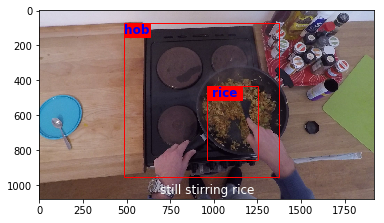

In [18]:
image_path = './tmp_dataset/P01/P01_01/0000090091.jpg'
y1, x1, h, w = 70, 486, 888, 882
bboxes = [[(70, 486, 888, 882)], [(432, 962, 290, 426)]]
plot_object_labels = ["hob", "rice"]
plot_action_labels = ["still stirring rice"]

def plot(image_path, bboxes,object_labels, action_labels, display=DISPLAY, save=True):
    im_array = misc.imread(image_path)
    fig = plt.figure(frameon=False)
    plt.imshow(im_array)
    for idx, bbox in enumerate(bboxes):
        if len(bbox) > 0:
            y1, x1, w, h = bbox[0][0], bbox[0][1], bbox[0][2], bbox[0][3]
            rect = Rectangle((x1, y1), w, h, fill=False, color='red')
            plt.axes().add_patch(rect)

            label_rect = Rectangle((x1,y1), int(50*len(object_labels[idx])), 
                                   80, fill=True, color='red')        
            plt.axes().add_patch(label_rect)
            rx, ry = label_rect.get_xy()
            cx = rx + label_rect.get_width()/2.0
            cy = ry + label_rect.get_height()/2.0
        
            plt.axes().annotate(object_labels[idx], (cx, cy), color='blue', weight='bold', 
                            fontsize=12, ha='center', va='center')
    action_label = ", ".join(action_labels)
    plt.axes().annotate(action_label, color= "white", 
                        fontsize=12,xy=(0.5, 0.05), 
                        xycoords='axes fraction', 
                        ha='center', va='center',
                        annotation_clip=False)
    dest = os.path.join(output_path, os.path.relpath(image_path,'./tmp_dataset'))
    base, _ = os.path.split(dest)
    os.makedirs(base, exist_ok=True)
    plt.savefig(dest)
    if not display:
        plt.close()
        plt.clf()
plot(image_path, bboxes, plot_object_labels, plot_action_labels, display=True, save=False)

In [13]:
from tqdm import tqdm

In [19]:
info = []
for subject_id in os.listdir('./tmp_dataset'):
    for video_id in os.listdir(os.path.join('./tmp_dataset', subject_id)):
        for frame in tqdm(os.listdir(os.path.join(os.path.join('./tmp_dataset', subject_id), video_id))):
            info.append((subject_id, video_id, int(frame[:-4]), frame))

# sort by frame
aux_list = sorted(info, key = lambda x: (x[1], x[2]))
aux_list[:10]



  0%|          | 0/3301 [00:00<?, ?it/s]

100%|██████████| 3301/3301 [00:00<00:00, 571887.55it/s]

[('P01', 'P01_01', 1, '0000000001.jpg'),
 ('P01', 'P01_01', 31, '0000000031.jpg'),
 ('P01', 'P01_01', 61, '0000000061.jpg'),
 ('P01', 'P01_01', 91, '0000000091.jpg'),
 ('P01', 'P01_01', 121, '0000000121.jpg'),
 ('P01', 'P01_01', 151, '0000000151.jpg'),
 ('P01', 'P01_01', 181, '0000000181.jpg'),
 ('P01', 'P01_01', 211, '0000000211.jpg'),
 ('P01', 'P01_01', 241, '0000000241.jpg'),
 ('P01', 'P01_01', 271, '0000000271.jpg')]

In [21]:
plt.ioff()
for element in tqdm(aux_list):
    subject_id = element[0]
    video_id = element[1]
    frame_num = element[2]
    frame = element[3] 
    this_object_labels = object_labels.loc[(object_labels['participant_id'] == subject_id)\
                                             &(object_labels['video_id'] == video_id) \
                                             &(object_labels['frame'] == frame_num)]
    this_action_labels = action_labels.loc[(action_labels['participant_id'] == subject_id) \
                                              & (action_labels['video_id'] == video_id) \
                                              & (action_labels['start_frame'] <= frame_num) \
                                              & (action_labels['stop_frame'] >= frame_num)]
    this_bboxes = []
    for i in this_object_labels['bounding_boxes']:
        this_bboxes.append(ast.literal_eval(i))
    displayed_bounding_boxes = this_bboxes
    displayed_object_labels = list(this_object_labels['noun'])
    displayed_action_labels = list(this_action_labels['narration'])
    frame_path = os.path.join(os.path.join(os.path.join('./tmp_dataset', subject_id), video_id), frame)
    plot(frame_path, displayed_bounding_boxes, displayed_object_labels, displayed_action_labels)





  0%|          | 0/3301 [00:00<?, ?it/s]/sailhome/ianhuang/anaconda3/envs/.vidobj/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  



  0%|          | 1/3301 [00:00<19:38,  2.80it/s]

closing





  0%|          | 2/3301 [00:00<19:40,  2.79it/s]

closing





  0%|          | 3/3301 [00:01<19:40,  2.79it/s]

closing





  0%|          | 4/3301 [00:01<19:39,  2.80it/s]

closing





  0%|          | 5/3301 [00:01<19:45,  2.78it/s]

closing





  0%|          | 6/3301 [00:02<19:45,  2.78it/s]

closing





  0%|          | 7/3301 [00:02<19:45,  2.78it/s]

closing





  0%|          | 8/3301 [00:02<19:43,  2.78it/s]

closing





  0%|          | 9/3301 [00:03<19:44,  2.78it/s]

closing





  0%|          | 10/3301 [00:03<19:44,  2.78it/s]

closing





  0%|          | 11/3301 [00:03<19:46,  2.77it/s]

closing





  0%|          | 12/3301 [00:04<20:45,  2.64it/s]

closing





  0%|          | 13/3301 [00:04<20:29,  2.67it/s]

closing





  0%|          | 14/3301 [00:05<20:16,  2.70it/s]

closing





  0%|          | 15/3301 [00:05<20:10,  2.71it/s]

closing





  0%|          | 16/3301 [00:05<20:06,  2.72it/s]

closing





  1%|          | 17/3301 [00:06<20:03,  2.73it/s]

closing





  1%|          | 18/3301 [00:06<20:00,  2.74it/s]

closing





  1%|          | 19/3301 [00:06<19:59,  2.74it/s]

closing





  1%|          | 20/3301 [00:07<19:53,  2.75it/s]

closing





  1%|          | 21/3301 [00:07<19:51,  2.75it/s]

closing





  1%|          | 22/3301 [00:08<19:53,  2.75it/s]

closing





  1%|          | 23/3301 [00:08<19:55,  2.74it/s]

closing





  1%|          | 24/3301 [00:08<21:03,  2.59it/s]

closing





  1%|          | 25/3301 [00:09<20:44,  2.63it/s]

closing





  1%|          | 26/3301 [00:09<20:30,  2.66it/s]

closing





  1%|          | 27/3301 [00:09<20:23,  2.68it/s]

closing





  1%|          | 28/3301 [00:10<20:16,  2.69it/s]

closing





  1%|          | 29/3301 [00:10<20:18,  2.69it/s]

closing





  1%|          | 30/3301 [00:11<20:16,  2.69it/s]

closing





  1%|          | 31/3301 [00:11<20:17,  2.68it/s]

closing





  1%|          | 32/3301 [00:11<20:15,  2.69it/s]

closing





  1%|          | 33/3301 [00:12<20:14,  2.69it/s]

closing





  1%|          | 34/3301 [00:12<20:17,  2.68it/s]

closing





  1%|          | 35/3301 [00:12<21:12,  2.57it/s]

closing





  1%|          | 36/3301 [00:13<20:57,  2.60it/s]

closing





  1%|          | 37/3301 [00:13<20:42,  2.63it/s]

closing





  1%|          | 38/3301 [00:14<20:27,  2.66it/s]

closing





  1%|          | 39/3301 [00:14<20:16,  2.68it/s]

closing





  1%|          | 40/3301 [00:14<20:13,  2.69it/s]

closing





  1%|          | 41/3301 [00:15<20:10,  2.69it/s]

closing





  1%|▏         | 42/3301 [00:15<20:11,  2.69it/s]

closing





  1%|▏         | 43/3301 [00:15<20:12,  2.69it/s]

closing





  1%|▏         | 44/3301 [00:16<20:06,  2.70it/s]

closing





  1%|▏         | 45/3301 [00:16<20:08,  2.70it/s]

closing





  1%|▏         | 46/3301 [00:17<21:00,  2.58it/s]

closing





  1%|▏         | 47/3301 [00:17<20:41,  2.62it/s]

closing





  1%|▏         | 48/3301 [00:17<20:26,  2.65it/s]

closing





  1%|▏         | 49/3301 [00:18<20:18,  2.67it/s]

closing





  2%|▏         | 50/3301 [00:18<20:21,  2.66it/s]

closing





  2%|▏         | 51/3301 [00:18<20:17,  2.67it/s]

closing





  2%|▏         | 52/3301 [00:19<20:24,  2.65it/s]

closing





  2%|▏         | 53/3301 [00:19<20:23,  2.65it/s]

closing





  2%|▏         | 54/3301 [00:20<20:23,  2.65it/s]

closing





  2%|▏         | 55/3301 [00:20<20:27,  2.64it/s]

closing





  2%|▏         | 56/3301 [00:20<20:30,  2.64it/s]

closing





  2%|▏         | 57/3301 [00:21<21:22,  2.53it/s]

closing





  2%|▏         | 58/3301 [00:21<21:02,  2.57it/s]

closing





  2%|▏         | 59/3301 [00:22<20:44,  2.60it/s]

closing





  2%|▏         | 60/3301 [00:22<20:29,  2.64it/s]

closing





  2%|▏         | 61/3301 [00:22<20:15,  2.66it/s]

closing





  2%|▏         | 62/3301 [00:23<20:08,  2.68it/s]

closing





  2%|▏         | 63/3301 [00:23<20:02,  2.69it/s]

closing





  2%|▏         | 64/3301 [00:23<19:57,  2.70it/s]

closing





  2%|▏         | 65/3301 [00:24<19:53,  2.71it/s]

closing





  2%|▏         | 66/3301 [00:24<19:51,  2.72it/s]

closing





  2%|▏         | 67/3301 [00:24<19:44,  2.73it/s]

closing





  2%|▏         | 68/3301 [00:25<20:32,  2.62it/s]

closing





  2%|▏         | 69/3301 [00:25<20:13,  2.66it/s]

closing





  2%|▏         | 70/3301 [00:26<19:59,  2.69it/s]

closing





  2%|▏         | 71/3301 [00:26<19:49,  2.72it/s]

closing





  2%|▏         | 72/3301 [00:26<20:50,  2.58it/s]

closing





  2%|▏         | 73/3301 [00:27<21:01,  2.56it/s]

closing





  2%|▏         | 74/3301 [00:27<21:22,  2.52it/s]

closing





  2%|▏         | 75/3301 [00:28<20:48,  2.58it/s]

closing





  2%|▏         | 76/3301 [00:28<21:03,  2.55it/s]

closing





  2%|▏         | 77/3301 [00:28<20:33,  2.61it/s]

closing





  2%|▏         | 78/3301 [00:29<20:12,  2.66it/s]

closing





  2%|▏         | 79/3301 [00:29<20:57,  2.56it/s]

closing





  2%|▏         | 80/3301 [00:30<22:02,  2.44it/s]

closing





  2%|▏         | 81/3301 [00:30<21:14,  2.53it/s]

closing





  2%|▏         | 82/3301 [00:30<22:14,  2.41it/s]

closing





  3%|▎         | 83/3301 [00:31<21:24,  2.51it/s]

closing





  3%|▎         | 84/3301 [00:31<21:21,  2.51it/s]

closing





  3%|▎         | 85/3301 [00:31<20:50,  2.57it/s]

closing





  3%|▎         | 86/3301 [00:32<20:56,  2.56it/s]

closing





  3%|▎         | 87/3301 [00:32<21:17,  2.52it/s]

closing





  3%|▎         | 88/3301 [00:33<20:48,  2.57it/s]

closing





  3%|▎         | 89/3301 [00:33<20:29,  2.61it/s]

closing





  3%|▎         | 90/3301 [00:33<21:23,  2.50it/s]

closing





  3%|▎         | 91/3301 [00:34<21:24,  2.50it/s]

closing





  3%|▎         | 92/3301 [00:34<21:48,  2.45it/s]

closing





  3%|▎         | 93/3301 [00:35<22:00,  2.43it/s]

closing





  3%|▎         | 94/3301 [00:35<21:18,  2.51it/s]

closing





  3%|▎         | 95/3301 [00:36<21:24,  2.50it/s]

closing





  3%|▎         | 96/3301 [00:36<21:29,  2.49it/s]

closing





  3%|▎         | 97/3301 [00:36<21:20,  2.50it/s]

closing





  3%|▎         | 98/3301 [00:37<20:53,  2.56it/s]

closing





  3%|▎         | 99/3301 [00:37<21:11,  2.52it/s]

closing





  3%|▎         | 100/3301 [00:37<21:20,  2.50it/s]

closing





  3%|▎         | 101/3301 [00:38<21:55,  2.43it/s]

closing





  3%|▎         | 102/3301 [00:38<21:57,  2.43it/s]

closing





  3%|▎         | 103/3301 [00:39<21:06,  2.52it/s]

closing





  3%|▎         | 104/3301 [00:39<21:27,  2.48it/s]

closing





  3%|▎         | 105/3301 [00:40<21:19,  2.50it/s]

closing





  3%|▎         | 106/3301 [00:40<20:52,  2.55it/s]

closing





  3%|▎         | 107/3301 [00:40<21:06,  2.52it/s]

closing





  3%|▎         | 108/3301 [00:41<21:40,  2.46it/s]

closing





  3%|▎         | 109/3301 [00:41<21:59,  2.42it/s]

closing





  3%|▎         | 110/3301 [00:42<21:23,  2.49it/s]

closing





  3%|▎         | 111/3301 [00:42<20:56,  2.54it/s]

closing





  3%|▎         | 112/3301 [00:42<20:33,  2.59it/s]

closing





  3%|▎         | 113/3301 [00:43<20:17,  2.62it/s]

closing





  3%|▎         | 114/3301 [00:43<21:03,  2.52it/s]

closing





  3%|▎         | 115/3301 [00:44<22:17,  2.38it/s]

closing





  4%|▎         | 116/3301 [00:44<22:05,  2.40it/s]

closing





  4%|▎         | 117/3301 [00:44<21:22,  2.48it/s]

closing





  4%|▎         | 118/3301 [00:45<21:17,  2.49it/s]

closing





  4%|▎         | 119/3301 [00:45<20:43,  2.56it/s]

closing





  4%|▎         | 120/3301 [00:46<21:20,  2.49it/s]

closing





  4%|▎         | 121/3301 [00:46<21:16,  2.49it/s]

closing





  4%|▎         | 122/3301 [00:46<20:48,  2.55it/s]

closing





  4%|▎         | 123/3301 [00:47<21:14,  2.49it/s]

closing





  4%|▍         | 124/3301 [00:47<21:14,  2.49it/s]

closing





  4%|▍         | 125/3301 [00:48<21:16,  2.49it/s]

closing





  4%|▍         | 126/3301 [00:48<22:20,  2.37it/s]

closing





  4%|▍         | 127/3301 [00:48<22:49,  2.32it/s]

closing





  4%|▍         | 128/3301 [00:49<23:02,  2.29it/s]

closing





  4%|▍         | 129/3301 [00:49<21:57,  2.41it/s]

closing





  4%|▍         | 130/3301 [00:50<21:57,  2.41it/s]

closing





  4%|▍         | 131/3301 [00:50<22:20,  2.36it/s]

closing





  4%|▍         | 132/3301 [00:51<22:36,  2.34it/s]

closing





  4%|▍         | 133/3301 [00:51<21:38,  2.44it/s]

closing





  4%|▍         | 134/3301 [00:51<21:33,  2.45it/s]

closing





  4%|▍         | 135/3301 [00:52<22:36,  2.33it/s]

closing





  4%|▍         | 136/3301 [00:52<22:24,  2.35it/s]

closing





  4%|▍         | 137/3301 [00:53<24:14,  2.18it/s]

closing





  4%|▍         | 138/3301 [00:53<22:46,  2.32it/s]

closing





  4%|▍         | 139/3301 [00:53<21:45,  2.42it/s]

closing





  4%|▍         | 140/3301 [00:54<21:59,  2.40it/s]

closing





  4%|▍         | 141/3301 [00:54<21:59,  2.40it/s]

closing





  4%|▍         | 142/3301 [00:55<21:42,  2.43it/s]

closing





  4%|▍         | 143/3301 [00:55<21:27,  2.45it/s]

closing





  4%|▍         | 144/3301 [00:56<21:26,  2.45it/s]

closing





  4%|▍         | 145/3301 [00:56<20:53,  2.52it/s]

closing





  4%|▍         | 146/3301 [00:56<21:13,  2.48it/s]

closing





  4%|▍         | 147/3301 [00:57<20:42,  2.54it/s]

closing





  4%|▍         | 148/3301 [00:57<21:44,  2.42it/s]

closing





  5%|▍         | 149/3301 [00:58<21:04,  2.49it/s]

closing





  5%|▍         | 150/3301 [00:58<20:35,  2.55it/s]

closing





  5%|▍         | 151/3301 [00:58<20:42,  2.53it/s]

closing





  5%|▍         | 152/3301 [00:59<20:15,  2.59it/s]

closing





  5%|▍         | 153/3301 [00:59<19:56,  2.63it/s]

closing





  5%|▍         | 154/3301 [00:59<19:44,  2.66it/s]

closing





  5%|▍         | 155/3301 [01:00<20:12,  2.60it/s]

closing





  5%|▍         | 156/3301 [01:00<19:55,  2.63it/s]

closing





  5%|▍         | 157/3301 [01:01<19:43,  2.66it/s]

closing





  5%|▍         | 158/3301 [01:01<20:06,  2.60it/s]

closing





  5%|▍         | 159/3301 [01:01<21:47,  2.40it/s]

closing





  5%|▍         | 160/3301 [01:02<21:01,  2.49it/s]

closing





  5%|▍         | 161/3301 [01:02<21:09,  2.47it/s]

closing





  5%|▍         | 162/3301 [01:03<20:38,  2.53it/s]

closing





  5%|▍         | 163/3301 [01:03<21:27,  2.44it/s]

closing





  5%|▍         | 164/3301 [01:03<20:52,  2.51it/s]

closing





  5%|▍         | 165/3301 [01:04<21:04,  2.48it/s]

closing





  5%|▌         | 166/3301 [01:04<21:57,  2.38it/s]

closing





  5%|▌         | 167/3301 [01:05<22:01,  2.37it/s]

closing





  5%|▌         | 168/3301 [01:05<21:49,  2.39it/s]

closing





  5%|▌         | 169/3301 [01:05<21:04,  2.48it/s]

closing





  5%|▌         | 170/3301 [01:06<21:37,  2.41it/s]

closing





  5%|▌         | 171/3301 [01:06<21:22,  2.44it/s]

closing





  5%|▌         | 172/3301 [01:07<20:38,  2.53it/s]

closing





  5%|▌         | 173/3301 [01:07<20:41,  2.52it/s]

closing





  5%|▌         | 174/3301 [01:07<20:05,  2.59it/s]

closing





  5%|▌         | 175/3301 [01:08<19:45,  2.64it/s]

closing





  5%|▌         | 176/3301 [01:08<19:32,  2.67it/s]

closing





  5%|▌         | 177/3301 [01:09<20:35,  2.53it/s]

closing





  5%|▌         | 178/3301 [01:09<20:39,  2.52it/s]

closing





  5%|▌         | 179/3301 [01:09<21:05,  2.47it/s]

closing





  5%|▌         | 180/3301 [01:10<20:58,  2.48it/s]

closing





  5%|▌         | 181/3301 [01:10<21:36,  2.41it/s]

closing





  6%|▌         | 182/3301 [01:11<22:14,  2.34it/s]

closing





  6%|▌         | 183/3301 [01:11<22:17,  2.33it/s]

closing





  6%|▌         | 184/3301 [01:12<22:03,  2.36it/s]

closing





  6%|▌         | 185/3301 [01:12<21:25,  2.42it/s]

closing





  6%|▌         | 186/3301 [01:12<21:02,  2.47it/s]

closing





  6%|▌         | 187/3301 [01:13<20:25,  2.54it/s]

closing





  6%|▌         | 188/3301 [01:13<20:28,  2.53it/s]

closing





  6%|▌         | 189/3301 [01:14<20:36,  2.52it/s]

closing





  6%|▌         | 190/3301 [01:14<20:40,  2.51it/s]

closing





  6%|▌         | 191/3301 [01:14<20:50,  2.49it/s]

closing





  6%|▌         | 192/3301 [01:15<20:37,  2.51it/s]

closing





  6%|▌         | 193/3301 [01:15<20:32,  2.52it/s]

closing





  6%|▌         | 194/3301 [01:16<20:56,  2.47it/s]

closing





  6%|▌         | 195/3301 [01:16<20:43,  2.50it/s]

closing





  6%|▌         | 196/3301 [01:16<20:42,  2.50it/s]

closing





  6%|▌         | 197/3301 [01:17<20:45,  2.49it/s]

closing





  6%|▌         | 198/3301 [01:17<20:12,  2.56it/s]

closing





  6%|▌         | 199/3301 [01:18<20:24,  2.53it/s]

closing





  6%|▌         | 200/3301 [01:18<20:02,  2.58it/s]

closing





  6%|▌         | 201/3301 [01:18<19:49,  2.61it/s]

closing





  6%|▌         | 202/3301 [01:19<20:12,  2.56it/s]

closing





  6%|▌         | 203/3301 [01:19<20:29,  2.52it/s]

closing





  6%|▌         | 204/3301 [01:19<20:23,  2.53it/s]

closing





  6%|▌         | 205/3301 [01:20<21:37,  2.39it/s]

closing





  6%|▌         | 206/3301 [01:20<21:47,  2.37it/s]

closing





  6%|▋         | 207/3301 [01:21<22:15,  2.32it/s]

closing





  6%|▋         | 208/3301 [01:21<21:19,  2.42it/s]

closing





  6%|▋         | 209/3301 [01:22<20:34,  2.50it/s]

closing





  6%|▋         | 210/3301 [01:22<20:05,  2.56it/s]

closing





  6%|▋         | 211/3301 [01:22<20:04,  2.57it/s]

closing





  6%|▋         | 212/3301 [01:23<20:33,  2.50it/s]

closing





  6%|▋         | 213/3301 [01:23<20:48,  2.47it/s]

closing





  6%|▋         | 214/3301 [01:24<20:15,  2.54it/s]

closing





  7%|▋         | 215/3301 [01:24<20:13,  2.54it/s]

closing





  7%|▋         | 216/3301 [01:24<20:41,  2.49it/s]

closing





  7%|▋         | 217/3301 [01:25<21:14,  2.42it/s]

closing





  7%|▋         | 218/3301 [01:25<20:54,  2.46it/s]

closing





  7%|▋         | 219/3301 [01:26<20:17,  2.53it/s]

closing





  7%|▋         | 220/3301 [01:26<20:47,  2.47it/s]

closing





  7%|▋         | 221/3301 [01:26<20:36,  2.49it/s]

closing





  7%|▋         | 222/3301 [01:27<20:27,  2.51it/s]

closing





  7%|▋         | 223/3301 [01:27<20:37,  2.49it/s]

closing





  7%|▋         | 224/3301 [01:28<20:06,  2.55it/s]

closing





  7%|▋         | 225/3301 [01:28<19:44,  2.60it/s]

closing





  7%|▋         | 226/3301 [01:28<20:28,  2.50it/s]

closing





  7%|▋         | 227/3301 [01:29<20:00,  2.56it/s]

closing





  7%|▋         | 228/3301 [01:29<20:31,  2.50it/s]

closing





  7%|▋         | 229/3301 [01:30<21:13,  2.41it/s]

closing





  7%|▋         | 230/3301 [01:30<20:31,  2.49it/s]

closing





  7%|▋         | 231/3301 [01:30<20:00,  2.56it/s]

closing





  7%|▋         | 232/3301 [01:31<20:16,  2.52it/s]

closing





  7%|▋         | 233/3301 [01:31<21:41,  2.36it/s]

closing





  7%|▋         | 234/3301 [01:32<22:59,  2.22it/s]

closing





  7%|▋         | 235/3301 [01:32<22:47,  2.24it/s]

closing





  7%|▋         | 236/3301 [01:33<22:07,  2.31it/s]

closing





  7%|▋         | 237/3301 [01:33<21:55,  2.33it/s]

closing





  7%|▋         | 238/3301 [01:33<20:58,  2.43it/s]

closing





  7%|▋         | 239/3301 [01:34<20:39,  2.47it/s]

closing





  7%|▋         | 240/3301 [01:34<21:29,  2.37it/s]

closing





  7%|▋         | 241/3301 [01:35<20:41,  2.47it/s]

closing





  7%|▋         | 242/3301 [01:35<20:07,  2.53it/s]

closing





  7%|▋         | 243/3301 [01:35<20:29,  2.49it/s]

closing





  7%|▋         | 244/3301 [01:36<20:56,  2.43it/s]

closing





  7%|▋         | 245/3301 [01:36<20:52,  2.44it/s]

closing





  7%|▋         | 246/3301 [01:37<20:17,  2.51it/s]

closing





  7%|▋         | 247/3301 [01:37<20:39,  2.46it/s]

closing





  8%|▊         | 248/3301 [01:37<20:04,  2.53it/s]

closing





  8%|▊         | 249/3301 [01:38<19:40,  2.59it/s]

closing





  8%|▊         | 250/3301 [01:38<20:06,  2.53it/s]

closing





  8%|▊         | 251/3301 [01:39<20:31,  2.48it/s]

closing





  8%|▊         | 252/3301 [01:39<21:06,  2.41it/s]

closing





  8%|▊         | 253/3301 [01:39<20:54,  2.43it/s]

closing





  8%|▊         | 254/3301 [01:40<21:17,  2.38it/s]

closing





  8%|▊         | 255/3301 [01:40<21:39,  2.34it/s]

closing





  8%|▊         | 256/3301 [01:41<20:48,  2.44it/s]

closing





  8%|▊         | 257/3301 [01:41<20:08,  2.52it/s]

closing





  8%|▊         | 258/3301 [01:41<20:15,  2.50it/s]

closing





  8%|▊         | 259/3301 [01:42<20:06,  2.52it/s]

closing





  8%|▊         | 260/3301 [01:42<19:40,  2.58it/s]

closing





  8%|▊         | 261/3301 [01:43<20:09,  2.51it/s]

closing





  8%|▊         | 262/3301 [01:43<21:25,  2.36it/s]

closing





  8%|▊         | 263/3301 [01:44<21:13,  2.39it/s]

closing





  8%|▊         | 264/3301 [01:44<20:59,  2.41it/s]

closing





  8%|▊         | 265/3301 [01:44<20:18,  2.49it/s]

closing





  8%|▊         | 266/3301 [01:45<20:28,  2.47it/s]

closing





  8%|▊         | 267/3301 [01:45<21:00,  2.41it/s]

closing





  8%|▊         | 268/3301 [01:46<21:17,  2.37it/s]

closing





  8%|▊         | 269/3301 [01:46<20:31,  2.46it/s]

closing





  8%|▊         | 270/3301 [01:46<19:58,  2.53it/s]

closing





  8%|▊         | 271/3301 [01:47<19:51,  2.54it/s]

closing





  8%|▊         | 272/3301 [01:47<19:52,  2.54it/s]

closing





  8%|▊         | 273/3301 [01:47<19:31,  2.58it/s]

closing





  8%|▊         | 274/3301 [01:48<20:07,  2.51it/s]

closing





  8%|▊         | 275/3301 [01:48<19:40,  2.56it/s]

closing





  8%|▊         | 276/3301 [01:49<19:21,  2.60it/s]

closing





  8%|▊         | 277/3301 [01:49<19:44,  2.55it/s]

closing





  8%|▊         | 278/3301 [01:50<20:52,  2.41it/s]

closing





  8%|▊         | 279/3301 [01:50<20:44,  2.43it/s]

closing





  8%|▊         | 280/3301 [01:50<20:04,  2.51it/s]

closing





  9%|▊         | 281/3301 [01:51<20:28,  2.46it/s]

closing





  9%|▊         | 282/3301 [01:51<20:21,  2.47it/s]

closing





  9%|▊         | 283/3301 [01:52<20:08,  2.50it/s]

closing





  9%|▊         | 284/3301 [01:52<21:34,  2.33it/s]

closing





  9%|▊         | 285/3301 [01:52<21:23,  2.35it/s]

closing





  9%|▊         | 286/3301 [01:53<22:22,  2.25it/s]

closing





  9%|▊         | 287/3301 [01:53<21:14,  2.37it/s]

closing





  9%|▊         | 288/3301 [01:54<20:51,  2.41it/s]

closing





  9%|▉         | 289/3301 [01:54<20:33,  2.44it/s]

closing





  9%|▉         | 290/3301 [01:54<19:55,  2.52it/s]

closing





  9%|▉         | 291/3301 [01:55<19:29,  2.57it/s]

closing





  9%|▉         | 292/3301 [01:55<19:45,  2.54it/s]

closing





  9%|▉         | 293/3301 [01:56<19:21,  2.59it/s]

closing





  9%|▉         | 294/3301 [01:56<19:04,  2.63it/s]

closing





  9%|▉         | 295/3301 [01:56<18:51,  2.66it/s]

closing





  9%|▉         | 296/3301 [01:57<19:20,  2.59it/s]

closing





  9%|▉         | 297/3301 [01:57<18:59,  2.64it/s]

closing





  9%|▉         | 298/3301 [01:58<20:01,  2.50it/s]

closing





  9%|▉         | 299/3301 [01:58<19:30,  2.56it/s]

closing





  9%|▉         | 300/3301 [01:58<20:07,  2.49it/s]

closing





  9%|▉         | 301/3301 [01:59<19:36,  2.55it/s]

closing





  9%|▉         | 302/3301 [01:59<19:49,  2.52it/s]

closing





  9%|▉         | 303/3301 [02:00<19:50,  2.52it/s]

closing





  9%|▉         | 304/3301 [02:00<23:55,  2.09it/s]

closing





  9%|▉         | 305/3301 [02:01<22:16,  2.24it/s]

closing





  9%|▉         | 306/3301 [02:01<21:31,  2.32it/s]

closing





  9%|▉         | 307/3301 [02:01<21:01,  2.37it/s]

closing





  9%|▉         | 308/3301 [02:02<20:15,  2.46it/s]

closing





  9%|▉         | 309/3301 [02:02<20:40,  2.41it/s]

closing





  9%|▉         | 310/3301 [02:03<21:27,  2.32it/s]

closing





  9%|▉         | 311/3301 [02:03<21:00,  2.37it/s]

closing





  9%|▉         | 312/3301 [02:03<20:13,  2.46it/s]

closing





  9%|▉         | 313/3301 [02:04<20:21,  2.45it/s]

closing





 10%|▉         | 314/3301 [02:04<20:21,  2.45it/s]

closing





 10%|▉         | 315/3301 [02:05<20:23,  2.44it/s]

closing





 10%|▉         | 316/3301 [02:05<20:23,  2.44it/s]

closing





 10%|▉         | 317/3301 [02:05<20:18,  2.45it/s]

closing





 10%|▉         | 318/3301 [02:06<19:43,  2.52it/s]

closing





 10%|▉         | 319/3301 [02:06<19:45,  2.52it/s]

closing





 10%|▉         | 320/3301 [02:07<19:55,  2.49it/s]

closing





 10%|▉         | 321/3301 [02:07<20:13,  2.46it/s]

closing





 10%|▉         | 322/3301 [02:07<20:38,  2.40it/s]

closing





 10%|▉         | 323/3301 [02:08<20:41,  2.40it/s]

closing





 10%|▉         | 324/3301 [02:08<19:58,  2.48it/s]

closing





 10%|▉         | 325/3301 [02:09<19:43,  2.51it/s]

closing





 10%|▉         | 326/3301 [02:09<20:23,  2.43it/s]

closing





 10%|▉         | 327/3301 [02:10<20:27,  2.42it/s]

closing





 10%|▉         | 328/3301 [02:10<20:36,  2.40it/s]

closing





 10%|▉         | 329/3301 [02:10<19:55,  2.49it/s]

closing





 10%|▉         | 330/3301 [02:11<19:24,  2.55it/s]

closing





 10%|█         | 331/3301 [02:11<20:28,  2.42it/s]

closing





 10%|█         | 332/3301 [02:11<19:48,  2.50it/s]

closing





 10%|█         | 333/3301 [02:12<20:00,  2.47it/s]

closing





 10%|█         | 334/3301 [02:12<20:19,  2.43it/s]

closing





 10%|█         | 335/3301 [02:13<20:17,  2.44it/s]

closing





 10%|█         | 336/3301 [02:13<19:39,  2.51it/s]

closing





 10%|█         | 337/3301 [02:14<19:33,  2.53it/s]

closing





 10%|█         | 338/3301 [02:14<19:10,  2.58it/s]

closing





 10%|█         | 339/3301 [02:14<19:27,  2.54it/s]

closing





 10%|█         | 340/3301 [02:15<19:33,  2.52it/s]

closing





 10%|█         | 341/3301 [02:15<19:10,  2.57it/s]

closing





 10%|█         | 342/3301 [02:15<19:27,  2.53it/s]

closing





 10%|█         | 343/3301 [02:16<19:05,  2.58it/s]

closing





 10%|█         | 344/3301 [02:16<18:51,  2.61it/s]

closing





 10%|█         | 345/3301 [02:17<19:15,  2.56it/s]

closing





 10%|█         | 346/3301 [02:17<20:26,  2.41it/s]

closing





 11%|█         | 347/3301 [02:17<19:45,  2.49it/s]

closing





 11%|█         | 348/3301 [02:18<19:58,  2.46it/s]

closing





 11%|█         | 349/3301 [02:18<19:42,  2.50it/s]

closing





 11%|█         | 350/3301 [02:19<19:16,  2.55it/s]

closing





 11%|█         | 351/3301 [02:19<18:57,  2.59it/s]

closing





 11%|█         | 352/3301 [02:19<18:44,  2.62it/s]

closing





 11%|█         | 353/3301 [02:20<19:46,  2.48it/s]

closing





 11%|█         | 354/3301 [02:20<19:16,  2.55it/s]

closing





 11%|█         | 355/3301 [02:21<19:32,  2.51it/s]

closing





 11%|█         | 356/3301 [02:21<19:06,  2.57it/s]

closing





 11%|█         | 357/3301 [02:21<19:15,  2.55it/s]

closing





 11%|█         | 358/3301 [02:22<20:02,  2.45it/s]

closing





 11%|█         | 359/3301 [02:22<19:27,  2.52it/s]

closing





 11%|█         | 360/3301 [02:23<19:03,  2.57it/s]

closing





 11%|█         | 361/3301 [02:23<19:02,  2.57it/s]

closing





 11%|█         | 362/3301 [02:23<18:44,  2.61it/s]

closing





 11%|█         | 363/3301 [02:24<18:34,  2.64it/s]

closing





 11%|█         | 364/3301 [02:24<18:26,  2.66it/s]

closing





 11%|█         | 365/3301 [02:24<18:19,  2.67it/s]

closing





 11%|█         | 366/3301 [02:25<18:15,  2.68it/s]

closing





 11%|█         | 367/3301 [02:25<19:17,  2.53it/s]

closing





 11%|█         | 368/3301 [02:26<19:22,  2.52it/s]

closing





 11%|█         | 369/3301 [02:26<18:58,  2.58it/s]

closing





 11%|█         | 370/3301 [02:26<20:05,  2.43it/s]

closing





 11%|█         | 371/3301 [02:27<20:06,  2.43it/s]

closing





 11%|█▏        | 372/3301 [02:27<20:05,  2.43it/s]

closing





 11%|█▏        | 373/3301 [02:28<19:45,  2.47it/s]

closing





 11%|█▏        | 374/3301 [02:28<19:50,  2.46it/s]

closing





 11%|█▏        | 375/3301 [02:29<19:43,  2.47it/s]

closing





 11%|█▏        | 376/3301 [02:29<19:38,  2.48it/s]

closing





 11%|█▏        | 377/3301 [02:29<19:51,  2.45it/s]

closing





 11%|█▏        | 378/3301 [02:30<19:50,  2.45it/s]

closing





 11%|█▏        | 379/3301 [02:30<19:32,  2.49it/s]

closing





 12%|█▏        | 380/3301 [02:31<19:33,  2.49it/s]

closing





 12%|█▏        | 381/3301 [02:31<19:04,  2.55it/s]

closing





 12%|█▏        | 382/3301 [02:31<20:50,  2.33it/s]

closing





 12%|█▏        | 383/3301 [02:32<19:56,  2.44it/s]

closing





 12%|█▏        | 384/3301 [02:32<19:50,  2.45it/s]

closing





 12%|█▏        | 385/3301 [02:33<19:56,  2.44it/s]

closing





 12%|█▏        | 386/3301 [02:33<20:16,  2.40it/s]

closing





 12%|█▏        | 387/3301 [02:34<22:03,  2.20it/s]

closing





 12%|█▏        | 388/3301 [02:34<20:49,  2.33it/s]

closing





 12%|█▏        | 389/3301 [02:34<19:55,  2.44it/s]

closing





 12%|█▏        | 390/3301 [02:35<19:17,  2.51it/s]

closing





 12%|█▏        | 391/3301 [02:35<19:11,  2.53it/s]

closing





 12%|█▏        | 392/3301 [02:35<19:02,  2.55it/s]

closing





 12%|█▏        | 393/3301 [02:36<19:43,  2.46it/s]

closing





 12%|█▏        | 394/3301 [02:36<20:26,  2.37it/s]

closing





 12%|█▏        | 395/3301 [02:37<19:54,  2.43it/s]

closing





 12%|█▏        | 396/3301 [02:37<19:12,  2.52it/s]

closing





 12%|█▏        | 397/3301 [02:37<18:43,  2.59it/s]

closing





 12%|█▏        | 398/3301 [02:38<19:06,  2.53it/s]

closing





 12%|█▏        | 399/3301 [02:38<18:39,  2.59it/s]

closing





 12%|█▏        | 400/3301 [02:39<18:42,  2.58it/s]

closing





 12%|█▏        | 401/3301 [02:39<18:21,  2.63it/s]

closing





 12%|█▏        | 402/3301 [02:39<19:00,  2.54it/s]

closing





 12%|█▏        | 403/3301 [02:40<19:07,  2.53it/s]

closing





 12%|█▏        | 404/3301 [02:40<19:41,  2.45it/s]

closing





 12%|█▏        | 405/3301 [02:41<19:41,  2.45it/s]

closing





 12%|█▏        | 406/3301 [02:41<20:32,  2.35it/s]

closing





 12%|█▏        | 407/3301 [02:42<20:03,  2.40it/s]

closing





 12%|█▏        | 408/3301 [02:42<19:43,  2.44it/s]

closing





 12%|█▏        | 409/3301 [02:42<19:36,  2.46it/s]

closing





 12%|█▏        | 410/3301 [02:43<19:15,  2.50it/s]

closing





 12%|█▏        | 411/3301 [02:43<19:01,  2.53it/s]

closing





 12%|█▏        | 412/3301 [02:43<19:07,  2.52it/s]

closing





 13%|█▎        | 413/3301 [02:44<18:38,  2.58it/s]

closing





 13%|█▎        | 414/3301 [02:44<18:51,  2.55it/s]

closing





 13%|█▎        | 415/3301 [02:45<19:52,  2.42it/s]

closing





 13%|█▎        | 416/3301 [02:45<19:08,  2.51it/s]

closing





 13%|█▎        | 417/3301 [02:45<18:52,  2.55it/s]

closing





 13%|█▎        | 418/3301 [02:46<20:15,  2.37it/s]

closing





 13%|█▎        | 419/3301 [02:46<19:25,  2.47it/s]

closing





 13%|█▎        | 420/3301 [02:47<18:49,  2.55it/s]

closing





 13%|█▎        | 421/3301 [02:47<18:25,  2.60it/s]

closing





 13%|█▎        | 422/3301 [02:47<18:55,  2.54it/s]

closing





 13%|█▎        | 423/3301 [02:48<19:11,  2.50it/s]

closing





 13%|█▎        | 424/3301 [02:48<18:39,  2.57it/s]

closing





 13%|█▎        | 425/3301 [02:49<18:35,  2.58it/s]

closing





 13%|█▎        | 426/3301 [02:49<19:12,  2.49it/s]

closing





 13%|█▎        | 427/3301 [02:49<19:47,  2.42it/s]

closing





 13%|█▎        | 428/3301 [02:50<19:03,  2.51it/s]

closing





 13%|█▎        | 429/3301 [02:50<19:12,  2.49it/s]

closing





 13%|█▎        | 430/3301 [02:51<21:06,  2.27it/s]

closing





 13%|█▎        | 431/3301 [02:51<20:00,  2.39it/s]

closing





 13%|█▎        | 432/3301 [02:52<19:13,  2.49it/s]

closing





 13%|█▎        | 433/3301 [02:52<19:07,  2.50it/s]

closing





 13%|█▎        | 434/3301 [02:52<19:22,  2.47it/s]

closing





 13%|█▎        | 435/3301 [02:53<18:46,  2.55it/s]

closing





 13%|█▎        | 436/3301 [02:53<18:20,  2.60it/s]

closing





 13%|█▎        | 437/3301 [02:54<19:02,  2.51it/s]

closing





 13%|█▎        | 438/3301 [02:54<19:32,  2.44it/s]

closing





 13%|█▎        | 439/3301 [02:54<20:13,  2.36it/s]

closing





 13%|█▎        | 440/3301 [02:55<19:47,  2.41it/s]

closing





 13%|█▎        | 441/3301 [02:55<19:02,  2.50it/s]

closing





 13%|█▎        | 442/3301 [02:56<20:03,  2.38it/s]

closing





 13%|█▎        | 443/3301 [02:56<19:13,  2.48it/s]

closing





 13%|█▎        | 444/3301 [02:56<19:29,  2.44it/s]

closing





 13%|█▎        | 445/3301 [02:57<19:28,  2.45it/s]

closing





 14%|█▎        | 446/3301 [02:57<18:48,  2.53it/s]

closing





 14%|█▎        | 447/3301 [02:58<18:42,  2.54it/s]

closing





 14%|█▎        | 448/3301 [02:58<18:16,  2.60it/s]

closing





 14%|█▎        | 449/3301 [02:58<18:09,  2.62it/s]

closing





 14%|█▎        | 450/3301 [02:59<18:20,  2.59it/s]

closing





 14%|█▎        | 451/3301 [02:59<18:00,  2.64it/s]

closing





 14%|█▎        | 452/3301 [02:59<18:25,  2.58it/s]

closing





 14%|█▎        | 453/3301 [03:00<18:55,  2.51it/s]

closing





 14%|█▍        | 454/3301 [03:00<19:46,  2.40it/s]

closing





 14%|█▍        | 455/3301 [03:01<19:01,  2.49it/s]

closing





 14%|█▍        | 456/3301 [03:01<18:29,  2.56it/s]

closing





 14%|█▍        | 457/3301 [03:02<18:53,  2.51it/s]

closing





 14%|█▍        | 458/3301 [03:02<19:32,  2.43it/s]

closing





 14%|█▍        | 459/3301 [03:02<19:17,  2.46it/s]

closing





 14%|█▍        | 460/3301 [03:03<19:05,  2.48it/s]

closing





 14%|█▍        | 461/3301 [03:03<18:29,  2.56it/s]

closing





 14%|█▍        | 462/3301 [03:04<19:28,  2.43it/s]

closing





 14%|█▍        | 463/3301 [03:04<19:31,  2.42it/s]

closing





 14%|█▍        | 464/3301 [03:04<19:09,  2.47it/s]

closing





 14%|█▍        | 465/3301 [03:05<18:36,  2.54it/s]

closing





 14%|█▍        | 466/3301 [03:05<19:42,  2.40it/s]

closing





 14%|█▍        | 467/3301 [03:06<19:43,  2.40it/s]

closing





 14%|█▍        | 468/3301 [03:06<19:16,  2.45it/s]

closing





 14%|█▍        | 469/3301 [03:06<19:37,  2.40it/s]

closing





 14%|█▍        | 470/3301 [03:07<19:21,  2.44it/s]

closing





 14%|█▍        | 471/3301 [03:07<19:14,  2.45it/s]

closing





 14%|█▍        | 472/3301 [03:08<18:36,  2.53it/s]

closing





 14%|█▍        | 473/3301 [03:08<18:09,  2.60it/s]

closing





 14%|█▍        | 474/3301 [03:08<18:25,  2.56it/s]

closing





 14%|█▍        | 475/3301 [03:09<18:46,  2.51it/s]

closing





 14%|█▍        | 476/3301 [03:09<18:50,  2.50it/s]

closing





 14%|█▍        | 477/3301 [03:10<19:02,  2.47it/s]

closing





 14%|█▍        | 478/3301 [03:10<20:04,  2.34it/s]

closing





 15%|█▍        | 479/3301 [03:10<19:13,  2.45it/s]

closing





 15%|█▍        | 480/3301 [03:11<19:09,  2.45it/s]

closing





 15%|█▍        | 481/3301 [03:11<19:03,  2.47it/s]

closing





 15%|█▍        | 482/3301 [03:12<18:33,  2.53it/s]

closing





 15%|█▍        | 483/3301 [03:12<18:12,  2.58it/s]

closing





 15%|█▍        | 484/3301 [03:12<18:31,  2.53it/s]

closing





 15%|█▍        | 485/3301 [03:13<18:53,  2.48it/s]

closing





 15%|█▍        | 486/3301 [03:13<18:57,  2.48it/s]

closing





 15%|█▍        | 487/3301 [03:14<19:27,  2.41it/s]

closing





 15%|█▍        | 488/3301 [03:14<19:13,  2.44it/s]

closing





 15%|█▍        | 489/3301 [03:14<18:39,  2.51it/s]

closing





 15%|█▍        | 490/3301 [03:15<19:54,  2.35it/s]

closing





 15%|█▍        | 491/3301 [03:15<20:01,  2.34it/s]

closing





 15%|█▍        | 492/3301 [03:16<19:54,  2.35it/s]

closing





 15%|█▍        | 493/3301 [03:16<19:37,  2.38it/s]

closing





 15%|█▍        | 494/3301 [03:17<19:46,  2.37it/s]

closing





 15%|█▍        | 495/3301 [03:17<19:34,  2.39it/s]

closing





 15%|█▌        | 496/3301 [03:17<19:44,  2.37it/s]

closing





 15%|█▌        | 497/3301 [03:18<19:00,  2.46it/s]

closing





 15%|█▌        | 498/3301 [03:18<18:54,  2.47it/s]

closing





 15%|█▌        | 499/3301 [03:19<18:22,  2.54it/s]

closing





 15%|█▌        | 500/3301 [03:19<18:42,  2.49it/s]

closing





 15%|█▌        | 501/3301 [03:19<18:14,  2.56it/s]

closing





 15%|█▌        | 502/3301 [03:20<19:21,  2.41it/s]

closing





 15%|█▌        | 503/3301 [03:20<18:42,  2.49it/s]

closing





 15%|█▌        | 504/3301 [03:21<18:46,  2.48it/s]

closing





 15%|█▌        | 505/3301 [03:21<18:44,  2.49it/s]

closing





 15%|█▌        | 506/3301 [03:21<19:11,  2.43it/s]

closing





 15%|█▌        | 507/3301 [03:22<18:35,  2.50it/s]

closing





 15%|█▌        | 508/3301 [03:22<18:11,  2.56it/s]

closing





 15%|█▌        | 509/3301 [03:23<18:42,  2.49it/s]

closing





 15%|█▌        | 510/3301 [03:23<19:06,  2.43it/s]

closing





 15%|█▌        | 511/3301 [03:23<19:00,  2.45it/s]

closing





 16%|█▌        | 512/3301 [03:24<18:26,  2.52it/s]

closing





 16%|█▌        | 513/3301 [03:24<19:14,  2.41it/s]

closing





 16%|█▌        | 514/3301 [03:25<19:53,  2.34it/s]

closing





 16%|█▌        | 515/3301 [03:25<20:16,  2.29it/s]

closing





 16%|█▌        | 516/3301 [03:26<19:47,  2.34it/s]

closing





 16%|█▌        | 517/3301 [03:26<18:57,  2.45it/s]

closing





 16%|█▌        | 518/3301 [03:26<18:25,  2.52it/s]

closing





 16%|█▌        | 519/3301 [03:27<18:55,  2.45it/s]

closing





 16%|█▌        | 520/3301 [03:27<18:42,  2.48it/s]

closing





 16%|█▌        | 521/3301 [03:28<18:07,  2.56it/s]

closing





 16%|█▌        | 522/3301 [03:28<18:00,  2.57it/s]

closing





 16%|█▌        | 523/3301 [03:28<18:04,  2.56it/s]

closing





 16%|█▌        | 524/3301 [03:29<17:40,  2.62it/s]

closing





 16%|█▌        | 525/3301 [03:29<17:26,  2.65it/s]

closing





 16%|█▌        | 526/3301 [03:30<18:34,  2.49it/s]

closing





 16%|█▌        | 527/3301 [03:30<18:41,  2.47it/s]

closing





 16%|█▌        | 528/3301 [03:30<18:13,  2.54it/s]

closing





 16%|█▌        | 529/3301 [03:31<18:29,  2.50it/s]

closing





 16%|█▌        | 530/3301 [03:31<19:26,  2.38it/s]

closing





 16%|█▌        | 531/3301 [03:32<21:10,  2.18it/s]

closing





 16%|█▌        | 532/3301 [03:32<21:56,  2.10it/s]

closing





 16%|█▌        | 533/3301 [03:33<21:24,  2.16it/s]

closing





 16%|█▌        | 534/3301 [03:33<20:40,  2.23it/s]

closing





 16%|█▌        | 535/3301 [03:34<20:23,  2.26it/s]

closing





 16%|█▌        | 536/3301 [03:34<20:05,  2.29it/s]

closing





 16%|█▋        | 537/3301 [03:34<20:56,  2.20it/s]

closing





 16%|█▋        | 538/3301 [03:35<19:43,  2.33it/s]

closing





 16%|█▋        | 539/3301 [03:35<19:19,  2.38it/s]

closing





 16%|█▋        | 540/3301 [03:36<19:03,  2.41it/s]

closing





 16%|█▋        | 541/3301 [03:36<18:48,  2.45it/s]

closing





 16%|█▋        | 542/3301 [03:36<18:48,  2.44it/s]

closing





 16%|█▋        | 543/3301 [03:37<18:13,  2.52it/s]

closing





 16%|█▋        | 544/3301 [03:37<17:49,  2.58it/s]

closing





 17%|█▋        | 545/3301 [03:38<17:55,  2.56it/s]

closing





 17%|█▋        | 546/3301 [03:38<17:40,  2.60it/s]

closing





 17%|█▋        | 547/3301 [03:38<17:29,  2.62it/s]

closing





 17%|█▋        | 548/3301 [03:39<17:50,  2.57it/s]

closing





 17%|█▋        | 549/3301 [03:39<18:20,  2.50it/s]

closing





 17%|█▋        | 550/3301 [03:40<18:21,  2.50it/s]

closing





 17%|█▋        | 551/3301 [03:40<18:13,  2.52it/s]

closing





 17%|█▋        | 552/3301 [03:40<18:26,  2.49it/s]

closing





 17%|█▋        | 553/3301 [03:41<18:44,  2.44it/s]

closing





 17%|█▋        | 554/3301 [03:41<18:28,  2.48it/s]

closing





 17%|█▋        | 555/3301 [03:42<17:59,  2.54it/s]

closing





 17%|█▋        | 556/3301 [03:42<17:53,  2.56it/s]

closing





 17%|█▋        | 557/3301 [03:42<18:32,  2.47it/s]

closing





 17%|█▋        | 558/3301 [03:43<18:43,  2.44it/s]

closing





 17%|█▋        | 559/3301 [03:43<18:26,  2.48it/s]

closing





 17%|█▋        | 560/3301 [03:44<18:23,  2.48it/s]

closing





 17%|█▋        | 561/3301 [03:44<18:40,  2.44it/s]

closing





 17%|█▋        | 562/3301 [03:44<18:10,  2.51it/s]

closing





 17%|█▋        | 563/3301 [03:45<17:47,  2.57it/s]

closing





 17%|█▋        | 564/3301 [03:45<17:56,  2.54it/s]

closing





 17%|█▋        | 565/3301 [03:45<17:38,  2.58it/s]

closing





 17%|█▋        | 566/3301 [03:46<18:16,  2.49it/s]

closing





 17%|█▋        | 567/3301 [03:46<17:52,  2.55it/s]

closing





 17%|█▋        | 568/3301 [03:47<18:35,  2.45it/s]

closing





 17%|█▋        | 569/3301 [03:47<18:23,  2.48it/s]

closing





 17%|█▋        | 570/3301 [03:48<18:27,  2.47it/s]

closing





 17%|█▋        | 571/3301 [03:48<18:31,  2.46it/s]

closing





 17%|█▋        | 572/3301 [03:48<19:31,  2.33it/s]

closing





 17%|█▋        | 573/3301 [03:49<19:41,  2.31it/s]

closing





 17%|█▋        | 574/3301 [03:49<19:15,  2.36it/s]

closing





 17%|█▋        | 575/3301 [03:50<18:57,  2.40it/s]

closing





 17%|█▋        | 576/3301 [03:50<18:20,  2.48it/s]

closing





 17%|█▋        | 577/3301 [03:50<17:54,  2.54it/s]

closing





 18%|█▊        | 578/3301 [03:51<17:56,  2.53it/s]

closing





 18%|█▊        | 579/3301 [03:51<18:16,  2.48it/s]

closing





 18%|█▊        | 580/3301 [03:52<18:02,  2.51it/s]

closing





 18%|█▊        | 581/3301 [03:52<18:47,  2.41it/s]

closing





 18%|█▊        | 582/3301 [03:52<18:20,  2.47it/s]

closing





 18%|█▊        | 583/3301 [03:53<19:34,  2.31it/s]

closing





 18%|█▊        | 584/3301 [03:53<19:18,  2.34it/s]

closing





 18%|█▊        | 585/3301 [03:54<19:06,  2.37it/s]

closing





 18%|█▊        | 586/3301 [03:54<18:46,  2.41it/s]

closing





 18%|█▊        | 587/3301 [03:55<19:11,  2.36it/s]

closing





 18%|█▊        | 588/3301 [03:55<19:07,  2.36it/s]

closing





 18%|█▊        | 589/3301 [03:55<18:28,  2.45it/s]

closing





 18%|█▊        | 590/3301 [03:56<18:29,  2.44it/s]

closing





 18%|█▊        | 591/3301 [03:56<18:44,  2.41it/s]

closing





 18%|█▊        | 592/3301 [03:57<18:34,  2.43it/s]

closing





 18%|█▊        | 593/3301 [03:57<18:50,  2.40it/s]

closing





 18%|█▊        | 594/3301 [03:58<19:14,  2.34it/s]

closing





 18%|█▊        | 595/3301 [03:58<18:53,  2.39it/s]

closing





 18%|█▊        | 596/3301 [03:58<18:12,  2.48it/s]

closing





 18%|█▊        | 597/3301 [03:59<18:05,  2.49it/s]

closing





 18%|█▊        | 598/3301 [03:59<18:04,  2.49it/s]

closing





 18%|█▊        | 599/3301 [03:59<17:37,  2.55it/s]

closing





 18%|█▊        | 600/3301 [04:00<17:32,  2.57it/s]

closing





 18%|█▊        | 601/3301 [04:00<17:14,  2.61it/s]

closing





 18%|█▊        | 602/3301 [04:01<17:01,  2.64it/s]

closing





 18%|█▊        | 603/3301 [04:01<16:54,  2.66it/s]

closing





 18%|█▊        | 604/3301 [04:01<17:43,  2.54it/s]

closing





 18%|█▊        | 605/3301 [04:02<18:42,  2.40it/s]

closing





 18%|█▊        | 606/3301 [04:02<18:41,  2.40it/s]

closing





 18%|█▊        | 607/3301 [04:03<18:39,  2.41it/s]

closing





 18%|█▊        | 608/3301 [04:03<18:04,  2.48it/s]

closing





 18%|█▊        | 609/3301 [04:03<17:40,  2.54it/s]

closing





 18%|█▊        | 610/3301 [04:04<17:24,  2.58it/s]

closing





 19%|█▊        | 611/3301 [04:04<18:06,  2.48it/s]

closing





 19%|█▊        | 612/3301 [04:05<17:38,  2.54it/s]

closing





 19%|█▊        | 613/3301 [04:05<17:18,  2.59it/s]

closing





 19%|█▊        | 614/3301 [04:05<17:45,  2.52it/s]

closing





 19%|█▊        | 615/3301 [04:06<17:23,  2.57it/s]

closing





 19%|█▊        | 616/3301 [04:06<17:51,  2.51it/s]

closing





 19%|█▊        | 617/3301 [04:07<17:27,  2.56it/s]

closing





 19%|█▊        | 618/3301 [04:07<17:10,  2.60it/s]

closing





 19%|█▉        | 619/3301 [04:07<17:49,  2.51it/s]

closing





 19%|█▉        | 620/3301 [04:08<17:44,  2.52it/s]

closing





 19%|█▉        | 621/3301 [04:08<17:54,  2.49it/s]

closing





 19%|█▉        | 622/3301 [04:09<18:16,  2.44it/s]

closing





 19%|█▉        | 623/3301 [04:09<18:07,  2.46it/s]

closing





 19%|█▉        | 624/3301 [04:09<18:33,  2.41it/s]

closing





 19%|█▉        | 625/3301 [04:10<18:23,  2.42it/s]

closing





 19%|█▉        | 626/3301 [04:10<17:52,  2.49it/s]

closing





 19%|█▉        | 627/3301 [04:11<18:45,  2.38it/s]

closing





 19%|█▉        | 628/3301 [04:11<18:22,  2.43it/s]

closing





 19%|█▉        | 629/3301 [04:11<17:50,  2.50it/s]

closing





 19%|█▉        | 630/3301 [04:12<18:26,  2.41it/s]

closing





 19%|█▉        | 631/3301 [04:12<17:54,  2.49it/s]

closing





 19%|█▉        | 632/3301 [04:13<18:26,  2.41it/s]

closing





 19%|█▉        | 633/3301 [04:13<18:17,  2.43it/s]

closing





 19%|█▉        | 634/3301 [04:14<18:35,  2.39it/s]

closing





 19%|█▉        | 635/3301 [04:14<18:55,  2.35it/s]

closing





 19%|█▉        | 636/3301 [04:14<18:28,  2.40it/s]

closing





 19%|█▉        | 637/3301 [04:15<18:16,  2.43it/s]

closing





 19%|█▉        | 638/3301 [04:15<18:52,  2.35it/s]

closing





 19%|█▉        | 639/3301 [04:16<18:05,  2.45it/s]

closing





 19%|█▉        | 640/3301 [04:16<17:34,  2.52it/s]

closing





 19%|█▉        | 641/3301 [04:16<17:34,  2.52it/s]

closing





 19%|█▉        | 642/3301 [04:17<17:45,  2.49it/s]

closing





 19%|█▉        | 643/3301 [04:17<17:48,  2.49it/s]

closing





 20%|█▉        | 644/3301 [04:18<17:20,  2.55it/s]

closing





 20%|█▉        | 645/3301 [04:18<17:01,  2.60it/s]

closing





 20%|█▉        | 646/3301 [04:18<17:51,  2.48it/s]

closing





 20%|█▉        | 647/3301 [04:19<17:23,  2.54it/s]

closing





 20%|█▉        | 648/3301 [04:19<17:37,  2.51it/s]

closing





 20%|█▉        | 649/3301 [04:20<18:06,  2.44it/s]

closing





 20%|█▉        | 650/3301 [04:20<18:18,  2.41it/s]

closing





 20%|█▉        | 651/3301 [04:20<18:04,  2.44it/s]

closing





 20%|█▉        | 652/3301 [04:21<18:16,  2.42it/s]

closing





 20%|█▉        | 653/3301 [04:21<17:58,  2.45it/s]

closing





 20%|█▉        | 654/3301 [04:22<18:04,  2.44it/s]

closing





 20%|█▉        | 655/3301 [04:22<18:15,  2.41it/s]

closing





 20%|█▉        | 656/3301 [04:22<18:01,  2.45it/s]

closing





 20%|█▉        | 657/3301 [04:23<18:07,  2.43it/s]

closing





 20%|█▉        | 658/3301 [04:23<17:51,  2.47it/s]

closing





 20%|█▉        | 659/3301 [04:24<17:58,  2.45it/s]

closing





 20%|█▉        | 660/3301 [04:24<17:27,  2.52it/s]

closing





 20%|██        | 661/3301 [04:24<17:29,  2.52it/s]

closing





 20%|██        | 662/3301 [04:25<18:46,  2.34it/s]

closing





 20%|██        | 663/3301 [04:25<18:41,  2.35it/s]

closing





 20%|██        | 664/3301 [04:26<18:29,  2.38it/s]

closing





 20%|██        | 665/3301 [04:26<18:10,  2.42it/s]

closing





 20%|██        | 666/3301 [04:27<17:34,  2.50it/s]

closing





 20%|██        | 667/3301 [04:27<17:10,  2.56it/s]

closing





 20%|██        | 668/3301 [04:27<17:29,  2.51it/s]

closing





 20%|██        | 669/3301 [04:28<17:06,  2.56it/s]

closing





 20%|██        | 670/3301 [04:28<17:35,  2.49it/s]

closing





 20%|██        | 671/3301 [04:29<17:22,  2.52it/s]

closing





 20%|██        | 672/3301 [04:29<17:01,  2.57it/s]

closing





 20%|██        | 673/3301 [04:29<17:42,  2.47it/s]

closing





 20%|██        | 674/3301 [04:30<18:29,  2.37it/s]

closing





 20%|██        | 675/3301 [04:30<17:47,  2.46it/s]

closing





 20%|██        | 676/3301 [04:31<17:47,  2.46it/s]

closing





 21%|██        | 677/3301 [04:31<17:16,  2.53it/s]

closing





 21%|██        | 678/3301 [04:31<17:49,  2.45it/s]

closing





 21%|██        | 679/3301 [04:32<18:15,  2.39it/s]

closing





 21%|██        | 680/3301 [04:32<17:38,  2.48it/s]

closing





 21%|██        | 681/3301 [04:33<17:42,  2.47it/s]

closing





 21%|██        | 682/3301 [04:33<17:15,  2.53it/s]

closing





 21%|██        | 683/3301 [04:33<16:56,  2.57it/s]

closing





 21%|██        | 684/3301 [04:34<17:27,  2.50it/s]

closing





 21%|██        | 685/3301 [04:34<18:00,  2.42it/s]

closing





 21%|██        | 686/3301 [04:35<18:31,  2.35it/s]

closing





 21%|██        | 687/3301 [04:35<18:24,  2.37it/s]

closing





 21%|██        | 688/3301 [04:35<17:51,  2.44it/s]

closing





 21%|██        | 689/3301 [04:36<18:15,  2.38it/s]

closing





 21%|██        | 690/3301 [04:36<17:45,  2.45it/s]

closing





 21%|██        | 691/3301 [04:37<17:57,  2.42it/s]

closing





 21%|██        | 692/3301 [04:37<17:52,  2.43it/s]

closing





 21%|██        | 693/3301 [04:38<17:28,  2.49it/s]

closing





 21%|██        | 694/3301 [04:38<17:47,  2.44it/s]

closing





 21%|██        | 695/3301 [04:38<18:15,  2.38it/s]

closing





 21%|██        | 696/3301 [04:39<19:25,  2.24it/s]

closing





 21%|██        | 697/3301 [04:39<19:13,  2.26it/s]

closing





 21%|██        | 698/3301 [04:40<18:20,  2.36it/s]

closing





 21%|██        | 699/3301 [04:40<17:37,  2.46it/s]

closing





 21%|██        | 700/3301 [04:40<17:30,  2.48it/s]

closing





 21%|██        | 701/3301 [04:41<17:39,  2.45it/s]

closing





 21%|██▏       | 702/3301 [04:41<17:22,  2.49it/s]

closing





 21%|██▏       | 703/3301 [04:42<16:55,  2.56it/s]

closing





 21%|██▏       | 704/3301 [04:42<16:57,  2.55it/s]

closing





 21%|██▏       | 705/3301 [04:42<17:25,  2.48it/s]

closing





 21%|██▏       | 706/3301 [04:43<17:50,  2.42it/s]

closing





 21%|██▏       | 707/3301 [04:43<19:43,  2.19it/s]

closing





 21%|██▏       | 708/3301 [04:44<19:29,  2.22it/s]

closing





 21%|██▏       | 709/3301 [04:44<18:22,  2.35it/s]

closing





 22%|██▏       | 710/3301 [04:45<17:39,  2.44it/s]

closing





 22%|██▏       | 711/3301 [04:45<17:07,  2.52it/s]

closing





 22%|██▏       | 712/3301 [04:45<16:45,  2.58it/s]

closing





 22%|██▏       | 713/3301 [04:46<16:28,  2.62it/s]

closing





 22%|██▏       | 714/3301 [04:46<16:16,  2.65it/s]

closing





 22%|██▏       | 715/3301 [04:46<16:08,  2.67it/s]

closing





 22%|██▏       | 716/3301 [04:47<16:02,  2.68it/s]

closing





 22%|██▏       | 717/3301 [04:47<16:20,  2.64it/s]

closing





 22%|██▏       | 718/3301 [04:48<16:47,  2.56it/s]

closing





 22%|██▏       | 719/3301 [04:48<17:49,  2.41it/s]

closing





 22%|██▏       | 720/3301 [04:48<17:14,  2.50it/s]

closing





 22%|██▏       | 721/3301 [04:49<16:48,  2.56it/s]

closing





 22%|██▏       | 722/3301 [04:49<16:33,  2.60it/s]

closing





 22%|██▏       | 723/3301 [04:50<16:46,  2.56it/s]

closing





 22%|██▏       | 724/3301 [04:50<16:47,  2.56it/s]

closing





 22%|██▏       | 725/3301 [04:50<16:32,  2.59it/s]

closing





 22%|██▏       | 726/3301 [04:51<16:18,  2.63it/s]

closing





 22%|██▏       | 727/3301 [04:51<16:28,  2.60it/s]

closing





 22%|██▏       | 728/3301 [04:52<16:36,  2.58it/s]

closing





 22%|██▏       | 729/3301 [04:52<16:58,  2.52it/s]

closing





 22%|██▏       | 730/3301 [04:52<16:30,  2.60it/s]

closing





 22%|██▏       | 731/3301 [04:53<16:49,  2.55it/s]

closing





 22%|██▏       | 732/3301 [04:53<16:23,  2.61it/s]

closing





 22%|██▏       | 733/3301 [04:53<16:05,  2.66it/s]

closing





 22%|██▏       | 734/3301 [04:54<16:27,  2.60it/s]

closing





 22%|██▏       | 735/3301 [04:54<16:41,  2.56it/s]

closing





 22%|██▏       | 736/3301 [04:55<16:44,  2.55it/s]

closing





 22%|██▏       | 737/3301 [04:55<18:16,  2.34it/s]

closing





 22%|██▏       | 738/3301 [04:56<19:32,  2.19it/s]

closing





 22%|██▏       | 739/3301 [04:56<20:08,  2.12it/s]

closing





 22%|██▏       | 740/3301 [04:57<20:46,  2.05it/s]

closing





 22%|██▏       | 741/3301 [04:57<20:08,  2.12it/s]

closing





 22%|██▏       | 742/3301 [04:58<18:44,  2.28it/s]

closing





 23%|██▎       | 743/3301 [04:58<17:45,  2.40it/s]

closing





 23%|██▎       | 744/3301 [04:58<17:06,  2.49it/s]

closing





 23%|██▎       | 745/3301 [04:59<16:59,  2.51it/s]

closing





 23%|██▎       | 746/3301 [04:59<17:36,  2.42it/s]

closing





 23%|██▎       | 747/3301 [04:59<16:58,  2.51it/s]

closing





 23%|██▎       | 748/3301 [05:00<16:30,  2.58it/s]

closing





 23%|██▎       | 749/3301 [05:00<16:41,  2.55it/s]

closing





 23%|██▎       | 750/3301 [05:01<16:46,  2.54it/s]

closing





 23%|██▎       | 751/3301 [05:01<16:25,  2.59it/s]

closing





 23%|██▎       | 752/3301 [05:01<16:09,  2.63it/s]

closing





 23%|██▎       | 753/3301 [05:02<17:20,  2.45it/s]

closing





 23%|██▎       | 754/3301 [05:02<17:14,  2.46it/s]

closing





 23%|██▎       | 755/3301 [05:03<16:43,  2.54it/s]

closing





 23%|██▎       | 756/3301 [05:03<16:50,  2.52it/s]

closing





 23%|██▎       | 757/3301 [05:03<16:28,  2.57it/s]

closing





 23%|██▎       | 758/3301 [05:04<16:15,  2.61it/s]

closing





 23%|██▎       | 759/3301 [05:04<16:06,  2.63it/s]

closing





 23%|██▎       | 760/3301 [05:05<16:50,  2.51it/s]

closing





 23%|██▎       | 761/3301 [05:05<16:31,  2.56it/s]

closing





 23%|██▎       | 762/3301 [05:05<17:12,  2.46it/s]

closing





 23%|██▎       | 763/3301 [05:06<17:18,  2.44it/s]

closing





 23%|██▎       | 764/3301 [05:06<18:19,  2.31it/s]

closing





 23%|██▎       | 765/3301 [05:07<17:55,  2.36it/s]

closing





 23%|██▎       | 766/3301 [05:07<18:09,  2.33it/s]

closing





 23%|██▎       | 767/3301 [05:08<17:51,  2.37it/s]

closing





 23%|██▎       | 768/3301 [05:08<17:38,  2.39it/s]

closing





 23%|██▎       | 769/3301 [05:08<17:24,  2.42it/s]

closing





 23%|██▎       | 770/3301 [05:09<17:32,  2.41it/s]

closing





 23%|██▎       | 771/3301 [05:09<16:59,  2.48it/s]

closing





 23%|██▎       | 772/3301 [05:10<16:36,  2.54it/s]

closing





 23%|██▎       | 773/3301 [05:10<16:59,  2.48it/s]

closing





 23%|██▎       | 774/3301 [05:10<16:36,  2.54it/s]

closing





 23%|██▎       | 775/3301 [05:11<17:18,  2.43it/s]

closing





 24%|██▎       | 776/3301 [05:11<17:01,  2.47it/s]

closing





 24%|██▎       | 777/3301 [05:12<16:35,  2.54it/s]

closing





 24%|██▎       | 778/3301 [05:12<16:20,  2.57it/s]

closing





 24%|██▎       | 779/3301 [05:12<16:09,  2.60it/s]

closing





 24%|██▎       | 780/3301 [05:13<17:00,  2.47it/s]

closing





 24%|██▎       | 781/3301 [05:13<16:37,  2.53it/s]

closing





 24%|██▎       | 782/3301 [05:13<16:36,  2.53it/s]

closing





 24%|██▎       | 783/3301 [05:14<16:49,  2.49it/s]

closing





 24%|██▍       | 784/3301 [05:14<16:51,  2.49it/s]

closing





 24%|██▍       | 785/3301 [05:15<16:32,  2.53it/s]

closing





 24%|██▍       | 786/3301 [05:15<18:19,  2.29it/s]

closing





 24%|██▍       | 787/3301 [05:16<18:13,  2.30it/s]

closing





 24%|██▍       | 788/3301 [05:16<17:36,  2.38it/s]

closing





 24%|██▍       | 789/3301 [05:16<17:41,  2.37it/s]

closing





 24%|██▍       | 790/3301 [05:17<17:15,  2.42it/s]

closing





 24%|██▍       | 791/3301 [05:17<17:13,  2.43it/s]

closing





 24%|██▍       | 792/3301 [05:18<17:22,  2.41it/s]

closing





 24%|██▍       | 793/3301 [05:18<16:46,  2.49it/s]

closing





 24%|██▍       | 794/3301 [05:18<16:21,  2.55it/s]

closing





 24%|██▍       | 795/3301 [05:19<16:30,  2.53it/s]

closing





 24%|██▍       | 796/3301 [05:19<16:32,  2.52it/s]

closing





 24%|██▍       | 797/3301 [05:20<16:53,  2.47it/s]

closing





 24%|██▍       | 798/3301 [05:20<16:27,  2.54it/s]

closing





 24%|██▍       | 799/3301 [05:20<16:35,  2.51it/s]

closing





 24%|██▍       | 800/3301 [05:21<16:43,  2.49it/s]

closing





 24%|██▍       | 801/3301 [05:21<16:50,  2.47it/s]

closing





 24%|██▍       | 802/3301 [05:22<17:03,  2.44it/s]

closing





 24%|██▍       | 803/3301 [05:22<16:56,  2.46it/s]

closing





 24%|██▍       | 804/3301 [05:22<16:51,  2.47it/s]

closing





 24%|██▍       | 805/3301 [05:23<17:18,  2.40it/s]

closing





 24%|██▍       | 806/3301 [05:23<17:09,  2.42it/s]

closing





 24%|██▍       | 807/3301 [05:24<16:36,  2.50it/s]

closing





 24%|██▍       | 808/3301 [05:24<16:11,  2.57it/s]

closing





 25%|██▍       | 809/3301 [05:25<16:54,  2.46it/s]

closing





 25%|██▍       | 810/3301 [05:25<16:47,  2.47it/s]

closing





 25%|██▍       | 811/3301 [05:25<16:34,  2.50it/s]

closing





 25%|██▍       | 812/3301 [05:26<16:38,  2.49it/s]

closing





 25%|██▍       | 813/3301 [05:26<16:14,  2.55it/s]

closing





 25%|██▍       | 814/3301 [05:26<15:57,  2.60it/s]

closing





 25%|██▍       | 815/3301 [05:27<15:45,  2.63it/s]

closing





 25%|██▍       | 816/3301 [05:27<16:20,  2.53it/s]

closing





 25%|██▍       | 817/3301 [05:28<16:16,  2.54it/s]

closing





 25%|██▍       | 818/3301 [05:28<15:58,  2.59it/s]

closing





 25%|██▍       | 819/3301 [05:28<16:05,  2.57it/s]

closing





 25%|██▍       | 820/3301 [05:29<15:48,  2.62it/s]

closing





 25%|██▍       | 821/3301 [05:29<16:53,  2.45it/s]

closing





 25%|██▍       | 822/3301 [05:30<16:22,  2.52it/s]

closing





 25%|██▍       | 823/3301 [05:30<16:23,  2.52it/s]

closing





 25%|██▍       | 824/3301 [05:30<17:04,  2.42it/s]

closing





 25%|██▍       | 825/3301 [05:31<18:48,  2.19it/s]

closing





 25%|██▌       | 826/3301 [05:32<19:25,  2.12it/s]

closing





 25%|██▌       | 827/3301 [05:32<21:29,  1.92it/s]

closing





 25%|██▌       | 828/3301 [05:33<20:23,  2.02it/s]

closing





 25%|██▌       | 829/3301 [05:33<18:47,  2.19it/s]

closing





 25%|██▌       | 830/3301 [05:33<17:42,  2.33it/s]

closing





 25%|██▌       | 831/3301 [05:34<16:56,  2.43it/s]

closing





 25%|██▌       | 832/3301 [05:34<17:09,  2.40it/s]

closing





 25%|██▌       | 833/3301 [05:35<20:50,  1.97it/s]

closing





 25%|██▌       | 834/3301 [05:35<21:26,  1.92it/s]

closing





 25%|██▌       | 835/3301 [05:36<19:57,  2.06it/s]

closing





 25%|██▌       | 836/3301 [05:36<18:53,  2.17it/s]

closing





 25%|██▌       | 837/3301 [05:37<17:46,  2.31it/s]

closing





 25%|██▌       | 838/3301 [05:37<17:57,  2.29it/s]

closing





 25%|██▌       | 839/3301 [05:37<17:05,  2.40it/s]

closing





 25%|██▌       | 840/3301 [05:38<16:54,  2.43it/s]

closing





 25%|██▌       | 841/3301 [05:38<17:10,  2.39it/s]

closing





 26%|██▌       | 842/3301 [05:39<17:02,  2.41it/s]

closing





 26%|██▌       | 843/3301 [05:39<16:27,  2.49it/s]

closing





 26%|██▌       | 844/3301 [05:39<16:36,  2.47it/s]

closing





 26%|██▌       | 845/3301 [05:40<17:24,  2.35it/s]

closing





 26%|██▌       | 846/3301 [05:40<16:45,  2.44it/s]

closing





 26%|██▌       | 847/3301 [05:41<16:48,  2.43it/s]

closing





 26%|██▌       | 848/3301 [05:41<16:43,  2.44it/s]

closing





 26%|██▌       | 849/3301 [05:41<16:20,  2.50it/s]

closing





 26%|██▌       | 850/3301 [05:42<16:44,  2.44it/s]

closing





 26%|██▌       | 851/3301 [05:42<16:52,  2.42it/s]

closing





 26%|██▌       | 852/3301 [05:43<16:16,  2.51it/s]

closing





 26%|██▌       | 853/3301 [05:43<15:48,  2.58it/s]

closing





 26%|██▌       | 854/3301 [05:43<15:30,  2.63it/s]

closing





 26%|██▌       | 855/3301 [05:44<15:19,  2.66it/s]

closing





 26%|██▌       | 856/3301 [05:44<16:35,  2.46it/s]

closing





 26%|██▌       | 857/3301 [05:45<16:31,  2.46it/s]

closing





 26%|██▌       | 858/3301 [05:45<16:38,  2.45it/s]

closing





 26%|██▌       | 859/3301 [05:45<16:52,  2.41it/s]

closing





 26%|██▌       | 860/3301 [05:46<16:44,  2.43it/s]

closing





 26%|██▌       | 861/3301 [05:46<16:40,  2.44it/s]

closing





 26%|██▌       | 862/3301 [05:47<16:11,  2.51it/s]

closing





 26%|██▌       | 863/3301 [05:47<16:48,  2.42it/s]

closing





 26%|██▌       | 864/3301 [05:47<16:18,  2.49it/s]

closing





 26%|██▌       | 865/3301 [05:48<16:18,  2.49it/s]

closing





 26%|██▌       | 866/3301 [05:48<16:21,  2.48it/s]

closing





 26%|██▋       | 867/3301 [05:49<17:18,  2.34it/s]

closing





 26%|██▋       | 868/3301 [05:49<17:11,  2.36it/s]

closing





 26%|██▋       | 869/3301 [05:50<16:33,  2.45it/s]

closing





 26%|██▋       | 870/3301 [05:50<16:33,  2.45it/s]

closing





 26%|██▋       | 871/3301 [05:50<16:47,  2.41it/s]

closing





 26%|██▋       | 872/3301 [05:51<16:13,  2.50it/s]

closing





 26%|██▋       | 873/3301 [05:51<16:17,  2.48it/s]

closing





 26%|██▋       | 874/3301 [05:52<15:51,  2.55it/s]

closing





 27%|██▋       | 875/3301 [05:52<15:56,  2.54it/s]

closing





 27%|██▋       | 876/3301 [05:52<16:13,  2.49it/s]

closing





 27%|██▋       | 877/3301 [05:53<16:10,  2.50it/s]

closing





 27%|██▋       | 878/3301 [05:53<16:54,  2.39it/s]

closing





 27%|██▋       | 879/3301 [05:54<17:07,  2.36it/s]

closing





 27%|██▋       | 880/3301 [05:54<17:06,  2.36it/s]

closing





 27%|██▋       | 881/3301 [05:54<17:00,  2.37it/s]

closing





 27%|██▋       | 882/3301 [05:55<16:54,  2.39it/s]

closing





 27%|██▋       | 883/3301 [05:55<16:17,  2.47it/s]

closing





 27%|██▋       | 884/3301 [05:56<16:58,  2.37it/s]

closing





 27%|██▋       | 885/3301 [05:56<16:20,  2.46it/s]

closing





 27%|██▋       | 886/3301 [05:57<16:47,  2.40it/s]

closing





 27%|██▋       | 887/3301 [05:57<16:12,  2.48it/s]

closing





 27%|██▋       | 888/3301 [05:57<15:44,  2.55it/s]

closing





 27%|██▋       | 889/3301 [05:58<16:05,  2.50it/s]

closing





 27%|██▋       | 890/3301 [05:58<15:39,  2.57it/s]

closing





 27%|██▋       | 891/3301 [05:58<15:21,  2.61it/s]

closing





 27%|██▋       | 892/3301 [05:59<15:34,  2.58it/s]

closing





 27%|██▋       | 893/3301 [05:59<15:53,  2.53it/s]

closing





 27%|██▋       | 894/3301 [06:00<15:32,  2.58it/s]

closing





 27%|██▋       | 895/3301 [06:00<15:16,  2.63it/s]

closing





 27%|██▋       | 896/3301 [06:00<15:19,  2.62it/s]

closing





 27%|██▋       | 897/3301 [06:01<16:35,  2.41it/s]

closing





 27%|██▋       | 898/3301 [06:01<16:42,  2.40it/s]

closing





 27%|██▋       | 899/3301 [06:02<16:08,  2.48it/s]

closing





 27%|██▋       | 900/3301 [06:02<16:36,  2.41it/s]

closing





 27%|██▋       | 901/3301 [06:02<16:04,  2.49it/s]

closing





 27%|██▋       | 902/3301 [06:03<15:57,  2.51it/s]

closing





 27%|██▋       | 903/3301 [06:03<15:38,  2.56it/s]

closing





 27%|██▋       | 904/3301 [06:04<15:25,  2.59it/s]

closing





 27%|██▋       | 905/3301 [06:04<15:43,  2.54it/s]

closing





 27%|██▋       | 906/3301 [06:04<16:00,  2.49it/s]

closing





 27%|██▋       | 907/3301 [06:05<16:18,  2.45it/s]

closing





 28%|██▊       | 908/3301 [06:05<16:34,  2.41it/s]

closing





 28%|██▊       | 909/3301 [06:06<16:00,  2.49it/s]

closing





 28%|██▊       | 910/3301 [06:06<15:36,  2.55it/s]

closing





 28%|██▊       | 911/3301 [06:06<16:25,  2.43it/s]

closing





 28%|██▊       | 912/3301 [06:07<16:51,  2.36it/s]

closing





 28%|██▊       | 913/3301 [06:07<16:26,  2.42it/s]

closing





 28%|██▊       | 914/3301 [06:08<16:18,  2.44it/s]

closing





 28%|██▊       | 915/3301 [06:08<16:30,  2.41it/s]

closing





 28%|██▊       | 916/3301 [06:09<16:09,  2.46it/s]

closing





 28%|██▊       | 917/3301 [06:09<16:06,  2.47it/s]

closing





 28%|██▊       | 918/3301 [06:09<16:01,  2.48it/s]

closing





 28%|██▊       | 919/3301 [06:10<15:55,  2.49it/s]

closing





 28%|██▊       | 920/3301 [06:10<15:43,  2.52it/s]

closing





 28%|██▊       | 921/3301 [06:11<15:50,  2.50it/s]

closing





 28%|██▊       | 922/3301 [06:11<16:06,  2.46it/s]

closing





 28%|██▊       | 923/3301 [06:11<17:14,  2.30it/s]

closing





 28%|██▊       | 924/3301 [06:12<17:23,  2.28it/s]

closing





 28%|██▊       | 925/3301 [06:12<17:24,  2.27it/s]

closing





 28%|██▊       | 926/3301 [06:13<17:31,  2.26it/s]

closing





 28%|██▊       | 927/3301 [06:13<17:35,  2.25it/s]

closing





 28%|██▊       | 928/3301 [06:14<17:05,  2.31it/s]

closing





 28%|██▊       | 929/3301 [06:14<16:58,  2.33it/s]

closing





 28%|██▊       | 930/3301 [06:14<16:31,  2.39it/s]

closing





 28%|██▊       | 931/3301 [06:15<16:15,  2.43it/s]

closing





 28%|██▊       | 932/3301 [06:15<15:42,  2.51it/s]

closing





 28%|██▊       | 933/3301 [06:16<15:32,  2.54it/s]

closing





 28%|██▊       | 934/3301 [06:16<15:29,  2.55it/s]

closing





 28%|██▊       | 935/3301 [06:16<16:22,  2.41it/s]

closing





 28%|██▊       | 936/3301 [06:17<16:02,  2.46it/s]

closing





 28%|██▊       | 937/3301 [06:17<15:33,  2.53it/s]

closing





 28%|██▊       | 938/3301 [06:18<16:01,  2.46it/s]

closing





 28%|██▊       | 939/3301 [06:18<15:51,  2.48it/s]

closing





 28%|██▊       | 940/3301 [06:18<15:46,  2.49it/s]

closing





 29%|██▊       | 941/3301 [06:19<15:46,  2.49it/s]

closing





 29%|██▊       | 942/3301 [06:19<15:20,  2.56it/s]

closing





 29%|██▊       | 943/3301 [06:20<15:13,  2.58it/s]

closing





 29%|██▊       | 944/3301 [06:20<15:28,  2.54it/s]

closing





 29%|██▊       | 945/3301 [06:20<15:08,  2.59it/s]

closing





 29%|██▊       | 946/3301 [06:21<14:55,  2.63it/s]

closing





 29%|██▊       | 947/3301 [06:21<15:43,  2.50it/s]

closing





 29%|██▊       | 948/3301 [06:22<15:20,  2.55it/s]

closing





 29%|██▊       | 949/3301 [06:22<15:05,  2.60it/s]

closing





 29%|██▉       | 950/3301 [06:22<15:49,  2.48it/s]

closing





 29%|██▉       | 951/3301 [06:23<15:56,  2.46it/s]

closing





 29%|██▉       | 952/3301 [06:23<15:31,  2.52it/s]

closing





 29%|██▉       | 953/3301 [06:24<15:13,  2.57it/s]

closing





 29%|██▉       | 954/3301 [06:24<15:27,  2.53it/s]

closing





 29%|██▉       | 955/3301 [06:24<15:31,  2.52it/s]

closing





 29%|██▉       | 956/3301 [06:25<16:01,  2.44it/s]

closing





 29%|██▉       | 957/3301 [06:25<15:35,  2.50it/s]

closing





 29%|██▉       | 958/3301 [06:26<17:09,  2.28it/s]

closing





 29%|██▉       | 959/3301 [06:26<16:44,  2.33it/s]

closing





 29%|██▉       | 960/3301 [06:27<16:33,  2.36it/s]

closing





 29%|██▉       | 961/3301 [06:27<15:53,  2.45it/s]

closing





 29%|██▉       | 962/3301 [06:27<15:26,  2.52it/s]

closing





 29%|██▉       | 963/3301 [06:28<15:42,  2.48it/s]

closing





 29%|██▉       | 964/3301 [06:28<15:19,  2.54it/s]

closing





 29%|██▉       | 965/3301 [06:28<15:00,  2.59it/s]

closing





 29%|██▉       | 966/3301 [06:29<14:43,  2.64it/s]

closing





 29%|██▉       | 967/3301 [06:29<14:35,  2.66it/s]

closing





 29%|██▉       | 968/3301 [06:30<15:07,  2.57it/s]

closing





 29%|██▉       | 969/3301 [06:30<15:35,  2.49it/s]

closing





 29%|██▉       | 970/3301 [06:30<15:42,  2.47it/s]

closing





 29%|██▉       | 971/3301 [06:31<15:15,  2.54it/s]

closing





 29%|██▉       | 972/3301 [06:31<15:26,  2.51it/s]

closing





 29%|██▉       | 973/3301 [06:32<15:20,  2.53it/s]

closing





 30%|██▉       | 974/3301 [06:32<14:58,  2.59it/s]

closing





 30%|██▉       | 975/3301 [06:32<15:07,  2.56it/s]

closing





 30%|██▉       | 976/3301 [06:33<15:04,  2.57it/s]

closing





 30%|██▉       | 977/3301 [06:33<15:12,  2.55it/s]

closing





 30%|██▉       | 978/3301 [06:33<14:54,  2.60it/s]

closing





 30%|██▉       | 979/3301 [06:34<14:41,  2.63it/s]

closing





 30%|██▉       | 980/3301 [06:34<15:17,  2.53it/s]

closing





 30%|██▉       | 981/3301 [06:35<15:52,  2.44it/s]

closing





 30%|██▉       | 982/3301 [06:35<15:58,  2.42it/s]

closing





 30%|██▉       | 983/3301 [06:36<15:48,  2.44it/s]

closing





 30%|██▉       | 984/3301 [06:36<15:53,  2.43it/s]

closing





 30%|██▉       | 985/3301 [06:36<15:22,  2.51it/s]

closing





 30%|██▉       | 986/3301 [06:37<15:51,  2.43it/s]

closing





 30%|██▉       | 987/3301 [06:37<15:22,  2.51it/s]

closing





 30%|██▉       | 988/3301 [06:38<15:02,  2.56it/s]

closing





 30%|██▉       | 989/3301 [06:38<15:37,  2.47it/s]

closing





 30%|██▉       | 990/3301 [06:38<15:33,  2.48it/s]

closing





 30%|███       | 991/3301 [06:39<15:29,  2.49it/s]

closing





 30%|███       | 992/3301 [06:39<15:46,  2.44it/s]

closing





 30%|███       | 993/3301 [06:40<16:01,  2.40it/s]

closing





 30%|███       | 994/3301 [06:40<15:27,  2.49it/s]

closing





 30%|███       | 995/3301 [06:40<15:41,  2.45it/s]

closing





 30%|███       | 996/3301 [06:41<15:14,  2.52it/s]

closing





 30%|███       | 997/3301 [06:41<14:52,  2.58it/s]

closing





 30%|███       | 998/3301 [06:42<14:36,  2.63it/s]

closing





 30%|███       | 999/3301 [06:42<14:59,  2.56it/s]

closing





 30%|███       | 1000/3301 [06:42<15:21,  2.50it/s]

closing





 30%|███       | 1001/3301 [06:43<15:31,  2.47it/s]

closing





 30%|███       | 1002/3301 [06:43<15:22,  2.49it/s]

closing





 30%|███       | 1003/3301 [06:44<14:53,  2.57it/s]

closing





 30%|███       | 1004/3301 [06:44<15:50,  2.42it/s]

closing





 30%|███       | 1005/3301 [06:44<15:36,  2.45it/s]

closing





 30%|███       | 1006/3301 [06:45<15:26,  2.48it/s]

closing





 31%|███       | 1007/3301 [06:45<15:24,  2.48it/s]

closing





 31%|███       | 1008/3301 [06:46<15:23,  2.48it/s]

closing





 31%|███       | 1009/3301 [06:46<16:28,  2.32it/s]

closing





 31%|███       | 1010/3301 [06:46<16:07,  2.37it/s]

closing





 31%|███       | 1011/3301 [06:47<15:41,  2.43it/s]

closing





 31%|███       | 1012/3301 [06:47<15:10,  2.51it/s]

closing





 31%|███       | 1013/3301 [06:48<14:49,  2.57it/s]

closing





 31%|███       | 1014/3301 [06:48<15:04,  2.53it/s]

closing





 31%|███       | 1015/3301 [06:48<14:55,  2.55it/s]

closing





 31%|███       | 1016/3301 [06:49<15:26,  2.47it/s]

closing





 31%|███       | 1017/3301 [06:49<14:58,  2.54it/s]

closing





 31%|███       | 1018/3301 [06:50<14:51,  2.56it/s]

closing





 31%|███       | 1019/3301 [06:50<14:53,  2.55it/s]

closing





 31%|███       | 1020/3301 [06:50<15:14,  2.49it/s]

closing





 31%|███       | 1021/3301 [06:51<14:52,  2.56it/s]

closing





 31%|███       | 1022/3301 [06:51<15:08,  2.51it/s]

closing





 31%|███       | 1023/3301 [06:52<15:11,  2.50it/s]

closing





 31%|███       | 1024/3301 [06:52<14:45,  2.57it/s]

closing





 31%|███       | 1025/3301 [06:52<14:26,  2.63it/s]

closing





 31%|███       | 1026/3301 [06:53<14:37,  2.59it/s]

closing





 31%|███       | 1027/3301 [06:53<14:42,  2.58it/s]

closing





 31%|███       | 1028/3301 [06:54<15:45,  2.40it/s]

closing





 31%|███       | 1029/3301 [06:54<15:10,  2.49it/s]

closing





 31%|███       | 1030/3301 [06:54<14:44,  2.57it/s]

closing





 31%|███       | 1031/3301 [06:55<14:33,  2.60it/s]

closing





 31%|███▏      | 1032/3301 [06:55<15:03,  2.51it/s]

closing





 31%|███▏      | 1033/3301 [06:55<14:54,  2.54it/s]

closing





 31%|███▏      | 1034/3301 [06:56<14:30,  2.60it/s]

closing





 31%|███▏      | 1035/3301 [06:56<14:18,  2.64it/s]

closing





 31%|███▏      | 1036/3301 [06:57<14:13,  2.65it/s]

closing





 31%|███▏      | 1037/3301 [06:57<15:44,  2.40it/s]

closing





 31%|███▏      | 1038/3301 [06:58<15:42,  2.40it/s]

closing





 31%|███▏      | 1039/3301 [06:58<15:39,  2.41it/s]

closing





 32%|███▏      | 1040/3301 [06:58<15:40,  2.40it/s]

closing





 32%|███▏      | 1041/3301 [06:59<15:09,  2.49it/s]

closing





 32%|███▏      | 1042/3301 [06:59<14:50,  2.54it/s]

closing





 32%|███▏      | 1043/3301 [07:00<15:22,  2.45it/s]

closing





 32%|███▏      | 1044/3301 [07:00<15:48,  2.38it/s]

closing





 32%|███▏      | 1045/3301 [07:00<15:13,  2.47it/s]

closing





 32%|███▏      | 1046/3301 [07:01<15:33,  2.42it/s]

closing





 32%|███▏      | 1047/3301 [07:01<15:28,  2.43it/s]

closing





 32%|███▏      | 1048/3301 [07:02<15:46,  2.38it/s]

closing





 32%|███▏      | 1049/3301 [07:02<15:40,  2.40it/s]

closing





 32%|███▏      | 1050/3301 [07:02<15:36,  2.40it/s]

closing





 32%|███▏      | 1051/3301 [07:03<15:41,  2.39it/s]

closing





 32%|███▏      | 1052/3301 [07:03<15:42,  2.39it/s]

closing





 32%|███▏      | 1053/3301 [07:04<15:07,  2.48it/s]

closing





 32%|███▏      | 1054/3301 [07:04<15:10,  2.47it/s]

closing





 32%|███▏      | 1055/3301 [07:04<14:45,  2.54it/s]

closing





 32%|███▏      | 1056/3301 [07:05<14:27,  2.59it/s]

closing





 32%|███▏      | 1057/3301 [07:05<14:15,  2.62it/s]

closing





 32%|███▏      | 1058/3301 [07:06<14:06,  2.65it/s]

closing





 32%|███▏      | 1059/3301 [07:06<13:58,  2.67it/s]

closing





 32%|███▏      | 1060/3301 [07:06<14:30,  2.58it/s]

closing





 32%|███▏      | 1061/3301 [07:07<14:51,  2.51it/s]

closing





 32%|███▏      | 1062/3301 [07:07<14:58,  2.49it/s]

closing





 32%|███▏      | 1063/3301 [07:08<15:13,  2.45it/s]

closing





 32%|███▏      | 1064/3301 [07:08<14:45,  2.53it/s]

closing





 32%|███▏      | 1065/3301 [07:08<14:25,  2.58it/s]

closing





 32%|███▏      | 1066/3301 [07:09<14:12,  2.62it/s]

closing





 32%|███▏      | 1067/3301 [07:09<14:38,  2.54it/s]

closing





 32%|███▏      | 1068/3301 [07:09<14:20,  2.59it/s]

closing





 32%|███▏      | 1069/3301 [07:10<14:08,  2.63it/s]

closing





 32%|███▏      | 1070/3301 [07:10<14:28,  2.57it/s]

closing





 32%|███▏      | 1071/3301 [07:11<15:02,  2.47it/s]

closing





 32%|███▏      | 1072/3301 [07:11<15:01,  2.47it/s]

closing





 33%|███▎      | 1073/3301 [07:11<14:36,  2.54it/s]

closing





 33%|███▎      | 1074/3301 [07:12<14:43,  2.52it/s]

closing





 33%|███▎      | 1075/3301 [07:12<15:00,  2.47it/s]

closing





 33%|███▎      | 1076/3301 [07:13<14:35,  2.54it/s]

closing





 33%|███▎      | 1077/3301 [07:13<14:36,  2.54it/s]

closing





 33%|███▎      | 1078/3301 [07:13<15:00,  2.47it/s]

closing





 33%|███▎      | 1079/3301 [07:14<14:37,  2.53it/s]

closing





 33%|███▎      | 1080/3301 [07:14<14:45,  2.51it/s]

closing





 33%|███▎      | 1081/3301 [07:15<14:26,  2.56it/s]

closing





 33%|███▎      | 1082/3301 [07:15<14:12,  2.60it/s]

closing





 33%|███▎      | 1083/3301 [07:15<14:23,  2.57it/s]

closing





 33%|███▎      | 1084/3301 [07:16<14:10,  2.61it/s]

closing





 33%|███▎      | 1085/3301 [07:16<14:35,  2.53it/s]

closing





 33%|███▎      | 1086/3301 [07:17<15:11,  2.43it/s]

closing





 33%|███▎      | 1087/3301 [07:17<14:40,  2.51it/s]

closing





 33%|███▎      | 1088/3301 [07:17<14:15,  2.59it/s]

closing





 33%|███▎      | 1089/3301 [07:18<13:58,  2.64it/s]

closing





 33%|███▎      | 1090/3301 [07:18<14:25,  2.55it/s]

closing





 33%|███▎      | 1091/3301 [07:19<14:55,  2.47it/s]

closing





 33%|███▎      | 1092/3301 [07:19<14:26,  2.55it/s]

closing





 33%|███▎      | 1093/3301 [07:19<14:08,  2.60it/s]

closing





 33%|███▎      | 1094/3301 [07:20<14:11,  2.59it/s]

closing





 33%|███▎      | 1095/3301 [07:20<14:32,  2.53it/s]

closing





 33%|███▎      | 1096/3301 [07:21<14:16,  2.57it/s]

closing





 33%|███▎      | 1097/3301 [07:21<14:49,  2.48it/s]

closing





 33%|███▎      | 1098/3301 [07:21<15:18,  2.40it/s]

closing





 33%|███▎      | 1099/3301 [07:22<14:43,  2.49it/s]

closing





 33%|███▎      | 1100/3301 [07:22<14:54,  2.46it/s]

closing





 33%|███▎      | 1101/3301 [07:23<14:54,  2.46it/s]

closing





 33%|███▎      | 1102/3301 [07:23<14:23,  2.55it/s]

closing





 33%|███▎      | 1103/3301 [07:23<14:02,  2.61it/s]

closing





 33%|███▎      | 1104/3301 [07:24<13:46,  2.66it/s]

closing





 33%|███▎      | 1105/3301 [07:24<13:39,  2.68it/s]

closing





 34%|███▎      | 1106/3301 [07:24<13:58,  2.62it/s]

closing





 34%|███▎      | 1107/3301 [07:25<14:38,  2.50it/s]

closing





 34%|███▎      | 1108/3301 [07:25<14:54,  2.45it/s]

closing





 34%|███▎      | 1109/3301 [07:26<15:19,  2.38it/s]

closing





 34%|███▎      | 1110/3301 [07:26<15:32,  2.35it/s]

closing





 34%|███▎      | 1111/3301 [07:27<15:44,  2.32it/s]

closing





 34%|███▎      | 1112/3301 [07:27<15:43,  2.32it/s]

closing





 34%|███▎      | 1113/3301 [07:27<15:21,  2.37it/s]

closing





 34%|███▎      | 1114/3301 [07:28<15:00,  2.43it/s]

closing





 34%|███▍      | 1115/3301 [07:28<15:05,  2.41it/s]

closing





 34%|███▍      | 1116/3301 [07:29<15:09,  2.40it/s]

closing





 34%|███▍      | 1117/3301 [07:29<14:53,  2.44it/s]

closing





 34%|███▍      | 1118/3301 [07:29<14:50,  2.45it/s]

closing





 34%|███▍      | 1119/3301 [07:30<14:22,  2.53it/s]

closing





 34%|███▍      | 1120/3301 [07:30<15:06,  2.41it/s]

closing





 34%|███▍      | 1121/3301 [07:31<16:07,  2.25it/s]

closing





 34%|███▍      | 1122/3301 [07:31<16:55,  2.15it/s]

closing





 34%|███▍      | 1123/3301 [07:32<19:14,  1.89it/s]

closing





 34%|███▍      | 1124/3301 [07:33<20:30,  1.77it/s]

closing





 34%|███▍      | 1125/3301 [07:33<20:25,  1.78it/s]

closing





 34%|███▍      | 1126/3301 [07:34<19:50,  1.83it/s]

closing





 34%|███▍      | 1127/3301 [07:34<17:57,  2.02it/s]

closing





 34%|███▍      | 1128/3301 [07:34<16:36,  2.18it/s]

closing





 34%|███▍      | 1129/3301 [07:35<16:03,  2.26it/s]

closing





 34%|███▍      | 1130/3301 [07:35<15:34,  2.32it/s]

closing





 34%|███▍      | 1131/3301 [07:36<14:56,  2.42it/s]

closing





 34%|███▍      | 1132/3301 [07:36<15:06,  2.39it/s]

closing





 34%|███▍      | 1133/3301 [07:37<15:10,  2.38it/s]

closing





 34%|███▍      | 1134/3301 [07:37<14:41,  2.46it/s]

closing





 34%|███▍      | 1135/3301 [07:37<14:46,  2.44it/s]

closing





 34%|███▍      | 1136/3301 [07:38<14:50,  2.43it/s]

closing





 34%|███▍      | 1137/3301 [07:38<14:48,  2.44it/s]

closing





 34%|███▍      | 1138/3301 [07:39<14:24,  2.50it/s]

closing





 35%|███▍      | 1139/3301 [07:39<14:49,  2.43it/s]

closing





 35%|███▍      | 1140/3301 [07:39<14:42,  2.45it/s]

closing





 35%|███▍      | 1141/3301 [07:40<14:37,  2.46it/s]

closing





 35%|███▍      | 1142/3301 [07:40<14:11,  2.54it/s]

closing





 35%|███▍      | 1143/3301 [07:41<14:57,  2.40it/s]

closing





 35%|███▍      | 1144/3301 [07:41<14:24,  2.50it/s]

closing





 35%|███▍      | 1145/3301 [07:41<14:28,  2.48it/s]

closing





 35%|███▍      | 1146/3301 [07:42<14:36,  2.46it/s]

closing





 35%|███▍      | 1147/3301 [07:42<14:45,  2.43it/s]

closing





 35%|███▍      | 1148/3301 [07:43<15:06,  2.37it/s]

closing





 35%|███▍      | 1149/3301 [07:43<14:52,  2.41it/s]

closing





 35%|███▍      | 1150/3301 [07:43<14:51,  2.41it/s]

closing





 35%|███▍      | 1151/3301 [07:44<14:54,  2.40it/s]

closing





 35%|███▍      | 1152/3301 [07:44<14:25,  2.48it/s]

closing





 35%|███▍      | 1153/3301 [07:45<14:05,  2.54it/s]

closing





 35%|███▍      | 1154/3301 [07:45<14:50,  2.41it/s]

closing





 35%|███▍      | 1155/3301 [07:45<14:22,  2.49it/s]

closing





 35%|███▌      | 1156/3301 [07:46<15:00,  2.38it/s]

closing





 35%|███▌      | 1157/3301 [07:46<14:29,  2.47it/s]

closing





 35%|███▌      | 1158/3301 [07:47<14:31,  2.46it/s]

closing





 35%|███▌      | 1159/3301 [07:47<14:09,  2.52it/s]

closing





 35%|███▌      | 1160/3301 [07:47<13:53,  2.57it/s]

closing





 35%|███▌      | 1161/3301 [07:48<14:04,  2.53it/s]

closing





 35%|███▌      | 1162/3301 [07:48<14:21,  2.48it/s]

closing





 35%|███▌      | 1163/3301 [07:49<14:23,  2.47it/s]

closing





 35%|███▌      | 1164/3301 [07:49<14:34,  2.44it/s]

closing





 35%|███▌      | 1165/3301 [07:50<14:46,  2.41it/s]

closing





 35%|███▌      | 1166/3301 [07:50<14:56,  2.38it/s]

closing





 35%|███▌      | 1167/3301 [07:50<14:25,  2.47it/s]

closing





 35%|███▌      | 1168/3301 [07:51<14:03,  2.53it/s]

closing





 35%|███▌      | 1169/3301 [07:51<17:55,  1.98it/s]

closing





 35%|███▌      | 1170/3301 [07:52<17:30,  2.03it/s]

closing





 35%|███▌      | 1171/3301 [07:52<16:13,  2.19it/s]

closing





 36%|███▌      | 1172/3301 [07:53<15:48,  2.24it/s]

closing





 36%|███▌      | 1173/3301 [07:53<15:13,  2.33it/s]

closing





 36%|███▌      | 1174/3301 [07:53<14:36,  2.43it/s]

closing





 36%|███▌      | 1175/3301 [07:54<14:10,  2.50it/s]

closing





 36%|███▌      | 1176/3301 [07:54<14:27,  2.45it/s]

closing





 36%|███▌      | 1177/3301 [07:55<15:29,  2.29it/s]

closing





 36%|███▌      | 1178/3301 [07:55<14:48,  2.39it/s]

closing





 36%|███▌      | 1179/3301 [07:56<14:19,  2.47it/s]

closing





 36%|███▌      | 1180/3301 [07:56<14:29,  2.44it/s]

closing





 36%|███▌      | 1181/3301 [07:56<14:05,  2.51it/s]

closing





 36%|███▌      | 1182/3301 [07:57<13:49,  2.56it/s]

closing





 36%|███▌      | 1183/3301 [07:57<13:37,  2.59it/s]

closing





 36%|███▌      | 1184/3301 [07:57<13:29,  2.62it/s]

closing





 36%|███▌      | 1185/3301 [07:58<13:23,  2.63it/s]

closing





 36%|███▌      | 1186/3301 [07:58<13:54,  2.53it/s]

closing





 36%|███▌      | 1187/3301 [07:59<14:59,  2.35it/s]

closing





 36%|███▌      | 1188/3301 [07:59<14:25,  2.44it/s]

closing





 36%|███▌      | 1189/3301 [08:00<14:25,  2.44it/s]

closing





 36%|███▌      | 1190/3301 [08:00<14:47,  2.38it/s]

closing





 36%|███▌      | 1191/3301 [08:01<17:43,  1.98it/s]

closing





 36%|███▌      | 1192/3301 [08:01<16:43,  2.10it/s]

closing





 36%|███▌      | 1193/3301 [08:01<16:00,  2.20it/s]

closing





 36%|███▌      | 1194/3301 [08:02<15:01,  2.34it/s]

closing





 36%|███▌      | 1195/3301 [08:02<14:55,  2.35it/s]

closing





 36%|███▌      | 1196/3301 [08:03<17:53,  1.96it/s]

closing





 36%|███▋      | 1197/3301 [08:03<16:44,  2.09it/s]

closing





 36%|███▋      | 1198/3301 [08:04<17:10,  2.04it/s]

closing





 36%|███▋      | 1199/3301 [08:04<15:53,  2.21it/s]

closing





 36%|███▋      | 1200/3301 [08:05<14:58,  2.34it/s]

closing





 36%|███▋      | 1201/3301 [08:05<14:47,  2.36it/s]

closing





 36%|███▋      | 1202/3301 [08:05<14:42,  2.38it/s]

closing





 36%|███▋      | 1203/3301 [08:06<14:53,  2.35it/s]

closing





 36%|███▋      | 1204/3301 [08:06<14:17,  2.45it/s]

closing





 37%|███▋      | 1205/3301 [08:07<14:06,  2.48it/s]

closing





 37%|███▋      | 1206/3301 [08:07<13:50,  2.52it/s]

closing





 37%|███▋      | 1207/3301 [08:07<14:05,  2.48it/s]

closing





 37%|███▋      | 1208/3301 [08:08<13:54,  2.51it/s]

closing





 37%|███▋      | 1209/3301 [08:08<14:00,  2.49it/s]

closing





 37%|███▋      | 1210/3301 [08:09<14:23,  2.42it/s]

closing





 37%|███▋      | 1211/3301 [08:09<14:44,  2.36it/s]

closing





 37%|███▋      | 1212/3301 [08:10<14:09,  2.46it/s]

closing





 37%|███▋      | 1213/3301 [08:11<20:24,  1.71it/s]

closing





 37%|███▋      | 1214/3301 [08:11<20:55,  1.66it/s]

closing





 37%|███▋      | 1215/3301 [08:12<18:49,  1.85it/s]

closing





 37%|███▋      | 1216/3301 [08:12<17:01,  2.04it/s]

closing





 37%|███▋      | 1217/3301 [08:12<15:43,  2.21it/s]

closing





 37%|███▋      | 1218/3301 [08:13<15:12,  2.28it/s]

closing





 37%|███▋      | 1219/3301 [08:13<14:55,  2.33it/s]

closing





 37%|███▋      | 1220/3301 [08:14<14:33,  2.38it/s]

closing





 37%|███▋      | 1221/3301 [08:14<14:00,  2.47it/s]

closing





 37%|███▋      | 1222/3301 [08:14<14:26,  2.40it/s]

closing





 37%|███▋      | 1223/3301 [08:15<14:12,  2.44it/s]

closing





 37%|███▋      | 1224/3301 [08:15<13:45,  2.52it/s]

closing





 37%|███▋      | 1225/3301 [08:15<13:26,  2.57it/s]

closing





 37%|███▋      | 1226/3301 [08:16<13:29,  2.56it/s]

closing





 37%|███▋      | 1227/3301 [08:16<13:35,  2.54it/s]

closing





 37%|███▋      | 1228/3301 [08:17<13:44,  2.51it/s]

closing





 37%|███▋      | 1229/3301 [08:17<13:52,  2.49it/s]

closing





 37%|███▋      | 1230/3301 [08:17<13:49,  2.50it/s]

closing





 37%|███▋      | 1231/3301 [08:18<14:10,  2.43it/s]

closing





 37%|███▋      | 1232/3301 [08:18<14:31,  2.37it/s]

closing





 37%|███▋      | 1233/3301 [08:19<14:16,  2.41it/s]

closing





 37%|███▋      | 1234/3301 [08:19<14:22,  2.40it/s]

closing





 37%|███▋      | 1235/3301 [08:20<14:33,  2.36it/s]

closing





 37%|███▋      | 1236/3301 [08:20<13:59,  2.46it/s]

closing





 37%|███▋      | 1237/3301 [08:20<13:35,  2.53it/s]

closing





 38%|███▊      | 1238/3301 [08:21<13:43,  2.51it/s]

closing





 38%|███▊      | 1239/3301 [08:21<13:59,  2.46it/s]

closing





 38%|███▊      | 1240/3301 [08:22<13:34,  2.53it/s]

closing





 38%|███▊      | 1241/3301 [08:22<13:17,  2.58it/s]

closing





 38%|███▊      | 1242/3301 [08:22<13:25,  2.56it/s]

closing





 38%|███▊      | 1243/3301 [08:23<13:10,  2.60it/s]

closing





 38%|███▊      | 1244/3301 [08:23<13:47,  2.49it/s]

closing





 38%|███▊      | 1245/3301 [08:24<13:50,  2.48it/s]

closing





 38%|███▊      | 1246/3301 [08:24<14:02,  2.44it/s]

closing





 38%|███▊      | 1247/3301 [08:24<14:13,  2.41it/s]

closing





 38%|███▊      | 1248/3301 [08:25<13:44,  2.49it/s]

closing





 38%|███▊      | 1249/3301 [08:25<13:59,  2.44it/s]

closing





 38%|███▊      | 1250/3301 [08:26<14:11,  2.41it/s]

closing





 38%|███▊      | 1251/3301 [08:26<14:24,  2.37it/s]

closing





 38%|███▊      | 1252/3301 [08:26<14:15,  2.39it/s]

closing





 38%|███▊      | 1253/3301 [08:27<13:45,  2.48it/s]

closing





 38%|███▊      | 1254/3301 [08:27<13:23,  2.55it/s]

closing





 38%|███▊      | 1255/3301 [08:28<13:47,  2.47it/s]

closing





 38%|███▊      | 1256/3301 [08:28<13:45,  2.48it/s]

closing





 38%|███▊      | 1257/3301 [08:28<13:49,  2.46it/s]

closing





 38%|███▊      | 1258/3301 [08:29<14:23,  2.37it/s]

closing





 38%|███▊      | 1259/3301 [08:29<14:30,  2.35it/s]

closing





 38%|███▊      | 1260/3301 [08:30<14:19,  2.37it/s]

closing





 38%|███▊      | 1261/3301 [08:30<14:37,  2.33it/s]

closing





 38%|███▊      | 1262/3301 [08:31<13:58,  2.43it/s]

closing





 38%|███▊      | 1263/3301 [08:31<13:47,  2.46it/s]

closing





 38%|███▊      | 1264/3301 [08:31<13:23,  2.54it/s]

closing





 38%|███▊      | 1265/3301 [08:32<13:18,  2.55it/s]

closing





 38%|███▊      | 1266/3301 [08:32<13:03,  2.60it/s]

closing





 38%|███▊      | 1267/3301 [08:33<13:25,  2.53it/s]

closing





 38%|███▊      | 1268/3301 [08:33<13:28,  2.51it/s]

closing





 38%|███▊      | 1269/3301 [08:33<13:34,  2.49it/s]

closing





 38%|███▊      | 1270/3301 [08:34<14:13,  2.38it/s]

closing





 39%|███▊      | 1271/3301 [08:34<14:21,  2.36it/s]

closing





 39%|███▊      | 1272/3301 [08:35<13:46,  2.45it/s]

closing





 39%|███▊      | 1273/3301 [08:35<13:46,  2.46it/s]

closing





 39%|███▊      | 1274/3301 [08:35<13:21,  2.53it/s]

closing





 39%|███▊      | 1275/3301 [08:36<13:25,  2.52it/s]

closing





 39%|███▊      | 1276/3301 [08:36<13:10,  2.56it/s]

closing





 39%|███▊      | 1277/3301 [08:37<13:38,  2.47it/s]

closing





 39%|███▊      | 1278/3301 [08:37<13:36,  2.48it/s]

closing





 39%|███▊      | 1279/3301 [08:37<13:47,  2.44it/s]

closing





 39%|███▉      | 1280/3301 [08:38<13:58,  2.41it/s]

closing





 39%|███▉      | 1281/3301 [08:38<14:29,  2.32it/s]

closing





 39%|███▉      | 1282/3301 [08:39<14:13,  2.37it/s]

closing





 39%|███▉      | 1283/3301 [08:39<14:03,  2.39it/s]

closing





 39%|███▉      | 1284/3301 [08:40<13:54,  2.42it/s]

closing





 39%|███▉      | 1285/3301 [08:40<13:43,  2.45it/s]

closing





 39%|███▉      | 1286/3301 [08:40<13:17,  2.53it/s]

closing





 39%|███▉      | 1287/3301 [08:41<13:19,  2.52it/s]

closing





 39%|███▉      | 1288/3301 [08:41<13:03,  2.57it/s]

closing





 39%|███▉      | 1289/3301 [08:41<13:12,  2.54it/s]

closing





 39%|███▉      | 1290/3301 [08:42<13:08,  2.55it/s]

closing





 39%|███▉      | 1291/3301 [08:42<13:03,  2.57it/s]

closing





 39%|███▉      | 1292/3301 [08:43<13:41,  2.44it/s]

closing





 39%|███▉      | 1293/3301 [08:43<13:15,  2.52it/s]

closing





 39%|███▉      | 1294/3301 [08:43<13:24,  2.50it/s]

closing





 39%|███▉      | 1295/3301 [08:44<13:03,  2.56it/s]

closing





 39%|███▉      | 1296/3301 [08:44<13:36,  2.46it/s]

closing





 39%|███▉      | 1297/3301 [08:45<13:52,  2.41it/s]

closing





 39%|███▉      | 1298/3301 [08:45<13:21,  2.50it/s]

closing





 39%|███▉      | 1299/3301 [08:45<13:38,  2.45it/s]

closing





 39%|███▉      | 1300/3301 [08:46<13:41,  2.43it/s]

closing





 39%|███▉      | 1301/3301 [08:46<13:39,  2.44it/s]

closing





 39%|███▉      | 1302/3301 [08:47<13:14,  2.52it/s]

closing





 39%|███▉      | 1303/3301 [08:47<13:30,  2.47it/s]

closing





 40%|███▉      | 1304/3301 [08:48<14:12,  2.34it/s]

closing





 40%|███▉      | 1305/3301 [08:48<13:35,  2.45it/s]

closing





 40%|███▉      | 1306/3301 [08:48<13:11,  2.52it/s]

closing





 40%|███▉      | 1307/3301 [08:49<12:52,  2.58it/s]

closing





 40%|███▉      | 1308/3301 [08:49<12:45,  2.60it/s]

closing





 40%|███▉      | 1309/3301 [08:50<13:23,  2.48it/s]

closing





 40%|███▉      | 1310/3301 [08:50<13:31,  2.45it/s]

closing





 40%|███▉      | 1311/3301 [08:50<13:26,  2.47it/s]

closing





 40%|███▉      | 1312/3301 [08:51<13:07,  2.52it/s]

closing





 40%|███▉      | 1313/3301 [08:51<13:15,  2.50it/s]

closing





 40%|███▉      | 1314/3301 [08:52<13:23,  2.47it/s]

closing





 40%|███▉      | 1315/3301 [08:52<14:08,  2.34it/s]

closing





 40%|███▉      | 1316/3301 [08:52<13:53,  2.38it/s]

closing





 40%|███▉      | 1317/3301 [08:53<13:22,  2.47it/s]

closing





 40%|███▉      | 1318/3301 [08:53<12:59,  2.54it/s]

closing





 40%|███▉      | 1319/3301 [08:54<12:44,  2.59it/s]

closing





 40%|███▉      | 1320/3301 [08:54<12:46,  2.58it/s]

closing





 40%|████      | 1321/3301 [08:54<12:56,  2.55it/s]

closing





 40%|████      | 1322/3301 [08:55<13:33,  2.43it/s]

closing





 40%|████      | 1323/3301 [08:55<13:14,  2.49it/s]

closing





 40%|████      | 1324/3301 [08:55<12:50,  2.57it/s]

closing





 40%|████      | 1325/3301 [08:56<13:14,  2.49it/s]

closing





 40%|████      | 1326/3301 [08:57<15:39,  2.10it/s]

closing





 40%|████      | 1327/3301 [08:57<15:29,  2.12it/s]

closing





 40%|████      | 1328/3301 [08:57<14:30,  2.27it/s]

closing





 40%|████      | 1329/3301 [08:58<14:16,  2.30it/s]

closing





 40%|████      | 1330/3301 [08:58<14:08,  2.32it/s]

closing





 40%|████      | 1331/3301 [08:59<14:01,  2.34it/s]

closing





 40%|████      | 1332/3301 [08:59<13:47,  2.38it/s]

closing





 40%|████      | 1333/3301 [08:59<13:36,  2.41it/s]

closing





 40%|████      | 1334/3301 [09:00<13:27,  2.44it/s]

closing





 40%|████      | 1335/3301 [09:00<13:01,  2.52it/s]

closing





 40%|████      | 1336/3301 [09:01<12:43,  2.57it/s]

closing





 41%|████      | 1337/3301 [09:01<12:31,  2.61it/s]

closing





 41%|████      | 1338/3301 [09:01<13:16,  2.46it/s]

closing





 41%|████      | 1339/3301 [09:02<12:53,  2.54it/s]

closing





 41%|████      | 1340/3301 [09:02<12:34,  2.60it/s]

closing





 41%|████      | 1341/3301 [09:03<12:24,  2.63it/s]

closing





 41%|████      | 1342/3301 [09:03<12:45,  2.56it/s]

closing





 41%|████      | 1343/3301 [09:03<12:32,  2.60it/s]

closing





 41%|████      | 1344/3301 [09:04<12:38,  2.58it/s]

closing





 41%|████      | 1345/3301 [09:04<12:26,  2.62it/s]

closing





 41%|████      | 1346/3301 [09:04<12:21,  2.64it/s]

closing





 41%|████      | 1347/3301 [09:05<12:51,  2.53it/s]

closing





 41%|████      | 1348/3301 [09:05<12:36,  2.58it/s]

closing





 41%|████      | 1349/3301 [09:06<13:27,  2.42it/s]

closing





 41%|████      | 1350/3301 [09:06<13:22,  2.43it/s]

closing





 41%|████      | 1351/3301 [09:07<13:33,  2.40it/s]

closing





 41%|████      | 1352/3301 [09:07<13:25,  2.42it/s]

closing





 41%|████      | 1353/3301 [09:07<13:17,  2.44it/s]

closing





 41%|████      | 1354/3301 [09:08<13:24,  2.42it/s]

closing





 41%|████      | 1355/3301 [09:08<13:16,  2.44it/s]

closing





 41%|████      | 1356/3301 [09:09<13:20,  2.43it/s]

closing





 41%|████      | 1357/3301 [09:09<13:42,  2.36it/s]

closing





 41%|████      | 1358/3301 [09:09<13:05,  2.47it/s]

closing





 41%|████      | 1359/3301 [09:10<12:56,  2.50it/s]

closing





 41%|████      | 1360/3301 [09:10<13:08,  2.46it/s]

closing





 41%|████      | 1361/3301 [09:11<13:59,  2.31it/s]

closing





 41%|████▏     | 1362/3301 [09:11<13:31,  2.39it/s]

closing





 41%|████▏     | 1363/3301 [09:12<13:15,  2.44it/s]

closing





 41%|████▏     | 1364/3301 [09:12<12:52,  2.51it/s]

closing





 41%|████▏     | 1365/3301 [09:12<12:36,  2.56it/s]

closing





 41%|████▏     | 1366/3301 [09:13<12:24,  2.60it/s]

closing





 41%|████▏     | 1367/3301 [09:13<12:16,  2.63it/s]

closing





 41%|████▏     | 1368/3301 [09:13<12:52,  2.50it/s]

closing





 41%|████▏     | 1369/3301 [09:14<12:57,  2.49it/s]

closing





 42%|████▏     | 1370/3301 [09:14<12:36,  2.55it/s]

closing





 42%|████▏     | 1371/3301 [09:15<12:59,  2.48it/s]

closing





 42%|████▏     | 1372/3301 [09:15<13:38,  2.36it/s]

closing





 42%|████▏     | 1373/3301 [09:15<13:05,  2.45it/s]

closing





 42%|████▏     | 1374/3301 [09:16<12:42,  2.53it/s]

closing





 42%|████▏     | 1375/3301 [09:16<12:26,  2.58it/s]

closing





 42%|████▏     | 1376/3301 [09:17<12:45,  2.51it/s]

closing





 42%|████▏     | 1377/3301 [09:17<12:28,  2.57it/s]

closing





 42%|████▏     | 1378/3301 [09:17<12:17,  2.61it/s]

closing





 42%|████▏     | 1379/3301 [09:18<12:30,  2.56it/s]

closing





 42%|████▏     | 1380/3301 [09:18<12:41,  2.52it/s]

closing





 42%|████▏     | 1381/3301 [09:19<12:25,  2.58it/s]

closing





 42%|████▏     | 1382/3301 [09:19<13:07,  2.44it/s]

closing





 42%|████▏     | 1383/3301 [09:19<12:53,  2.48it/s]

closing





 42%|████▏     | 1384/3301 [09:20<13:05,  2.44it/s]

closing





 42%|████▏     | 1385/3301 [09:20<12:40,  2.52it/s]

closing





 42%|████▏     | 1386/3301 [09:21<12:51,  2.48it/s]

closing





 42%|████▏     | 1387/3301 [09:21<12:30,  2.55it/s]

closing





 42%|████▏     | 1388/3301 [09:21<12:15,  2.60it/s]

closing





 42%|████▏     | 1389/3301 [09:22<12:24,  2.57it/s]

closing





 42%|████▏     | 1390/3301 [09:22<12:42,  2.51it/s]

closing





 42%|████▏     | 1391/3301 [09:23<12:43,  2.50it/s]

closing





 42%|████▏     | 1392/3301 [09:23<13:06,  2.43it/s]

closing





 42%|████▏     | 1393/3301 [09:23<12:58,  2.45it/s]

closing





 42%|████▏     | 1394/3301 [09:24<12:49,  2.48it/s]

closing





 42%|████▏     | 1395/3301 [09:24<13:22,  2.38it/s]

closing





 42%|████▏     | 1396/3301 [09:25<13:15,  2.39it/s]

closing





 42%|████▏     | 1397/3301 [09:25<12:47,  2.48it/s]

closing





 42%|████▏     | 1398/3301 [09:25<12:44,  2.49it/s]

closing





 42%|████▏     | 1399/3301 [09:26<12:52,  2.46it/s]

closing





 42%|████▏     | 1400/3301 [09:26<12:28,  2.54it/s]

closing





 42%|████▏     | 1401/3301 [09:27<12:34,  2.52it/s]

closing





 42%|████▏     | 1402/3301 [09:27<12:59,  2.44it/s]

closing





 43%|████▎     | 1403/3301 [09:27<12:41,  2.49it/s]

closing





 43%|████▎     | 1404/3301 [09:28<12:35,  2.51it/s]

closing





 43%|████▎     | 1405/3301 [09:28<13:01,  2.43it/s]

closing





 43%|████▎     | 1406/3301 [09:29<12:32,  2.52it/s]

closing





 43%|████▎     | 1407/3301 [09:29<13:25,  2.35it/s]

closing





 43%|████▎     | 1408/3301 [09:30<13:21,  2.36it/s]

closing





 43%|████▎     | 1409/3301 [09:30<13:20,  2.36it/s]

closing





 43%|████▎     | 1410/3301 [09:30<12:51,  2.45it/s]

closing





 43%|████▎     | 1411/3301 [09:31<14:17,  2.20it/s]

closing





 43%|████▎     | 1412/3301 [09:31<14:24,  2.19it/s]

closing





 43%|████▎     | 1413/3301 [09:32<15:12,  2.07it/s]

closing





 43%|████▎     | 1414/3301 [09:32<15:11,  2.07it/s]

closing





 43%|████▎     | 1415/3301 [09:33<17:23,  1.81it/s]

closing





 43%|████▎     | 1416/3301 [09:34<18:09,  1.73it/s]

closing





 43%|████▎     | 1417/3301 [09:34<18:30,  1.70it/s]

closing





 43%|████▎     | 1418/3301 [09:35<17:23,  1.80it/s]

closing





 43%|████▎     | 1419/3301 [09:35<15:58,  1.96it/s]

closing





 43%|████▎     | 1420/3301 [09:36<14:57,  2.10it/s]

closing





 43%|████▎     | 1421/3301 [09:36<13:58,  2.24it/s]

closing





 43%|████▎     | 1422/3301 [09:36<13:43,  2.28it/s]

closing





 43%|████▎     | 1423/3301 [09:37<13:26,  2.33it/s]

closing





 43%|████▎     | 1424/3301 [09:37<13:10,  2.37it/s]

closing





 43%|████▎     | 1425/3301 [09:38<12:40,  2.47it/s]

closing





 43%|████▎     | 1426/3301 [09:38<12:43,  2.46it/s]

closing





 43%|████▎     | 1427/3301 [09:38<12:48,  2.44it/s]

closing





 43%|████▎     | 1428/3301 [09:39<12:48,  2.44it/s]

closing





 43%|████▎     | 1429/3301 [09:39<12:49,  2.43it/s]

closing





 43%|████▎     | 1430/3301 [09:40<13:17,  2.35it/s]

closing





 43%|████▎     | 1431/3301 [09:40<13:06,  2.38it/s]

closing





 43%|████▎     | 1432/3301 [09:41<12:55,  2.41it/s]

closing





 43%|████▎     | 1433/3301 [09:41<12:59,  2.40it/s]

closing





 43%|████▎     | 1434/3301 [09:41<12:57,  2.40it/s]

closing





 43%|████▎     | 1435/3301 [09:42<13:11,  2.36it/s]

closing





 44%|████▎     | 1436/3301 [09:42<12:46,  2.43it/s]

closing





 44%|████▎     | 1437/3301 [09:43<12:28,  2.49it/s]

closing





 44%|████▎     | 1438/3301 [09:43<12:35,  2.46it/s]

closing





 44%|████▎     | 1439/3301 [09:43<12:19,  2.52it/s]

closing





 44%|████▎     | 1440/3301 [09:44<12:22,  2.50it/s]

closing





 44%|████▎     | 1441/3301 [09:44<12:39,  2.45it/s]

closing





 44%|████▎     | 1442/3301 [09:45<12:49,  2.42it/s]

closing





 44%|████▎     | 1443/3301 [09:45<12:28,  2.48it/s]

closing





 44%|████▎     | 1444/3301 [09:45<12:13,  2.53it/s]

closing





 44%|████▍     | 1445/3301 [09:46<12:02,  2.57it/s]

closing





 44%|████▍     | 1446/3301 [09:46<11:54,  2.60it/s]

closing





 44%|████▍     | 1447/3301 [09:47<12:08,  2.54it/s]

closing





 44%|████▍     | 1448/3301 [09:47<12:33,  2.46it/s]

closing





 44%|████▍     | 1449/3301 [09:47<12:13,  2.52it/s]

closing





 44%|████▍     | 1450/3301 [09:48<12:41,  2.43it/s]

closing





 44%|████▍     | 1451/3301 [09:48<12:17,  2.51it/s]

closing





 44%|████▍     | 1452/3301 [09:49<12:53,  2.39it/s]

closing





 44%|████▍     | 1453/3301 [09:49<13:10,  2.34it/s]

closing





 44%|████▍     | 1454/3301 [09:49<12:37,  2.44it/s]

closing





 44%|████▍     | 1455/3301 [09:50<12:13,  2.52it/s]

closing





 44%|████▍     | 1456/3301 [09:50<12:43,  2.42it/s]

closing





 44%|████▍     | 1457/3301 [09:51<12:17,  2.50it/s]

closing





 44%|████▍     | 1458/3301 [09:51<11:59,  2.56it/s]

closing





 44%|████▍     | 1459/3301 [09:51<12:06,  2.54it/s]

closing





 44%|████▍     | 1460/3301 [09:52<12:22,  2.48it/s]

closing





 44%|████▍     | 1461/3301 [09:52<12:20,  2.48it/s]

closing





 44%|████▍     | 1462/3301 [09:53<12:23,  2.47it/s]

closing





 44%|████▍     | 1463/3301 [09:53<12:32,  2.44it/s]

closing





 44%|████▍     | 1464/3301 [09:54<12:59,  2.36it/s]

closing





 44%|████▍     | 1465/3301 [09:54<12:28,  2.45it/s]

closing





 44%|████▍     | 1466/3301 [09:54<12:06,  2.53it/s]

closing





 44%|████▍     | 1467/3301 [09:55<12:13,  2.50it/s]

closing





 44%|████▍     | 1468/3301 [09:55<11:56,  2.56it/s]

closing





 45%|████▍     | 1469/3301 [09:55<11:43,  2.60it/s]

closing





 45%|████▍     | 1470/3301 [09:56<11:52,  2.57it/s]

closing





 45%|████▍     | 1471/3301 [09:56<11:41,  2.61it/s]

closing





 45%|████▍     | 1472/3301 [09:57<11:53,  2.56it/s]

closing





 45%|████▍     | 1473/3301 [09:57<11:58,  2.54it/s]

closing





 45%|████▍     | 1474/3301 [09:57<12:22,  2.46it/s]

closing





 45%|████▍     | 1475/3301 [09:58<12:23,  2.46it/s]

closing





 45%|████▍     | 1476/3301 [09:58<13:05,  2.32it/s]

closing





 45%|████▍     | 1477/3301 [09:59<12:47,  2.38it/s]

closing





 45%|████▍     | 1478/3301 [09:59<12:27,  2.44it/s]

closing





 45%|████▍     | 1479/3301 [10:00<12:28,  2.44it/s]

closing





 45%|████▍     | 1480/3301 [10:00<12:05,  2.51it/s]

closing





 45%|████▍     | 1481/3301 [10:00<12:22,  2.45it/s]

closing





 45%|████▍     | 1482/3301 [10:01<12:19,  2.46it/s]

closing





 45%|████▍     | 1483/3301 [10:01<12:16,  2.47it/s]

closing





 45%|████▍     | 1484/3301 [10:02<12:18,  2.46it/s]

closing





 45%|████▍     | 1485/3301 [10:02<11:57,  2.53it/s]

closing





 45%|████▌     | 1486/3301 [10:02<11:42,  2.58it/s]

closing





 45%|████▌     | 1487/3301 [10:03<11:44,  2.58it/s]

closing





 45%|████▌     | 1488/3301 [10:03<12:03,  2.51it/s]

closing





 45%|████▌     | 1489/3301 [10:03<11:46,  2.56it/s]

closing





 45%|████▌     | 1490/3301 [10:04<11:47,  2.56it/s]

closing





 45%|████▌     | 1491/3301 [10:04<11:34,  2.60it/s]

closing





 45%|████▌     | 1492/3301 [10:05<11:48,  2.55it/s]

closing





 45%|████▌     | 1493/3301 [10:05<12:15,  2.46it/s]

closing





 45%|████▌     | 1494/3301 [10:05<11:54,  2.53it/s]

closing





 45%|████▌     | 1495/3301 [10:06<12:01,  2.50it/s]

closing





 45%|████▌     | 1496/3301 [10:06<12:16,  2.45it/s]

closing





 45%|████▌     | 1497/3301 [10:07<12:11,  2.47it/s]

closing





 45%|████▌     | 1498/3301 [10:07<11:50,  2.54it/s]

closing





 45%|████▌     | 1499/3301 [10:07<11:36,  2.59it/s]

closing





 45%|████▌     | 1500/3301 [10:08<12:18,  2.44it/s]

closing





 45%|████▌     | 1501/3301 [10:08<11:55,  2.51it/s]

closing





 46%|████▌     | 1502/3301 [10:09<12:11,  2.46it/s]

closing





 46%|████▌     | 1503/3301 [10:09<12:20,  2.43it/s]

closing





 46%|████▌     | 1504/3301 [10:10<12:08,  2.47it/s]

closing





 46%|████▌     | 1505/3301 [10:10<11:47,  2.54it/s]

closing





 46%|████▌     | 1506/3301 [10:10<11:34,  2.58it/s]

closing





 46%|████▌     | 1507/3301 [10:11<11:26,  2.61it/s]

closing





 46%|████▌     | 1508/3301 [10:11<11:58,  2.50it/s]

closing





 46%|████▌     | 1509/3301 [10:11<11:45,  2.54it/s]

closing





 46%|████▌     | 1510/3301 [10:12<11:35,  2.58it/s]

closing





 46%|████▌     | 1511/3301 [10:12<11:58,  2.49it/s]

closing





 46%|████▌     | 1512/3301 [10:13<11:51,  2.51it/s]

closing





 46%|████▌     | 1513/3301 [10:13<11:57,  2.49it/s]

closing





 46%|████▌     | 1514/3301 [10:13<11:39,  2.55it/s]

closing





 46%|████▌     | 1515/3301 [10:14<11:27,  2.60it/s]

closing





 46%|████▌     | 1516/3301 [10:14<11:53,  2.50it/s]

closing





 46%|████▌     | 1517/3301 [10:15<11:38,  2.56it/s]

closing





 46%|████▌     | 1518/3301 [10:15<11:46,  2.52it/s]

closing





 46%|████▌     | 1519/3301 [10:15<11:32,  2.57it/s]

closing





 46%|████▌     | 1520/3301 [10:16<11:41,  2.54it/s]

closing





 46%|████▌     | 1521/3301 [10:16<14:21,  2.07it/s]

closing





 46%|████▌     | 1522/3301 [10:17<14:02,  2.11it/s]

closing





 46%|████▌     | 1523/3301 [10:17<13:24,  2.21it/s]

closing





 46%|████▌     | 1524/3301 [10:18<12:41,  2.33it/s]

closing





 46%|████▌     | 1525/3301 [10:18<12:28,  2.37it/s]

closing





 46%|████▌     | 1526/3301 [10:18<11:59,  2.47it/s]

closing





 46%|████▋     | 1527/3301 [10:19<11:41,  2.53it/s]

closing





 46%|████▋     | 1528/3301 [10:19<11:28,  2.57it/s]

closing





 46%|████▋     | 1529/3301 [10:20<11:19,  2.61it/s]

closing





 46%|████▋     | 1530/3301 [10:20<11:31,  2.56it/s]

closing





 46%|████▋     | 1531/3301 [10:20<11:55,  2.47it/s]

closing





 46%|████▋     | 1532/3301 [10:21<11:37,  2.54it/s]

closing





 46%|████▋     | 1533/3301 [10:21<12:30,  2.35it/s]

closing





 46%|████▋     | 1534/3301 [10:22<12:32,  2.35it/s]

closing





 47%|████▋     | 1535/3301 [10:22<12:49,  2.29it/s]

closing





 47%|████▋     | 1536/3301 [10:23<12:17,  2.39it/s]

closing





 47%|████▋     | 1537/3301 [10:23<12:03,  2.44it/s]

closing





 47%|████▋     | 1538/3301 [10:23<11:42,  2.51it/s]

closing





 47%|████▋     | 1539/3301 [10:24<11:56,  2.46it/s]

closing





 47%|████▋     | 1540/3301 [10:24<11:58,  2.45it/s]

closing





 47%|████▋     | 1541/3301 [10:25<11:58,  2.45it/s]

closing





 47%|████▋     | 1542/3301 [10:25<11:36,  2.52it/s]

closing





 47%|████▋     | 1543/3301 [10:25<11:21,  2.58it/s]

closing





 47%|████▋     | 1544/3301 [10:26<11:40,  2.51it/s]

closing





 47%|████▋     | 1545/3301 [10:26<12:05,  2.42it/s]

closing





 47%|████▋     | 1546/3301 [10:27<12:00,  2.44it/s]

closing





 47%|████▋     | 1547/3301 [10:27<11:37,  2.52it/s]

closing





 47%|████▋     | 1548/3301 [10:27<11:21,  2.57it/s]

closing





 47%|████▋     | 1549/3301 [10:28<11:28,  2.55it/s]

closing





 47%|████▋     | 1550/3301 [10:28<11:14,  2.60it/s]

closing





 47%|████▋     | 1551/3301 [10:28<11:22,  2.56it/s]

closing





 47%|████▋     | 1552/3301 [10:29<15:31,  1.88it/s]

closing





 47%|████▋     | 1553/3301 [10:30<14:05,  2.07it/s]

closing





 47%|████▋     | 1554/3301 [10:31<17:00,  1.71it/s]

closing





 47%|████▋     | 1555/3301 [10:31<15:43,  1.85it/s]

closing





 47%|████▋     | 1556/3301 [10:31<15:00,  1.94it/s]

closing





 47%|████▋     | 1557/3301 [10:32<14:14,  2.04it/s]

closing





 47%|████▋     | 1558/3301 [10:32<13:10,  2.21it/s]

closing





 47%|████▋     | 1559/3301 [10:33<12:24,  2.34it/s]

closing





 47%|████▋     | 1560/3301 [10:33<12:29,  2.32it/s]

closing





 47%|████▋     | 1561/3301 [10:33<12:12,  2.37it/s]

closing





 47%|████▋     | 1562/3301 [10:34<11:44,  2.47it/s]

closing





 47%|████▋     | 1563/3301 [10:34<11:24,  2.54it/s]

closing





 47%|████▋     | 1564/3301 [10:35<11:45,  2.46it/s]

closing





 47%|████▋     | 1565/3301 [10:35<11:48,  2.45it/s]

closing





 47%|████▋     | 1566/3301 [10:35<11:44,  2.46it/s]

closing





 47%|████▋     | 1567/3301 [10:36<11:44,  2.46it/s]

closing





 48%|████▊     | 1568/3301 [10:36<12:05,  2.39it/s]

closing





 48%|████▊     | 1569/3301 [10:37<11:37,  2.48it/s]

closing





 48%|████▊     | 1570/3301 [10:37<11:34,  2.49it/s]

closing





 48%|████▊     | 1571/3301 [10:37<11:16,  2.56it/s]

closing





 48%|████▊     | 1572/3301 [10:38<11:40,  2.47it/s]

closing





 48%|████▊     | 1573/3301 [10:38<11:20,  2.54it/s]

closing





 48%|████▊     | 1574/3301 [10:39<11:17,  2.55it/s]

closing





 48%|████▊     | 1575/3301 [10:39<11:37,  2.48it/s]

closing





 48%|████▊     | 1576/3301 [10:39<11:39,  2.46it/s]

closing





 48%|████▊     | 1577/3301 [10:40<11:20,  2.53it/s]

closing





 48%|████▊     | 1578/3301 [10:40<11:29,  2.50it/s]

closing





 48%|████▊     | 1579/3301 [10:41<11:37,  2.47it/s]

closing





 48%|████▊     | 1580/3301 [10:41<12:18,  2.33it/s]

closing





 48%|████▊     | 1581/3301 [10:41<11:47,  2.43it/s]

closing





 48%|████▊     | 1582/3301 [10:42<11:52,  2.41it/s]

closing





 48%|████▊     | 1583/3301 [10:42<11:36,  2.47it/s]

closing





 48%|████▊     | 1584/3301 [10:43<11:17,  2.53it/s]

closing





 48%|████▊     | 1585/3301 [10:43<11:06,  2.58it/s]

closing





 48%|████▊     | 1586/3301 [10:43<10:55,  2.61it/s]

closing





 48%|████▊     | 1587/3301 [10:44<10:48,  2.64it/s]

closing





 48%|████▊     | 1588/3301 [10:44<10:59,  2.60it/s]

closing





 48%|████▊     | 1589/3301 [10:45<11:07,  2.57it/s]

closing





 48%|████▊     | 1590/3301 [10:45<10:56,  2.61it/s]

closing





 48%|████▊     | 1591/3301 [10:45<10:48,  2.63it/s]

closing





 48%|████▊     | 1592/3301 [10:46<11:12,  2.54it/s]

closing





 48%|████▊     | 1593/3301 [10:46<11:28,  2.48it/s]

closing





 48%|████▊     | 1594/3301 [10:47<11:27,  2.48it/s]

closing





 48%|████▊     | 1595/3301 [10:47<11:09,  2.55it/s]

closing





 48%|████▊     | 1596/3301 [10:47<11:26,  2.48it/s]

closing





 48%|████▊     | 1597/3301 [10:48<11:08,  2.55it/s]

closing





 48%|████▊     | 1598/3301 [10:48<10:56,  2.60it/s]

closing





 48%|████▊     | 1599/3301 [10:49<11:18,  2.51it/s]

closing





 48%|████▊     | 1600/3301 [10:49<11:03,  2.57it/s]

closing





 49%|████▊     | 1601/3301 [10:49<11:22,  2.49it/s]

closing





 49%|████▊     | 1602/3301 [10:50<11:06,  2.55it/s]

closing





 49%|████▊     | 1603/3301 [10:50<11:22,  2.49it/s]

closing





 49%|████▊     | 1604/3301 [10:51<11:55,  2.37it/s]

closing





 49%|████▊     | 1605/3301 [10:51<11:27,  2.47it/s]

closing





 49%|████▊     | 1606/3301 [10:51<11:28,  2.46it/s]

closing





 49%|████▊     | 1607/3301 [10:52<11:45,  2.40it/s]

closing





 49%|████▊     | 1608/3301 [10:52<11:37,  2.43it/s]

closing





 49%|████▊     | 1609/3301 [10:53<11:15,  2.50it/s]

closing





 49%|████▉     | 1610/3301 [10:53<11:18,  2.49it/s]

closing





 49%|████▉     | 1611/3301 [10:53<11:27,  2.46it/s]

closing





 49%|████▉     | 1612/3301 [10:54<11:27,  2.46it/s]

closing





 49%|████▉     | 1613/3301 [10:54<11:46,  2.39it/s]

closing





 49%|████▉     | 1614/3301 [10:55<11:20,  2.48it/s]

closing





 49%|████▉     | 1615/3301 [10:55<11:37,  2.42it/s]

closing





 49%|████▉     | 1616/3301 [10:56<11:49,  2.38it/s]

closing





 49%|████▉     | 1617/3301 [10:56<11:48,  2.38it/s]

closing





 49%|████▉     | 1618/3301 [10:56<11:21,  2.47it/s]

closing





 49%|████▉     | 1619/3301 [10:57<11:37,  2.41it/s]

closing





 49%|████▉     | 1620/3301 [10:57<11:35,  2.42it/s]

closing





 49%|████▉     | 1621/3301 [10:58<11:12,  2.50it/s]

closing





 49%|████▉     | 1622/3301 [10:58<11:07,  2.52it/s]

closing





 49%|████▉     | 1623/3301 [10:58<11:01,  2.54it/s]

closing





 49%|████▉     | 1624/3301 [10:59<11:03,  2.53it/s]

closing





 49%|████▉     | 1625/3301 [10:59<11:06,  2.52it/s]

closing





 49%|████▉     | 1626/3301 [11:00<11:23,  2.45it/s]

closing





 49%|████▉     | 1627/3301 [11:00<11:23,  2.45it/s]

closing





 49%|████▉     | 1628/3301 [11:00<11:42,  2.38it/s]

closing





 49%|████▉     | 1629/3301 [11:01<11:16,  2.47it/s]

closing





 49%|████▉     | 1630/3301 [11:01<11:22,  2.45it/s]

closing





 49%|████▉     | 1631/3301 [11:02<11:26,  2.43it/s]

closing





 49%|████▉     | 1632/3301 [11:02<11:04,  2.51it/s]

closing





 49%|████▉     | 1633/3301 [11:02<11:27,  2.43it/s]

closing





 50%|████▉     | 1634/3301 [11:03<11:21,  2.45it/s]

closing





 50%|████▉     | 1635/3301 [11:03<11:03,  2.51it/s]

closing





 50%|████▉     | 1636/3301 [11:04<10:50,  2.56it/s]

closing





 50%|████▉     | 1637/3301 [11:04<11:06,  2.50it/s]

closing





 50%|████▉     | 1638/3301 [11:04<11:33,  2.40it/s]

closing





 50%|████▉     | 1639/3301 [11:05<11:37,  2.38it/s]

closing





 50%|████▉     | 1640/3301 [11:05<11:14,  2.46it/s]

closing





 50%|████▉     | 1641/3301 [11:06<11:12,  2.47it/s]

closing





 50%|████▉     | 1642/3301 [11:06<11:13,  2.46it/s]

closing





 50%|████▉     | 1643/3301 [11:06<10:52,  2.54it/s]

closing





 50%|████▉     | 1644/3301 [11:07<10:37,  2.60it/s]

closing





 50%|████▉     | 1645/3301 [11:07<11:00,  2.51it/s]

closing





 50%|████▉     | 1646/3301 [11:08<10:56,  2.52it/s]

closing





 50%|████▉     | 1647/3301 [11:08<10:39,  2.59it/s]

closing





 50%|████▉     | 1648/3301 [11:08<10:41,  2.57it/s]

closing





 50%|████▉     | 1649/3301 [11:09<10:28,  2.63it/s]

closing





 50%|████▉     | 1650/3301 [11:09<10:46,  2.55it/s]

closing





 50%|█████     | 1651/3301 [11:10<10:59,  2.50it/s]

closing





 50%|█████     | 1652/3301 [11:10<11:11,  2.46it/s]

closing





 50%|█████     | 1653/3301 [11:10<11:07,  2.47it/s]

closing





 50%|█████     | 1654/3301 [11:11<11:18,  2.43it/s]

closing





 50%|█████     | 1655/3301 [11:11<11:13,  2.45it/s]

closing





 50%|█████     | 1656/3301 [11:12<10:49,  2.53it/s]

closing





 50%|█████     | 1657/3301 [11:12<10:33,  2.59it/s]

closing





 50%|█████     | 1658/3301 [11:12<10:40,  2.57it/s]

closing





 50%|█████     | 1659/3301 [11:13<10:25,  2.62it/s]

closing





 50%|█████     | 1660/3301 [11:13<10:16,  2.66it/s]

closing





 50%|█████     | 1661/3301 [11:13<10:10,  2.69it/s]

closing





 50%|█████     | 1662/3301 [11:14<10:28,  2.61it/s]

closing





 50%|█████     | 1663/3301 [11:14<10:45,  2.54it/s]

closing





 50%|█████     | 1664/3301 [11:15<10:56,  2.49it/s]

closing





 50%|█████     | 1665/3301 [11:15<11:12,  2.43it/s]

closing





 50%|█████     | 1666/3301 [11:16<11:19,  2.41it/s]

closing





 50%|█████     | 1667/3301 [11:16<11:10,  2.44it/s]

closing





 51%|█████     | 1668/3301 [11:16<10:47,  2.52it/s]

closing





 51%|█████     | 1669/3301 [11:17<11:05,  2.45it/s]

closing





 51%|█████     | 1670/3301 [11:17<11:14,  2.42it/s]

closing





 51%|█████     | 1671/3301 [11:17<10:50,  2.50it/s]

closing





 51%|█████     | 1672/3301 [11:18<10:59,  2.47it/s]

closing





 51%|█████     | 1673/3301 [11:18<10:54,  2.49it/s]

closing





 51%|█████     | 1674/3301 [11:19<11:11,  2.42it/s]

closing





 51%|█████     | 1675/3301 [11:19<11:30,  2.35it/s]

closing





 51%|█████     | 1676/3301 [11:20<11:02,  2.45it/s]

closing





 51%|█████     | 1677/3301 [11:20<11:18,  2.39it/s]

closing





 51%|█████     | 1678/3301 [11:20<11:31,  2.35it/s]

closing





 51%|█████     | 1679/3301 [11:21<11:27,  2.36it/s]

closing





 51%|█████     | 1680/3301 [11:21<11:04,  2.44it/s]

closing





 51%|█████     | 1681/3301 [11:22<11:03,  2.44it/s]

closing





 51%|█████     | 1682/3301 [11:22<10:46,  2.50it/s]

closing





 51%|█████     | 1683/3301 [11:22<10:34,  2.55it/s]

closing





 51%|█████     | 1684/3301 [11:23<11:04,  2.43it/s]

closing





 51%|█████     | 1685/3301 [11:23<10:52,  2.48it/s]

closing





 51%|█████     | 1686/3301 [11:24<11:59,  2.25it/s]

closing





 51%|█████     | 1687/3301 [11:24<11:21,  2.37it/s]

closing





 51%|█████     | 1688/3301 [11:25<10:55,  2.46it/s]

closing





 51%|█████     | 1689/3301 [11:25<10:52,  2.47it/s]

closing





 51%|█████     | 1690/3301 [11:25<10:54,  2.46it/s]

closing





 51%|█████     | 1691/3301 [11:26<10:35,  2.53it/s]

closing





 51%|█████▏    | 1692/3301 [11:26<10:22,  2.59it/s]

closing





 51%|█████▏    | 1693/3301 [11:26<10:34,  2.54it/s]

closing





 51%|█████▏    | 1694/3301 [11:27<10:33,  2.54it/s]

closing





 51%|█████▏    | 1695/3301 [11:27<10:42,  2.50it/s]

closing





 51%|█████▏    | 1696/3301 [11:28<10:46,  2.48it/s]

closing





 51%|█████▏    | 1697/3301 [11:28<10:28,  2.55it/s]

closing





 51%|█████▏    | 1698/3301 [11:28<10:43,  2.49it/s]

closing





 51%|█████▏    | 1699/3301 [11:29<10:57,  2.44it/s]

closing





 51%|█████▏    | 1700/3301 [11:29<10:51,  2.46it/s]

closing





 52%|█████▏    | 1701/3301 [11:30<10:53,  2.45it/s]

closing





 52%|█████▏    | 1702/3301 [11:30<10:50,  2.46it/s]

closing





 52%|█████▏    | 1703/3301 [11:31<10:56,  2.43it/s]

closing





 52%|█████▏    | 1704/3301 [11:31<11:29,  2.32it/s]

closing





 52%|█████▏    | 1705/3301 [11:32<11:57,  2.22it/s]

closing





 52%|█████▏    | 1706/3301 [11:32<13:11,  2.01it/s]

closing





 52%|█████▏    | 1707/3301 [11:33<14:30,  1.83it/s]

closing





 52%|█████▏    | 1708/3301 [11:33<14:58,  1.77it/s]

closing





 52%|█████▏    | 1709/3301 [11:34<15:42,  1.69it/s]

closing





 52%|█████▏    | 1710/3301 [11:35<16:20,  1.62it/s]

closing





 52%|█████▏    | 1711/3301 [11:35<15:01,  1.76it/s]

closing





 52%|█████▏    | 1712/3301 [11:36<13:26,  1.97it/s]

closing





 52%|█████▏    | 1713/3301 [11:36<12:20,  2.15it/s]

closing





 52%|█████▏    | 1714/3301 [11:36<12:03,  2.19it/s]

closing





 52%|█████▏    | 1715/3301 [11:37<11:37,  2.27it/s]

closing





 52%|█████▏    | 1716/3301 [11:37<11:11,  2.36it/s]

closing





 52%|█████▏    | 1717/3301 [11:38<11:01,  2.39it/s]

closing





 52%|█████▏    | 1718/3301 [11:38<10:38,  2.48it/s]

closing





 52%|█████▏    | 1719/3301 [11:38<10:57,  2.41it/s]

closing





 52%|█████▏    | 1720/3301 [11:39<10:50,  2.43it/s]

closing





 52%|█████▏    | 1721/3301 [11:39<10:30,  2.51it/s]

closing





 52%|█████▏    | 1722/3301 [11:40<10:54,  2.41it/s]

closing





 52%|█████▏    | 1723/3301 [11:40<10:55,  2.41it/s]

closing





 52%|█████▏    | 1724/3301 [11:40<11:03,  2.38it/s]

closing





 52%|█████▏    | 1725/3301 [11:41<11:13,  2.34it/s]

closing





 52%|█████▏    | 1726/3301 [11:41<11:02,  2.38it/s]

closing





 52%|█████▏    | 1727/3301 [11:42<11:02,  2.38it/s]

closing





 52%|█████▏    | 1728/3301 [11:42<10:50,  2.42it/s]

closing





 52%|█████▏    | 1729/3301 [11:43<10:42,  2.45it/s]

closing





 52%|█████▏    | 1730/3301 [11:43<10:36,  2.47it/s]

closing





 52%|█████▏    | 1731/3301 [11:43<10:35,  2.47it/s]

closing





 52%|█████▏    | 1732/3301 [11:44<10:29,  2.49it/s]

closing





 52%|█████▏    | 1733/3301 [11:44<10:49,  2.41it/s]

closing





 53%|█████▎    | 1734/3301 [11:45<10:43,  2.44it/s]

closing





 53%|█████▎    | 1735/3301 [11:45<10:24,  2.51it/s]

closing





 53%|█████▎    | 1736/3301 [11:45<10:40,  2.44it/s]

closing





 53%|█████▎    | 1737/3301 [11:46<10:22,  2.51it/s]

closing





 53%|█████▎    | 1738/3301 [11:46<10:09,  2.56it/s]

closing





 53%|█████▎    | 1739/3301 [11:46<10:00,  2.60it/s]

closing





 53%|█████▎    | 1740/3301 [11:47<10:42,  2.43it/s]

closing





 53%|█████▎    | 1741/3301 [11:47<10:41,  2.43it/s]

closing





 53%|█████▎    | 1742/3301 [11:48<10:23,  2.50it/s]

closing





 53%|█████▎    | 1743/3301 [11:48<10:43,  2.42it/s]

closing





 53%|█████▎    | 1744/3301 [11:49<10:50,  2.39it/s]

closing





 53%|█████▎    | 1745/3301 [11:49<10:50,  2.39it/s]

closing





 53%|█████▎    | 1746/3301 [11:49<10:44,  2.41it/s]

closing





 53%|█████▎    | 1747/3301 [11:50<11:00,  2.35it/s]

closing





 53%|█████▎    | 1748/3301 [11:50<10:35,  2.44it/s]

closing





 53%|█████▎    | 1749/3301 [11:51<10:48,  2.39it/s]

closing





 53%|█████▎    | 1750/3301 [11:51<10:26,  2.48it/s]

closing





 53%|█████▎    | 1751/3301 [11:51<10:31,  2.45it/s]

closing





 53%|█████▎    | 1752/3301 [11:52<10:15,  2.52it/s]

closing





 53%|█████▎    | 1753/3301 [11:52<10:04,  2.56it/s]

closing





 53%|█████▎    | 1754/3301 [11:53<09:55,  2.60it/s]

closing





 53%|█████▎    | 1755/3301 [11:53<10:15,  2.51it/s]

closing





 53%|█████▎    | 1756/3301 [11:53<10:16,  2.51it/s]

closing





 53%|█████▎    | 1757/3301 [11:54<10:04,  2.56it/s]

closing





 53%|█████▎    | 1758/3301 [11:54<10:05,  2.55it/s]

closing





 53%|█████▎    | 1759/3301 [11:55<10:09,  2.53it/s]

closing





 53%|█████▎    | 1760/3301 [11:55<09:58,  2.57it/s]

closing





 53%|█████▎    | 1761/3301 [11:55<09:51,  2.60it/s]

closing





 53%|█████▎    | 1762/3301 [11:56<10:15,  2.50it/s]

closing





 53%|█████▎    | 1763/3301 [11:56<10:14,  2.50it/s]

closing





 53%|█████▎    | 1764/3301 [11:57<10:17,  2.49it/s]

closing





 53%|█████▎    | 1765/3301 [11:57<10:21,  2.47it/s]

closing





 53%|█████▎    | 1766/3301 [11:57<10:32,  2.43it/s]

closing





 54%|█████▎    | 1767/3301 [11:58<10:29,  2.44it/s]

closing





 54%|█████▎    | 1768/3301 [11:58<11:50,  2.16it/s]

closing





 54%|█████▎    | 1769/3301 [11:59<11:22,  2.24it/s]

closing





 54%|█████▎    | 1770/3301 [12:00<14:09,  1.80it/s]

closing





 54%|█████▎    | 1771/3301 [12:00<12:47,  1.99it/s]

closing





 54%|█████▎    | 1772/3301 [12:00<12:33,  2.03it/s]

closing





 54%|█████▎    | 1773/3301 [12:01<11:38,  2.19it/s]

closing





 54%|█████▎    | 1774/3301 [12:01<10:58,  2.32it/s]

closing





 54%|█████▍    | 1775/3301 [12:02<10:33,  2.41it/s]

closing





 54%|█████▍    | 1776/3301 [12:02<10:24,  2.44it/s]

closing





 54%|█████▍    | 1777/3301 [12:02<10:35,  2.40it/s]

closing





 54%|█████▍    | 1778/3301 [12:03<10:19,  2.46it/s]

closing





 54%|█████▍    | 1779/3301 [12:03<10:14,  2.48it/s]

closing





 54%|█████▍    | 1780/3301 [12:04<10:18,  2.46it/s]

closing





 54%|█████▍    | 1781/3301 [12:04<10:14,  2.47it/s]

closing





 54%|█████▍    | 1782/3301 [12:04<10:17,  2.46it/s]

closing





 54%|█████▍    | 1783/3301 [12:05<10:38,  2.38it/s]

closing





 54%|█████▍    | 1784/3301 [12:05<10:17,  2.46it/s]

closing





 54%|█████▍    | 1785/3301 [12:06<10:31,  2.40it/s]

closing





 54%|█████▍    | 1786/3301 [12:06<10:40,  2.36it/s]

closing





 54%|█████▍    | 1787/3301 [12:07<10:23,  2.43it/s]

closing





 54%|█████▍    | 1788/3301 [12:07<11:03,  2.28it/s]

closing





 54%|█████▍    | 1789/3301 [12:07<10:51,  2.32it/s]

closing





 54%|█████▍    | 1790/3301 [12:08<10:38,  2.37it/s]

closing





 54%|█████▍    | 1791/3301 [12:08<10:15,  2.45it/s]

closing





 54%|█████▍    | 1792/3301 [12:09<10:15,  2.45it/s]

closing





 54%|█████▍    | 1793/3301 [12:09<10:17,  2.44it/s]

closing





 54%|█████▍    | 1794/3301 [12:09<10:00,  2.51it/s]

closing





 54%|█████▍    | 1795/3301 [12:10<09:48,  2.56it/s]

closing





 54%|█████▍    | 1796/3301 [12:10<09:52,  2.54it/s]

closing





 54%|█████▍    | 1797/3301 [12:11<09:43,  2.58it/s]

closing





 54%|█████▍    | 1798/3301 [12:11<09:36,  2.61it/s]

closing





 54%|█████▍    | 1799/3301 [12:11<09:56,  2.52it/s]

closing





 55%|█████▍    | 1800/3301 [12:12<10:01,  2.49it/s]

closing





 55%|█████▍    | 1801/3301 [12:12<09:49,  2.55it/s]

closing





 55%|█████▍    | 1802/3301 [12:13<10:02,  2.49it/s]

closing





 55%|█████▍    | 1803/3301 [12:13<10:23,  2.40it/s]

closing





 55%|█████▍    | 1804/3301 [12:13<10:23,  2.40it/s]

closing





 55%|█████▍    | 1805/3301 [12:14<10:40,  2.33it/s]

closing





 55%|█████▍    | 1806/3301 [12:14<10:18,  2.42it/s]

closing





 55%|█████▍    | 1807/3301 [12:15<10:35,  2.35it/s]

closing





 55%|█████▍    | 1808/3301 [12:15<10:53,  2.29it/s]

closing





 55%|█████▍    | 1809/3301 [12:16<10:30,  2.37it/s]

closing





 55%|█████▍    | 1810/3301 [12:16<11:27,  2.17it/s]

closing





 55%|█████▍    | 1811/3301 [12:17<11:15,  2.20it/s]

closing





 55%|█████▍    | 1812/3301 [12:17<12:01,  2.06it/s]

closing





 55%|█████▍    | 1813/3301 [12:18<13:08,  1.89it/s]

closing





 55%|█████▍    | 1814/3301 [12:18<13:22,  1.85it/s]

closing





 55%|█████▍    | 1815/3301 [12:19<13:40,  1.81it/s]

closing





 55%|█████▌    | 1816/3301 [12:19<12:33,  1.97it/s]

closing





 55%|█████▌    | 1817/3301 [12:20<11:34,  2.14it/s]

closing





 55%|█████▌    | 1818/3301 [12:20<10:49,  2.28it/s]

closing





 55%|█████▌    | 1819/3301 [12:20<10:17,  2.40it/s]

closing





 55%|█████▌    | 1820/3301 [12:21<10:08,  2.43it/s]

closing





 55%|█████▌    | 1821/3301 [12:21<10:31,  2.34it/s]

closing





 55%|█████▌    | 1822/3301 [12:22<10:04,  2.45it/s]

closing





 55%|█████▌    | 1823/3301 [12:22<10:10,  2.42it/s]

closing





 55%|█████▌    | 1824/3301 [12:22<10:08,  2.43it/s]

closing





 55%|█████▌    | 1825/3301 [12:23<09:51,  2.50it/s]

closing





 55%|█████▌    | 1826/3301 [12:23<09:59,  2.46it/s]

closing





 55%|█████▌    | 1827/3301 [12:24<09:41,  2.53it/s]

closing





 55%|█████▌    | 1828/3301 [12:24<09:26,  2.60it/s]

closing





 55%|█████▌    | 1829/3301 [12:24<09:15,  2.65it/s]

closing





 55%|█████▌    | 1830/3301 [12:25<09:15,  2.65it/s]

closing





 55%|█████▌    | 1831/3301 [12:25<09:32,  2.57it/s]

closing





 55%|█████▌    | 1832/3301 [12:26<09:19,  2.63it/s]

closing





 56%|█████▌    | 1833/3301 [12:26<09:40,  2.53it/s]

closing





 56%|█████▌    | 1834/3301 [12:26<09:28,  2.58it/s]

closing





 56%|█████▌    | 1835/3301 [12:27<09:33,  2.56it/s]

closing





 56%|█████▌    | 1836/3301 [12:27<09:47,  2.49it/s]

closing





 56%|█████▌    | 1837/3301 [12:28<09:54,  2.46it/s]

closing





 56%|█████▌    | 1838/3301 [12:28<09:41,  2.52it/s]

closing





 56%|█████▌    | 1839/3301 [12:28<09:34,  2.54it/s]

closing





 56%|█████▌    | 1840/3301 [12:29<09:36,  2.54it/s]

closing





 56%|█████▌    | 1841/3301 [12:29<09:25,  2.58it/s]

closing





 56%|█████▌    | 1842/3301 [12:29<09:37,  2.53it/s]

closing





 56%|█████▌    | 1843/3301 [12:30<09:38,  2.52it/s]

closing





 56%|█████▌    | 1844/3301 [12:30<10:22,  2.34it/s]

closing





 56%|█████▌    | 1845/3301 [12:31<10:17,  2.36it/s]

closing





 56%|█████▌    | 1846/3301 [12:31<10:11,  2.38it/s]

closing





 56%|█████▌    | 1847/3301 [12:32<10:24,  2.33it/s]

closing





 56%|█████▌    | 1848/3301 [12:32<09:58,  2.43it/s]

closing





 56%|█████▌    | 1849/3301 [12:32<09:58,  2.43it/s]

closing





 56%|█████▌    | 1850/3301 [12:33<09:41,  2.50it/s]

closing





 56%|█████▌    | 1851/3301 [12:33<09:44,  2.48it/s]

closing





 56%|█████▌    | 1852/3301 [12:34<09:31,  2.54it/s]

closing





 56%|█████▌    | 1853/3301 [12:34<09:34,  2.52it/s]

closing





 56%|█████▌    | 1854/3301 [12:34<09:23,  2.57it/s]

closing





 56%|█████▌    | 1855/3301 [12:35<09:40,  2.49it/s]

closing





 56%|█████▌    | 1856/3301 [12:35<09:35,  2.51it/s]

closing





 56%|█████▋    | 1857/3301 [12:36<09:47,  2.46it/s]

closing





 56%|█████▋    | 1858/3301 [12:36<09:34,  2.51it/s]

closing





 56%|█████▋    | 1859/3301 [12:36<09:23,  2.56it/s]

closing





 56%|█████▋    | 1860/3301 [12:37<09:12,  2.61it/s]

closing





 56%|█████▋    | 1861/3301 [12:37<09:04,  2.65it/s]

closing





 56%|█████▋    | 1862/3301 [12:38<09:12,  2.60it/s]

closing





 56%|█████▋    | 1863/3301 [12:38<09:04,  2.64it/s]

closing





 56%|█████▋    | 1864/3301 [12:38<09:13,  2.60it/s]

closing





 56%|█████▋    | 1865/3301 [12:39<09:21,  2.56it/s]

closing





 57%|█████▋    | 1866/3301 [12:39<09:48,  2.44it/s]

closing





 57%|█████▋    | 1867/3301 [12:40<09:29,  2.52it/s]

closing





 57%|█████▋    | 1868/3301 [12:40<09:29,  2.52it/s]

closing





 57%|█████▋    | 1869/3301 [12:40<09:16,  2.57it/s]

closing





 57%|█████▋    | 1870/3301 [12:41<09:25,  2.53it/s]

closing





 57%|█████▋    | 1871/3301 [12:41<09:13,  2.58it/s]

closing





 57%|█████▋    | 1872/3301 [12:41<09:20,  2.55it/s]

closing





 57%|█████▋    | 1873/3301 [12:42<09:38,  2.47it/s]

closing





 57%|█████▋    | 1874/3301 [12:42<09:21,  2.54it/s]

closing





 57%|█████▋    | 1875/3301 [12:43<09:35,  2.48it/s]

closing





 57%|█████▋    | 1876/3301 [12:43<09:19,  2.55it/s]

closing





 57%|█████▋    | 1877/3301 [12:44<12:17,  1.93it/s]

closing





 57%|█████▋    | 1878/3301 [12:44<11:37,  2.04it/s]

closing





 57%|█████▋    | 1879/3301 [12:45<11:04,  2.14it/s]

closing





 57%|█████▋    | 1880/3301 [12:45<11:04,  2.14it/s]

closing





 57%|█████▋    | 1881/3301 [12:46<10:34,  2.24it/s]

closing





 57%|█████▋    | 1882/3301 [12:46<10:00,  2.36it/s]

closing





 57%|█████▋    | 1883/3301 [12:46<09:52,  2.39it/s]

closing





 57%|█████▋    | 1884/3301 [12:47<09:31,  2.48it/s]

closing





 57%|█████▋    | 1885/3301 [12:47<09:15,  2.55it/s]

closing





 57%|█████▋    | 1886/3301 [12:47<09:25,  2.50it/s]

closing





 57%|█████▋    | 1887/3301 [12:48<09:14,  2.55it/s]

closing





 57%|█████▋    | 1888/3301 [12:48<09:06,  2.59it/s]

closing





 57%|█████▋    | 1889/3301 [12:49<09:34,  2.46it/s]

closing





 57%|█████▋    | 1890/3301 [12:49<09:19,  2.52it/s]

closing





 57%|█████▋    | 1891/3301 [12:49<09:08,  2.57it/s]

closing





 57%|█████▋    | 1892/3301 [12:50<09:33,  2.46it/s]

closing





 57%|█████▋    | 1893/3301 [12:50<09:18,  2.52it/s]

closing





 57%|█████▋    | 1894/3301 [12:51<09:16,  2.53it/s]

closing





 57%|█████▋    | 1895/3301 [12:51<09:12,  2.54it/s]

closing





 57%|█████▋    | 1896/3301 [12:51<09:03,  2.58it/s]

closing





 57%|█████▋    | 1897/3301 [12:52<09:15,  2.53it/s]

closing





 57%|█████▋    | 1898/3301 [12:52<09:14,  2.53it/s]

closing





 58%|█████▊    | 1899/3301 [12:53<09:31,  2.45it/s]

closing





 58%|█████▊    | 1900/3301 [12:53<10:01,  2.33it/s]

closing





 58%|█████▊    | 1901/3301 [12:54<09:52,  2.36it/s]

closing





 58%|█████▊    | 1902/3301 [12:54<09:34,  2.44it/s]

closing





 58%|█████▊    | 1903/3301 [12:54<09:17,  2.51it/s]

closing





 58%|█████▊    | 1904/3301 [12:55<09:05,  2.56it/s]

closing





 58%|█████▊    | 1905/3301 [12:55<09:20,  2.49it/s]

closing





 58%|█████▊    | 1906/3301 [12:56<09:42,  2.39it/s]

closing





 58%|█████▊    | 1907/3301 [12:56<09:49,  2.36it/s]

closing





 58%|█████▊    | 1908/3301 [12:57<10:33,  2.20it/s]

closing





 58%|█████▊    | 1909/3301 [12:57<10:23,  2.23it/s]

closing





 58%|█████▊    | 1910/3301 [12:57<09:49,  2.36it/s]

closing





 58%|█████▊    | 1911/3301 [12:58<09:48,  2.36it/s]

closing





 58%|█████▊    | 1912/3301 [12:58<09:24,  2.46it/s]

closing





 58%|█████▊    | 1913/3301 [12:58<09:05,  2.55it/s]

closing





 58%|█████▊    | 1914/3301 [12:59<08:56,  2.59it/s]

closing





 58%|█████▊    | 1915/3301 [12:59<09:07,  2.53it/s]

closing





 58%|█████▊    | 1916/3301 [13:00<08:58,  2.57it/s]

closing





 58%|█████▊    | 1917/3301 [13:00<08:50,  2.61it/s]

closing





 58%|█████▊    | 1918/3301 [13:00<08:46,  2.63it/s]

closing





 58%|█████▊    | 1919/3301 [13:01<08:44,  2.64it/s]

closing





 58%|█████▊    | 1920/3301 [13:01<09:12,  2.50it/s]

closing





 58%|█████▊    | 1921/3301 [13:02<09:02,  2.54it/s]

closing





 58%|█████▊    | 1922/3301 [13:02<09:35,  2.40it/s]

closing





 58%|█████▊    | 1923/3301 [13:02<09:31,  2.41it/s]

closing





 58%|█████▊    | 1924/3301 [13:03<09:33,  2.40it/s]

closing





 58%|█████▊    | 1925/3301 [13:03<09:15,  2.48it/s]

closing





 58%|█████▊    | 1926/3301 [13:04<09:11,  2.50it/s]

closing





 58%|█████▊    | 1927/3301 [13:04<09:08,  2.50it/s]

closing





 58%|█████▊    | 1928/3301 [13:04<09:05,  2.52it/s]

closing





 58%|█████▊    | 1929/3301 [13:05<09:21,  2.44it/s]

closing





 58%|█████▊    | 1930/3301 [13:05<09:24,  2.43it/s]

closing





 58%|█████▊    | 1931/3301 [13:06<09:22,  2.44it/s]

closing





 59%|█████▊    | 1932/3301 [13:06<09:06,  2.50it/s]

closing





 59%|█████▊    | 1933/3301 [13:07<09:18,  2.45it/s]

closing





 59%|█████▊    | 1934/3301 [13:07<09:18,  2.45it/s]

closing





 59%|█████▊    | 1935/3301 [13:07<09:11,  2.48it/s]

closing





 59%|█████▊    | 1936/3301 [13:08<08:58,  2.54it/s]

closing





 59%|█████▊    | 1937/3301 [13:08<09:15,  2.46it/s]

closing





 59%|█████▊    | 1938/3301 [13:08<08:57,  2.54it/s]

closing





 59%|█████▊    | 1939/3301 [13:09<08:46,  2.59it/s]

closing





 59%|█████▉    | 1940/3301 [13:09<09:04,  2.50it/s]

closing





 59%|█████▉    | 1941/3301 [13:10<08:48,  2.58it/s]

closing





 59%|█████▉    | 1942/3301 [13:10<08:37,  2.63it/s]

closing





 59%|█████▉    | 1943/3301 [13:10<08:42,  2.60it/s]

closing





 59%|█████▉    | 1944/3301 [13:11<08:57,  2.53it/s]

closing





 59%|█████▉    | 1945/3301 [13:11<08:55,  2.53it/s]

closing





 59%|█████▉    | 1946/3301 [13:12<08:44,  2.59it/s]

closing





 59%|█████▉    | 1947/3301 [13:12<09:11,  2.45it/s]

closing





 59%|█████▉    | 1948/3301 [13:12<09:15,  2.43it/s]

closing





 59%|█████▉    | 1949/3301 [13:13<09:30,  2.37it/s]

closing





 59%|█████▉    | 1950/3301 [13:13<09:08,  2.46it/s]

closing





 59%|█████▉    | 1951/3301 [13:14<09:26,  2.38it/s]

closing





 59%|█████▉    | 1952/3301 [13:14<09:40,  2.32it/s]

closing





 59%|█████▉    | 1953/3301 [13:15<09:33,  2.35it/s]

closing





 59%|█████▉    | 1954/3301 [13:15<09:23,  2.39it/s]

closing





 59%|█████▉    | 1955/3301 [13:15<09:18,  2.41it/s]

closing





 59%|█████▉    | 1956/3301 [13:16<09:37,  2.33it/s]

closing





 59%|█████▉    | 1957/3301 [13:16<09:42,  2.31it/s]

closing





 59%|█████▉    | 1958/3301 [13:17<09:23,  2.39it/s]

closing





 59%|█████▉    | 1959/3301 [13:17<09:11,  2.43it/s]

closing





 59%|█████▉    | 1960/3301 [13:18<09:29,  2.36it/s]

closing





 59%|█████▉    | 1961/3301 [13:18<09:06,  2.45it/s]

closing





 59%|█████▉    | 1962/3301 [13:18<09:01,  2.47it/s]

closing





 59%|█████▉    | 1963/3301 [13:19<08:56,  2.49it/s]

closing





 59%|█████▉    | 1964/3301 [13:19<09:13,  2.42it/s]

closing





 60%|█████▉    | 1965/3301 [13:20<09:11,  2.42it/s]

closing





 60%|█████▉    | 1966/3301 [13:20<09:07,  2.44it/s]

closing





 60%|█████▉    | 1967/3301 [13:20<08:50,  2.52it/s]

closing





 60%|█████▉    | 1968/3301 [13:21<09:16,  2.40it/s]

closing





 60%|█████▉    | 1969/3301 [13:21<09:06,  2.44it/s]

closing





 60%|█████▉    | 1970/3301 [13:22<08:54,  2.49it/s]

closing





 60%|█████▉    | 1971/3301 [13:22<08:41,  2.55it/s]

closing





 60%|█████▉    | 1972/3301 [13:22<08:42,  2.54it/s]

closing





 60%|█████▉    | 1973/3301 [13:23<08:46,  2.52it/s]

closing





 60%|█████▉    | 1974/3301 [13:23<08:34,  2.58it/s]

closing





 60%|█████▉    | 1975/3301 [13:23<08:34,  2.58it/s]

closing





 60%|█████▉    | 1976/3301 [13:24<08:25,  2.62it/s]

closing





 60%|█████▉    | 1977/3301 [13:24<08:19,  2.65it/s]

closing





 60%|█████▉    | 1978/3301 [13:25<08:22,  2.63it/s]

closing





 60%|█████▉    | 1979/3301 [13:25<08:51,  2.49it/s]

closing





 60%|█████▉    | 1980/3301 [13:25<08:58,  2.45it/s]

closing





 60%|██████    | 1981/3301 [13:26<08:52,  2.48it/s]

closing





 60%|██████    | 1982/3301 [13:26<08:38,  2.54it/s]

closing





 60%|██████    | 1983/3301 [13:27<08:29,  2.59it/s]

closing





 60%|██████    | 1984/3301 [13:27<08:35,  2.55it/s]

closing





 60%|██████    | 1985/3301 [13:27<08:36,  2.55it/s]

closing





 60%|██████    | 1986/3301 [13:28<08:34,  2.55it/s]

closing





 60%|██████    | 1987/3301 [13:28<08:32,  2.56it/s]

closing





 60%|██████    | 1988/3301 [13:29<08:45,  2.50it/s]

closing





 60%|██████    | 1989/3301 [13:29<08:43,  2.50it/s]

closing





 60%|██████    | 1990/3301 [13:29<08:46,  2.49it/s]

closing





 60%|██████    | 1991/3301 [13:30<08:54,  2.45it/s]

closing





 60%|██████    | 1992/3301 [13:30<08:37,  2.53it/s]

closing





 60%|██████    | 1993/3301 [13:31<08:26,  2.58it/s]

closing





 60%|██████    | 1994/3301 [13:31<08:42,  2.50it/s]

closing





 60%|██████    | 1995/3301 [13:32<09:42,  2.24it/s]

closing





 60%|██████    | 1996/3301 [13:32<10:19,  2.11it/s]

closing





 60%|██████    | 1997/3301 [13:33<11:06,  1.96it/s]

closing





 61%|██████    | 1998/3301 [13:33<11:20,  1.91it/s]

closing





 61%|██████    | 1999/3301 [13:34<11:48,  1.84it/s]

closing





 61%|██████    | 2000/3301 [13:34<11:22,  1.91it/s]

closing





 61%|██████    | 2001/3301 [13:35<11:19,  1.91it/s]

closing





 61%|██████    | 2002/3301 [13:35<12:07,  1.79it/s]

closing





 61%|██████    | 2003/3301 [13:36<11:37,  1.86it/s]

closing





 61%|██████    | 2004/3301 [13:36<11:10,  1.93it/s]

closing





 61%|██████    | 2005/3301 [13:37<10:24,  2.08it/s]

closing





 61%|██████    | 2006/3301 [13:37<09:41,  2.23it/s]

closing





 61%|██████    | 2007/3301 [13:38<09:27,  2.28it/s]

closing





 61%|██████    | 2008/3301 [13:38<09:01,  2.39it/s]

closing





 61%|██████    | 2009/3301 [13:38<09:07,  2.36it/s]

closing





 61%|██████    | 2010/3301 [13:39<09:07,  2.36it/s]

closing





 61%|██████    | 2011/3301 [13:39<08:48,  2.44it/s]

closing





 61%|██████    | 2012/3301 [13:40<08:35,  2.50it/s]

closing





 61%|██████    | 2013/3301 [13:40<09:02,  2.38it/s]

closing





 61%|██████    | 2014/3301 [13:40<08:44,  2.45it/s]

closing





 61%|██████    | 2015/3301 [13:41<08:49,  2.43it/s]

closing





 61%|██████    | 2016/3301 [13:41<08:35,  2.49it/s]

closing





 61%|██████    | 2017/3301 [13:42<08:24,  2.54it/s]

closing





 61%|██████    | 2018/3301 [13:42<08:32,  2.51it/s]

closing





 61%|██████    | 2019/3301 [13:42<08:32,  2.50it/s]

closing





 61%|██████    | 2020/3301 [13:43<08:48,  2.42it/s]

closing





 61%|██████    | 2021/3301 [13:43<08:34,  2.49it/s]

closing





 61%|██████▏   | 2022/3301 [13:44<08:46,  2.43it/s]

closing





 61%|██████▏   | 2023/3301 [13:44<08:45,  2.43it/s]

closing





 61%|██████▏   | 2024/3301 [13:45<08:59,  2.37it/s]

closing





 61%|██████▏   | 2025/3301 [13:45<08:54,  2.39it/s]

closing





 61%|██████▏   | 2026/3301 [13:45<09:06,  2.33it/s]

closing





 61%|██████▏   | 2027/3301 [13:46<09:44,  2.18it/s]

closing





 61%|██████▏   | 2028/3301 [13:46<09:29,  2.24it/s]

closing





 61%|██████▏   | 2029/3301 [13:47<09:00,  2.35it/s]

closing





 61%|██████▏   | 2030/3301 [13:47<08:56,  2.37it/s]

closing





 62%|██████▏   | 2031/3301 [13:48<08:50,  2.40it/s]

closing





 62%|██████▏   | 2032/3301 [13:48<08:32,  2.47it/s]

closing





 62%|██████▏   | 2033/3301 [13:48<08:28,  2.50it/s]

closing





 62%|██████▏   | 2034/3301 [13:49<08:22,  2.52it/s]

closing





 62%|██████▏   | 2035/3301 [13:49<08:59,  2.35it/s]

closing





 62%|██████▏   | 2036/3301 [13:50<08:56,  2.36it/s]

closing





 62%|██████▏   | 2037/3301 [13:50<08:36,  2.45it/s]

closing





 62%|██████▏   | 2038/3301 [13:50<08:52,  2.37it/s]

closing





 62%|██████▏   | 2039/3301 [13:51<08:33,  2.46it/s]

closing





 62%|██████▏   | 2040/3301 [13:51<08:38,  2.43it/s]

closing





 62%|██████▏   | 2041/3301 [13:52<08:22,  2.51it/s]

closing





 62%|██████▏   | 2042/3301 [13:52<08:34,  2.45it/s]

closing





 62%|██████▏   | 2043/3301 [13:52<08:31,  2.46it/s]

closing





 62%|██████▏   | 2044/3301 [13:53<08:23,  2.50it/s]

closing





 62%|██████▏   | 2045/3301 [13:53<08:12,  2.55it/s]

closing





 62%|██████▏   | 2046/3301 [13:54<08:41,  2.41it/s]

closing





 62%|██████▏   | 2047/3301 [13:54<08:24,  2.48it/s]

closing





 62%|██████▏   | 2048/3301 [13:54<08:14,  2.53it/s]

closing





 62%|██████▏   | 2049/3301 [13:55<08:16,  2.52it/s]

closing





 62%|██████▏   | 2050/3301 [13:55<08:21,  2.49it/s]

closing





 62%|██████▏   | 2051/3301 [13:56<08:32,  2.44it/s]

closing





 62%|██████▏   | 2052/3301 [13:56<08:18,  2.51it/s]

closing





 62%|██████▏   | 2053/3301 [13:56<08:16,  2.51it/s]

closing





 62%|██████▏   | 2054/3301 [13:57<08:18,  2.50it/s]

closing





 62%|██████▏   | 2055/3301 [13:57<08:26,  2.46it/s]

closing





 62%|██████▏   | 2056/3301 [13:58<08:11,  2.53it/s]

closing





 62%|██████▏   | 2057/3301 [13:58<08:31,  2.43it/s]

closing





 62%|██████▏   | 2058/3301 [13:58<08:14,  2.51it/s]

closing





 62%|██████▏   | 2059/3301 [13:59<08:02,  2.57it/s]

closing





 62%|██████▏   | 2060/3301 [13:59<08:09,  2.54it/s]

closing





 62%|██████▏   | 2061/3301 [14:00<08:10,  2.53it/s]

closing





 62%|██████▏   | 2062/3301 [14:00<08:32,  2.42it/s]

closing





 62%|██████▏   | 2063/3301 [14:00<08:16,  2.49it/s]

closing





 63%|██████▎   | 2064/3301 [14:01<08:32,  2.41it/s]

closing





 63%|██████▎   | 2065/3301 [14:01<08:40,  2.37it/s]

closing





 63%|██████▎   | 2066/3301 [14:02<08:43,  2.36it/s]

closing





 63%|██████▎   | 2067/3301 [14:02<08:43,  2.36it/s]

closing





 63%|██████▎   | 2068/3301 [14:03<08:43,  2.36it/s]

closing





 63%|██████▎   | 2069/3301 [14:03<08:19,  2.46it/s]

closing





 63%|██████▎   | 2070/3301 [14:03<08:19,  2.47it/s]

closing





 63%|██████▎   | 2071/3301 [14:04<08:28,  2.42it/s]

closing





 63%|██████▎   | 2072/3301 [14:04<08:13,  2.49it/s]

closing





 63%|██████▎   | 2073/3301 [14:05<08:02,  2.55it/s]

closing





 63%|██████▎   | 2074/3301 [14:05<08:09,  2.51it/s]

closing





 63%|██████▎   | 2075/3301 [14:05<08:16,  2.47it/s]

closing





 63%|██████▎   | 2076/3301 [14:06<08:04,  2.53it/s]

closing





 63%|██████▎   | 2077/3301 [14:06<08:00,  2.55it/s]

closing





 63%|██████▎   | 2078/3301 [14:07<08:16,  2.46it/s]

closing





 63%|██████▎   | 2079/3301 [14:07<08:26,  2.41it/s]

closing





 63%|██████▎   | 2080/3301 [14:07<08:23,  2.43it/s]

closing





 63%|██████▎   | 2081/3301 [14:08<08:21,  2.44it/s]

closing





 63%|██████▎   | 2082/3301 [14:08<08:22,  2.42it/s]

closing





 63%|██████▎   | 2083/3301 [14:09<08:21,  2.43it/s]

closing





 63%|██████▎   | 2084/3301 [14:09<08:18,  2.44it/s]

closing





 63%|██████▎   | 2085/3301 [14:09<08:02,  2.52it/s]

closing





 63%|██████▎   | 2086/3301 [14:10<08:09,  2.48it/s]

closing





 63%|██████▎   | 2087/3301 [14:10<07:56,  2.55it/s]

closing





 63%|██████▎   | 2088/3301 [14:11<07:57,  2.54it/s]

closing





 63%|██████▎   | 2089/3301 [14:11<07:58,  2.53it/s]

closing





 63%|██████▎   | 2090/3301 [14:11<08:02,  2.51it/s]

closing





 63%|██████▎   | 2091/3301 [14:12<08:39,  2.33it/s]

closing





 63%|██████▎   | 2092/3301 [14:12<08:24,  2.40it/s]

closing





 63%|██████▎   | 2093/3301 [14:13<08:14,  2.44it/s]

closing





 63%|██████▎   | 2094/3301 [14:13<08:10,  2.46it/s]

closing





 63%|██████▎   | 2095/3301 [14:14<08:15,  2.43it/s]

closing





 63%|██████▎   | 2096/3301 [14:14<07:58,  2.52it/s]

closing





 64%|██████▎   | 2097/3301 [14:14<07:55,  2.53it/s]

closing





 64%|██████▎   | 2098/3301 [14:15<08:03,  2.49it/s]

closing





 64%|██████▎   | 2099/3301 [14:15<08:00,  2.50it/s]

closing





 64%|██████▎   | 2100/3301 [14:15<07:49,  2.56it/s]

closing





 64%|██████▎   | 2101/3301 [14:16<08:11,  2.44it/s]

closing





 64%|██████▎   | 2102/3301 [14:16<08:17,  2.41it/s]

closing





 64%|██████▎   | 2103/3301 [14:17<08:29,  2.35it/s]

closing





 64%|██████▎   | 2104/3301 [14:17<08:09,  2.44it/s]

closing





 64%|██████▍   | 2105/3301 [14:18<08:23,  2.38it/s]

closing





 64%|██████▍   | 2106/3301 [14:18<08:06,  2.46it/s]

closing





 64%|██████▍   | 2107/3301 [14:18<07:54,  2.52it/s]

closing





 64%|██████▍   | 2108/3301 [14:19<07:55,  2.51it/s]

closing





 64%|██████▍   | 2109/3301 [14:19<07:44,  2.57it/s]

closing





 64%|██████▍   | 2110/3301 [14:19<07:36,  2.61it/s]

closing





 64%|██████▍   | 2111/3301 [14:20<07:41,  2.58it/s]

closing





 64%|██████▍   | 2112/3301 [14:20<07:50,  2.53it/s]

closing





 64%|██████▍   | 2113/3301 [14:21<08:00,  2.47it/s]

closing





 64%|██████▍   | 2114/3301 [14:21<07:47,  2.54it/s]

closing





 64%|██████▍   | 2115/3301 [14:21<07:38,  2.59it/s]

closing





 64%|██████▍   | 2116/3301 [14:22<07:42,  2.56it/s]

closing





 64%|██████▍   | 2117/3301 [14:22<07:44,  2.55it/s]

closing





 64%|██████▍   | 2118/3301 [14:23<07:36,  2.59it/s]

closing





 64%|██████▍   | 2119/3301 [14:23<07:29,  2.63it/s]

closing





 64%|██████▍   | 2120/3301 [14:23<07:48,  2.52it/s]

closing





 64%|██████▍   | 2121/3301 [14:24<08:20,  2.36it/s]

closing





 64%|██████▍   | 2122/3301 [14:24<08:54,  2.21it/s]

closing





 64%|██████▍   | 2123/3301 [14:25<09:42,  2.02it/s]

closing





 64%|██████▍   | 2124/3301 [14:25<09:07,  2.15it/s]

closing





 64%|██████▍   | 2125/3301 [14:26<08:52,  2.21it/s]

closing





 64%|██████▍   | 2126/3301 [14:26<08:22,  2.34it/s]

closing





 64%|██████▍   | 2127/3301 [14:27<08:14,  2.37it/s]

closing





 64%|██████▍   | 2128/3301 [14:27<07:57,  2.46it/s]

closing





 64%|██████▍   | 2129/3301 [14:27<07:58,  2.45it/s]

closing





 65%|██████▍   | 2130/3301 [14:28<07:46,  2.51it/s]

closing





 65%|██████▍   | 2131/3301 [14:28<07:51,  2.48it/s]

closing





 65%|██████▍   | 2132/3301 [14:29<07:52,  2.47it/s]

closing





 65%|██████▍   | 2133/3301 [14:29<07:41,  2.53it/s]

closing





 65%|██████▍   | 2134/3301 [14:29<07:46,  2.50it/s]

closing





 65%|██████▍   | 2135/3301 [14:30<07:34,  2.57it/s]

closing





 65%|██████▍   | 2136/3301 [14:30<07:50,  2.47it/s]

closing





 65%|██████▍   | 2137/3301 [14:31<07:35,  2.56it/s]

closing





 65%|██████▍   | 2138/3301 [14:31<07:40,  2.53it/s]

closing





 65%|██████▍   | 2139/3301 [14:31<07:34,  2.55it/s]

closing





 65%|██████▍   | 2140/3301 [14:32<07:29,  2.58it/s]

closing





 65%|██████▍   | 2141/3301 [14:32<07:19,  2.64it/s]

closing





 65%|██████▍   | 2142/3301 [14:32<07:27,  2.59it/s]

closing





 65%|██████▍   | 2143/3301 [14:33<07:25,  2.60it/s]

closing





 65%|██████▍   | 2144/3301 [14:33<07:30,  2.57it/s]

closing





 65%|██████▍   | 2145/3301 [14:34<07:32,  2.56it/s]

closing





 65%|██████▌   | 2146/3301 [14:34<07:25,  2.59it/s]

closing





 65%|██████▌   | 2147/3301 [14:34<07:20,  2.62it/s]

closing





 65%|██████▌   | 2148/3301 [14:35<07:47,  2.47it/s]

closing





 65%|██████▌   | 2149/3301 [14:35<07:45,  2.47it/s]

closing





 65%|██████▌   | 2150/3301 [14:36<07:32,  2.54it/s]

closing





 65%|██████▌   | 2151/3301 [14:36<07:23,  2.59it/s]

closing





 65%|██████▌   | 2152/3301 [14:36<07:17,  2.63it/s]

closing





 65%|██████▌   | 2153/3301 [14:37<07:12,  2.66it/s]

closing





 65%|██████▌   | 2154/3301 [14:37<07:08,  2.68it/s]

closing





 65%|██████▌   | 2155/3301 [14:38<07:17,  2.62it/s]

closing





 65%|██████▌   | 2156/3301 [14:38<07:36,  2.51it/s]

closing





 65%|██████▌   | 2157/3301 [14:38<07:25,  2.57it/s]

closing





 65%|██████▌   | 2158/3301 [14:39<07:45,  2.46it/s]

closing





 65%|██████▌   | 2159/3301 [14:39<07:41,  2.48it/s]

closing





 65%|██████▌   | 2160/3301 [14:40<08:01,  2.37it/s]

closing





 65%|██████▌   | 2161/3301 [14:40<07:45,  2.45it/s]

closing





 65%|██████▌   | 2162/3301 [14:40<07:51,  2.42it/s]

closing





 66%|██████▌   | 2163/3301 [14:41<07:49,  2.42it/s]

closing





 66%|██████▌   | 2164/3301 [14:41<07:46,  2.44it/s]

closing





 66%|██████▌   | 2165/3301 [14:42<07:39,  2.47it/s]

closing





 66%|██████▌   | 2166/3301 [14:42<07:25,  2.55it/s]

closing





 66%|██████▌   | 2167/3301 [14:42<07:20,  2.57it/s]

closing





 66%|██████▌   | 2168/3301 [14:43<07:12,  2.62it/s]

closing





 66%|██████▌   | 2169/3301 [14:43<07:15,  2.60it/s]

closing





 66%|██████▌   | 2170/3301 [14:44<07:20,  2.57it/s]

closing





 66%|██████▌   | 2171/3301 [14:44<07:59,  2.36it/s]

closing





 66%|██████▌   | 2172/3301 [14:44<07:53,  2.38it/s]

closing





 66%|██████▌   | 2173/3301 [14:45<07:36,  2.47it/s]

closing





 66%|██████▌   | 2174/3301 [14:45<07:24,  2.54it/s]

closing





 66%|██████▌   | 2175/3301 [14:46<07:25,  2.53it/s]

closing





 66%|██████▌   | 2176/3301 [14:46<07:30,  2.50it/s]

closing





 66%|██████▌   | 2177/3301 [14:46<07:20,  2.55it/s]

closing





 66%|██████▌   | 2178/3301 [14:47<07:20,  2.55it/s]

closing





 66%|██████▌   | 2179/3301 [14:47<07:25,  2.52it/s]

closing





 66%|██████▌   | 2180/3301 [14:48<07:15,  2.58it/s]

closing





 66%|██████▌   | 2181/3301 [14:48<07:19,  2.55it/s]

closing





 66%|██████▌   | 2182/3301 [14:48<07:29,  2.49it/s]

closing





 66%|██████▌   | 2183/3301 [14:49<07:38,  2.44it/s]

closing





 66%|██████▌   | 2184/3301 [14:49<07:52,  2.36it/s]

closing





 66%|██████▌   | 2185/3301 [14:50<07:36,  2.44it/s]

closing





 66%|██████▌   | 2186/3301 [14:50<07:24,  2.51it/s]

closing





 66%|██████▋   | 2187/3301 [14:50<07:14,  2.56it/s]

closing





 66%|██████▋   | 2188/3301 [14:51<07:19,  2.53it/s]

closing





 66%|██████▋   | 2189/3301 [14:51<07:33,  2.45it/s]

closing





 66%|██████▋   | 2190/3301 [14:52<07:21,  2.52it/s]

closing





 66%|██████▋   | 2191/3301 [14:52<07:30,  2.46it/s]

closing





 66%|██████▋   | 2192/3301 [14:52<07:26,  2.48it/s]

closing





 66%|██████▋   | 2193/3301 [14:53<07:54,  2.33it/s]

closing





 66%|██████▋   | 2194/3301 [14:53<07:57,  2.32it/s]

closing





 66%|██████▋   | 2195/3301 [14:54<07:46,  2.37it/s]

closing





 67%|██████▋   | 2196/3301 [14:54<07:44,  2.38it/s]

closing





 67%|██████▋   | 2197/3301 [14:55<07:40,  2.40it/s]

closing





 67%|██████▋   | 2198/3301 [14:55<07:25,  2.48it/s]

closing





 67%|██████▋   | 2199/3301 [14:55<07:26,  2.47it/s]

closing





 67%|██████▋   | 2200/3301 [14:56<07:21,  2.49it/s]

closing





 67%|██████▋   | 2201/3301 [14:56<07:25,  2.47it/s]

closing





 67%|██████▋   | 2202/3301 [14:57<07:14,  2.53it/s]

closing





 67%|██████▋   | 2203/3301 [14:57<07:31,  2.43it/s]

closing





 67%|██████▋   | 2204/3301 [14:57<07:52,  2.32it/s]

closing





 67%|██████▋   | 2205/3301 [14:58<07:32,  2.42it/s]

closing





 67%|██████▋   | 2206/3301 [14:58<07:36,  2.40it/s]

closing





 67%|██████▋   | 2207/3301 [14:59<07:21,  2.48it/s]

closing





 67%|██████▋   | 2208/3301 [14:59<07:10,  2.54it/s]

closing





 67%|██████▋   | 2209/3301 [14:59<07:03,  2.58it/s]

closing





 67%|██████▋   | 2210/3301 [15:00<07:21,  2.47it/s]

closing





 67%|██████▋   | 2211/3301 [15:00<07:10,  2.53it/s]

closing





 67%|██████▋   | 2212/3301 [15:01<07:02,  2.58it/s]

closing





 67%|██████▋   | 2213/3301 [15:01<07:14,  2.51it/s]

closing





 67%|██████▋   | 2214/3301 [15:01<07:20,  2.47it/s]

closing





 67%|██████▋   | 2215/3301 [15:02<07:27,  2.43it/s]

closing





 67%|██████▋   | 2216/3301 [15:02<07:14,  2.50it/s]

closing





 67%|██████▋   | 2217/3301 [15:03<07:15,  2.49it/s]

closing





 67%|██████▋   | 2218/3301 [15:03<07:17,  2.48it/s]

closing





 67%|██████▋   | 2219/3301 [15:03<07:06,  2.54it/s]

closing





 67%|██████▋   | 2220/3301 [15:04<06:59,  2.58it/s]

closing





 67%|██████▋   | 2221/3301 [15:04<07:06,  2.53it/s]

closing





 67%|██████▋   | 2222/3301 [15:05<08:44,  2.06it/s]

closing





 67%|██████▋   | 2223/3301 [15:05<08:25,  2.13it/s]

closing





 67%|██████▋   | 2224/3301 [15:06<08:17,  2.16it/s]

closing





 67%|██████▋   | 2225/3301 [15:06<08:03,  2.22it/s]

closing





 67%|██████▋   | 2226/3301 [15:07<07:56,  2.26it/s]

closing





 67%|██████▋   | 2227/3301 [15:07<07:33,  2.37it/s]

closing





 67%|██████▋   | 2228/3301 [15:07<07:16,  2.46it/s]

closing





 68%|██████▊   | 2229/3301 [15:08<07:05,  2.52it/s]

closing





 68%|██████▊   | 2230/3301 [15:08<06:57,  2.57it/s]

closing





 68%|██████▊   | 2231/3301 [15:08<06:51,  2.60it/s]

closing





 68%|██████▊   | 2232/3301 [15:09<07:13,  2.47it/s]

closing





 68%|██████▊   | 2233/3301 [15:09<07:12,  2.47it/s]

closing





 68%|██████▊   | 2234/3301 [15:10<07:01,  2.53it/s]

closing





 68%|██████▊   | 2235/3301 [15:10<07:04,  2.51it/s]

closing





 68%|██████▊   | 2236/3301 [15:10<06:55,  2.56it/s]

closing





 68%|██████▊   | 2237/3301 [15:11<07:07,  2.49it/s]

closing





 68%|██████▊   | 2238/3301 [15:11<07:06,  2.49it/s]

closing





 68%|██████▊   | 2239/3301 [15:12<07:10,  2.47it/s]

closing





 68%|██████▊   | 2240/3301 [15:12<07:00,  2.53it/s]

closing





 68%|██████▊   | 2241/3301 [15:12<06:52,  2.57it/s]

closing





 68%|██████▊   | 2242/3301 [15:13<06:56,  2.54it/s]

closing





 68%|██████▊   | 2243/3301 [15:13<06:59,  2.52it/s]

closing





 68%|██████▊   | 2244/3301 [15:14<06:58,  2.53it/s]

closing





 68%|██████▊   | 2245/3301 [15:14<07:06,  2.47it/s]

closing





 68%|██████▊   | 2246/3301 [15:15<07:17,  2.41it/s]

closing





 68%|██████▊   | 2247/3301 [15:15<07:03,  2.49it/s]

closing





 68%|██████▊   | 2248/3301 [15:15<07:28,  2.35it/s]

closing





 68%|██████▊   | 2249/3301 [15:16<07:27,  2.35it/s]

closing





 68%|██████▊   | 2250/3301 [15:16<07:09,  2.44it/s]

closing





 68%|██████▊   | 2251/3301 [15:17<07:06,  2.46it/s]

closing





 68%|██████▊   | 2252/3301 [15:17<06:56,  2.52it/s]

closing





 68%|██████▊   | 2253/3301 [15:17<07:02,  2.48it/s]

closing





 68%|██████▊   | 2254/3301 [15:18<07:08,  2.44it/s]

closing





 68%|██████▊   | 2255/3301 [15:18<07:04,  2.46it/s]

closing





 68%|██████▊   | 2256/3301 [15:19<07:04,  2.46it/s]

closing





 68%|██████▊   | 2257/3301 [15:19<06:53,  2.53it/s]

closing





 68%|██████▊   | 2258/3301 [15:19<06:58,  2.49it/s]

closing





 68%|██████▊   | 2259/3301 [15:20<07:21,  2.36it/s]

closing





 68%|██████▊   | 2260/3301 [15:20<07:06,  2.44it/s]

closing





 68%|██████▊   | 2261/3301 [15:21<07:09,  2.42it/s]

closing





 69%|██████▊   | 2262/3301 [15:21<07:05,  2.44it/s]

closing





 69%|██████▊   | 2263/3301 [15:21<07:09,  2.42it/s]

closing





 69%|██████▊   | 2264/3301 [15:22<06:56,  2.49it/s]

closing





 69%|██████▊   | 2265/3301 [15:22<07:04,  2.44it/s]

closing





 69%|██████▊   | 2266/3301 [15:23<06:53,  2.50it/s]

closing





 69%|██████▊   | 2267/3301 [15:23<06:41,  2.58it/s]

closing





 69%|██████▊   | 2268/3301 [15:23<06:32,  2.63it/s]

closing





 69%|██████▊   | 2269/3301 [15:24<06:33,  2.62it/s]

closing





 69%|██████▉   | 2270/3301 [15:24<07:09,  2.40it/s]

closing





 69%|██████▉   | 2271/3301 [15:25<06:57,  2.47it/s]

closing





 69%|██████▉   | 2272/3301 [15:25<06:43,  2.55it/s]

closing





 69%|██████▉   | 2273/3301 [15:25<06:32,  2.62it/s]

closing





 69%|██████▉   | 2274/3301 [15:26<06:30,  2.63it/s]

closing





 69%|██████▉   | 2275/3301 [15:26<06:32,  2.62it/s]

closing





 69%|██████▉   | 2276/3301 [15:27<06:31,  2.62it/s]

closing





 69%|██████▉   | 2277/3301 [15:27<06:31,  2.61it/s]

closing





 69%|██████▉   | 2278/3301 [15:27<06:30,  2.62it/s]

closing





 69%|██████▉   | 2279/3301 [15:28<06:34,  2.59it/s]

closing





 69%|██████▉   | 2280/3301 [15:28<06:39,  2.56it/s]

closing





 69%|██████▉   | 2281/3301 [15:28<06:35,  2.58it/s]

closing





 69%|██████▉   | 2282/3301 [15:29<06:49,  2.49it/s]

closing





 69%|██████▉   | 2283/3301 [15:29<06:36,  2.57it/s]

closing





 69%|██████▉   | 2284/3301 [15:30<06:26,  2.63it/s]

closing





 69%|██████▉   | 2285/3301 [15:30<06:20,  2.67it/s]

closing





 69%|██████▉   | 2286/3301 [15:30<06:21,  2.66it/s]

closing





 69%|██████▉   | 2287/3301 [15:31<06:47,  2.49it/s]

closing





 69%|██████▉   | 2288/3301 [15:31<06:43,  2.51it/s]

closing





 69%|██████▉   | 2289/3301 [15:32<07:59,  2.11it/s]

closing





 69%|██████▉   | 2290/3301 [15:33<09:03,  1.86it/s]

closing





 69%|██████▉   | 2291/3301 [15:33<09:19,  1.81it/s]

closing





 69%|██████▉   | 2292/3301 [15:34<08:59,  1.87it/s]

closing





 69%|██████▉   | 2293/3301 [15:34<09:36,  1.75it/s]

closing





 69%|██████▉   | 2294/3301 [15:35<09:45,  1.72it/s]

closing





 70%|██████▉   | 2295/3301 [15:35<09:55,  1.69it/s]

closing





 70%|██████▉   | 2296/3301 [15:36<09:51,  1.70it/s]

closing





 70%|██████▉   | 2297/3301 [15:36<08:52,  1.88it/s]

closing





 70%|██████▉   | 2298/3301 [15:37<08:09,  2.05it/s]

closing





 70%|██████▉   | 2299/3301 [15:37<07:30,  2.23it/s]

closing





 70%|██████▉   | 2300/3301 [15:38<07:12,  2.31it/s]

closing





 70%|██████▉   | 2301/3301 [15:38<06:50,  2.43it/s]

closing





 70%|██████▉   | 2302/3301 [15:38<06:34,  2.53it/s]

closing





 70%|██████▉   | 2303/3301 [15:39<06:48,  2.44it/s]

closing





 70%|██████▉   | 2304/3301 [15:39<06:50,  2.43it/s]

closing





 70%|██████▉   | 2305/3301 [15:40<06:33,  2.53it/s]

closing





 70%|██████▉   | 2306/3301 [15:40<06:39,  2.49it/s]

closing





 70%|██████▉   | 2307/3301 [15:40<06:26,  2.57it/s]

closing





 70%|██████▉   | 2308/3301 [15:41<06:17,  2.63it/s]

closing





 70%|██████▉   | 2309/3301 [15:41<06:11,  2.67it/s]

closing





 70%|██████▉   | 2310/3301 [15:41<06:19,  2.61it/s]

closing





 70%|███████   | 2311/3301 [15:42<06:13,  2.65it/s]

closing





 70%|███████   | 2312/3301 [15:42<06:22,  2.59it/s]

closing





 70%|███████   | 2313/3301 [15:43<06:14,  2.64it/s]

closing





 70%|███████   | 2314/3301 [15:43<06:10,  2.67it/s]

closing





 70%|███████   | 2315/3301 [15:43<06:18,  2.60it/s]

closing





 70%|███████   | 2316/3301 [15:44<06:21,  2.58it/s]

closing





 70%|███████   | 2317/3301 [15:44<06:23,  2.57it/s]

closing





 70%|███████   | 2318/3301 [15:45<06:31,  2.51it/s]

closing





 70%|███████   | 2319/3301 [15:45<06:29,  2.52it/s]

closing





 70%|███████   | 2320/3301 [15:45<06:26,  2.54it/s]

closing





 70%|███████   | 2321/3301 [15:46<06:30,  2.51it/s]

closing





 70%|███████   | 2322/3301 [15:46<06:26,  2.53it/s]

closing





 70%|███████   | 2323/3301 [15:47<06:26,  2.53it/s]

closing





 70%|███████   | 2324/3301 [15:47<06:32,  2.49it/s]

closing





 70%|███████   | 2325/3301 [15:47<06:29,  2.51it/s]

closing





 70%|███████   | 2326/3301 [15:48<06:40,  2.43it/s]

closing





 70%|███████   | 2327/3301 [15:48<06:27,  2.51it/s]

closing





 71%|███████   | 2328/3301 [15:49<06:18,  2.57it/s]

closing





 71%|███████   | 2329/3301 [15:49<06:26,  2.52it/s]

closing





 71%|███████   | 2330/3301 [15:49<06:51,  2.36it/s]

closing





 71%|███████   | 2331/3301 [15:50<06:34,  2.46it/s]

closing





 71%|███████   | 2332/3301 [15:50<06:23,  2.53it/s]

closing





 71%|███████   | 2333/3301 [15:51<06:26,  2.50it/s]

closing





 71%|███████   | 2334/3301 [15:51<06:17,  2.56it/s]

closing





 71%|███████   | 2335/3301 [15:51<06:23,  2.52it/s]

closing





 71%|███████   | 2336/3301 [15:52<06:33,  2.45it/s]

closing





 71%|███████   | 2337/3301 [15:52<06:49,  2.35it/s]

closing





 71%|███████   | 2338/3301 [15:53<06:34,  2.44it/s]

closing





 71%|███████   | 2339/3301 [15:53<06:22,  2.52it/s]

closing





 71%|███████   | 2340/3301 [15:53<06:28,  2.47it/s]

closing





 71%|███████   | 2341/3301 [15:54<06:34,  2.43it/s]

closing





 71%|███████   | 2342/3301 [15:54<06:28,  2.47it/s]

closing





 71%|███████   | 2343/3301 [15:55<06:23,  2.50it/s]

closing





 71%|███████   | 2344/3301 [15:55<06:14,  2.55it/s]

closing





 71%|███████   | 2345/3301 [15:55<06:08,  2.60it/s]

closing





 71%|███████   | 2346/3301 [15:56<06:15,  2.54it/s]

closing





 71%|███████   | 2347/3301 [15:56<06:14,  2.55it/s]

closing





 71%|███████   | 2348/3301 [15:57<06:06,  2.60it/s]

closing





 71%|███████   | 2349/3301 [15:57<06:17,  2.52it/s]

closing





 71%|███████   | 2350/3301 [15:57<06:08,  2.58it/s]

closing





 71%|███████   | 2351/3301 [15:58<06:19,  2.50it/s]

closing





 71%|███████▏  | 2352/3301 [15:58<06:45,  2.34it/s]

closing





 71%|███████▏  | 2353/3301 [15:59<06:37,  2.39it/s]

closing





 71%|███████▏  | 2354/3301 [15:59<06:23,  2.47it/s]

closing





 71%|███████▏  | 2355/3301 [15:59<06:31,  2.42it/s]

closing





 71%|███████▏  | 2356/3301 [16:00<06:29,  2.43it/s]

closing





 71%|███████▏  | 2357/3301 [16:00<06:17,  2.50it/s]

closing





 71%|███████▏  | 2358/3301 [16:01<06:20,  2.48it/s]

closing





 71%|███████▏  | 2359/3301 [16:01<06:22,  2.46it/s]

closing





 71%|███████▏  | 2360/3301 [16:01<06:30,  2.41it/s]

closing





 72%|███████▏  | 2361/3301 [16:02<06:27,  2.43it/s]

closing





 72%|███████▏  | 2362/3301 [16:02<06:15,  2.50it/s]

closing





 72%|███████▏  | 2363/3301 [16:03<06:30,  2.40it/s]

closing





 72%|███████▏  | 2364/3301 [16:03<06:32,  2.38it/s]

closing





 72%|███████▏  | 2365/3301 [16:04<06:17,  2.48it/s]

closing





 72%|███████▏  | 2366/3301 [16:04<06:15,  2.49it/s]

closing





 72%|███████▏  | 2367/3301 [16:04<06:12,  2.51it/s]

closing





 72%|███████▏  | 2368/3301 [16:05<06:18,  2.46it/s]

closing





 72%|███████▏  | 2369/3301 [16:05<06:16,  2.47it/s]

closing





 72%|███████▏  | 2370/3301 [16:06<06:23,  2.43it/s]

closing





 72%|███████▏  | 2371/3301 [16:06<06:08,  2.52it/s]

closing





 72%|███████▏  | 2372/3301 [16:06<06:06,  2.54it/s]

closing





 72%|███████▏  | 2373/3301 [16:07<05:59,  2.58it/s]

closing





 72%|███████▏  | 2374/3301 [16:07<05:58,  2.58it/s]

closing





 72%|███████▏  | 2375/3301 [16:07<06:10,  2.50it/s]

closing





 72%|███████▏  | 2376/3301 [16:08<06:03,  2.55it/s]

closing





 72%|███████▏  | 2377/3301 [16:08<06:08,  2.51it/s]

closing





 72%|███████▏  | 2378/3301 [16:09<06:11,  2.48it/s]

closing





 72%|███████▏  | 2379/3301 [16:09<06:09,  2.49it/s]

closing





 72%|███████▏  | 2380/3301 [16:09<06:11,  2.48it/s]

closing





 72%|███████▏  | 2381/3301 [16:10<06:16,  2.44it/s]

closing





 72%|███████▏  | 2382/3301 [16:10<06:21,  2.41it/s]

closing





 72%|███████▏  | 2383/3301 [16:11<06:09,  2.49it/s]

closing





 72%|███████▏  | 2384/3301 [16:11<05:57,  2.57it/s]

closing





 72%|███████▏  | 2385/3301 [16:11<05:49,  2.62it/s]

closing





 72%|███████▏  | 2386/3301 [16:12<05:49,  2.62it/s]

closing





 72%|███████▏  | 2387/3301 [16:12<06:08,  2.48it/s]

closing





 72%|███████▏  | 2388/3301 [16:13<05:58,  2.55it/s]

closing





 72%|███████▏  | 2389/3301 [16:13<05:50,  2.60it/s]

closing





 72%|███████▏  | 2390/3301 [16:13<06:07,  2.48it/s]

closing





 72%|███████▏  | 2391/3301 [16:14<06:07,  2.48it/s]

closing





 72%|███████▏  | 2392/3301 [16:14<06:11,  2.44it/s]

closing





 72%|███████▏  | 2393/3301 [16:15<06:12,  2.44it/s]

closing





 73%|███████▎  | 2394/3301 [16:15<06:10,  2.45it/s]

closing





 73%|███████▎  | 2395/3301 [16:16<06:21,  2.38it/s]

closing





 73%|███████▎  | 2396/3301 [16:16<06:08,  2.45it/s]

closing





 73%|███████▎  | 2397/3301 [16:16<06:09,  2.45it/s]

closing





 73%|███████▎  | 2398/3301 [16:17<06:03,  2.48it/s]

closing





 73%|███████▎  | 2399/3301 [16:17<06:08,  2.45it/s]

closing





 73%|███████▎  | 2400/3301 [16:18<06:06,  2.46it/s]

closing





 73%|███████▎  | 2401/3301 [16:18<05:54,  2.54it/s]

closing





 73%|███████▎  | 2402/3301 [16:18<05:47,  2.59it/s]

closing





 73%|███████▎  | 2403/3301 [16:19<05:49,  2.57it/s]

closing





 73%|███████▎  | 2404/3301 [16:19<05:56,  2.52it/s]

closing





 73%|███████▎  | 2405/3301 [16:19<05:55,  2.52it/s]

closing





 73%|███████▎  | 2406/3301 [16:20<05:47,  2.58it/s]

closing





 73%|███████▎  | 2407/3301 [16:20<05:48,  2.57it/s]

closing





 73%|███████▎  | 2408/3301 [16:21<05:52,  2.53it/s]

closing





 73%|███████▎  | 2409/3301 [16:21<05:54,  2.52it/s]

closing





 73%|███████▎  | 2410/3301 [16:21<05:45,  2.58it/s]

closing





 73%|███████▎  | 2411/3301 [16:22<06:02,  2.45it/s]

closing





 73%|███████▎  | 2412/3301 [16:22<05:51,  2.53it/s]

closing





 73%|███████▎  | 2413/3301 [16:23<06:00,  2.46it/s]

closing





 73%|███████▎  | 2414/3301 [16:23<05:58,  2.48it/s]

closing





 73%|███████▎  | 2415/3301 [16:23<05:48,  2.55it/s]

closing





 73%|███████▎  | 2416/3301 [16:24<05:47,  2.55it/s]

closing





 73%|███████▎  | 2417/3301 [16:24<05:40,  2.60it/s]

closing





 73%|███████▎  | 2418/3301 [16:25<05:54,  2.49it/s]

closing





 73%|███████▎  | 2419/3301 [16:25<05:45,  2.56it/s]

closing





 73%|███████▎  | 2420/3301 [16:25<05:37,  2.61it/s]

closing





 73%|███████▎  | 2421/3301 [16:26<05:43,  2.56it/s]

closing





 73%|███████▎  | 2422/3301 [16:26<05:53,  2.49it/s]

closing





 73%|███████▎  | 2423/3301 [16:27<06:15,  2.34it/s]

closing





 73%|███████▎  | 2424/3301 [16:27<06:08,  2.38it/s]

closing





 73%|███████▎  | 2425/3301 [16:28<06:13,  2.34it/s]

closing





 73%|███████▎  | 2426/3301 [16:28<06:12,  2.35it/s]

closing





 74%|███████▎  | 2427/3301 [16:28<06:04,  2.40it/s]

closing





 74%|███████▎  | 2428/3301 [16:29<06:05,  2.39it/s]

closing





 74%|███████▎  | 2429/3301 [16:29<06:17,  2.31it/s]

closing





 74%|███████▎  | 2430/3301 [16:30<06:15,  2.32it/s]

closing





 74%|███████▎  | 2431/3301 [16:30<06:05,  2.38it/s]

closing





 74%|███████▎  | 2432/3301 [16:30<06:02,  2.39it/s]

closing





 74%|███████▎  | 2433/3301 [16:31<05:52,  2.46it/s]

closing





 74%|███████▎  | 2434/3301 [16:31<06:09,  2.35it/s]

closing





 74%|███████▍  | 2435/3301 [16:32<05:55,  2.43it/s]

closing





 74%|███████▍  | 2436/3301 [16:32<05:55,  2.44it/s]

closing





 74%|███████▍  | 2437/3301 [16:32<05:45,  2.50it/s]

closing





 74%|███████▍  | 2438/3301 [16:33<05:45,  2.49it/s]

closing





 74%|███████▍  | 2439/3301 [16:33<05:54,  2.43it/s]

closing





 74%|███████▍  | 2440/3301 [16:34<05:53,  2.44it/s]

closing





 74%|███████▍  | 2441/3301 [16:34<05:44,  2.50it/s]

closing





 74%|███████▍  | 2442/3301 [16:35<06:41,  2.14it/s]

closing





 74%|███████▍  | 2443/3301 [16:35<06:27,  2.21it/s]

closing





 74%|███████▍  | 2444/3301 [16:36<06:07,  2.33it/s]

closing





 74%|███████▍  | 2445/3301 [16:36<07:30,  1.90it/s]

closing





 74%|███████▍  | 2446/3301 [16:37<07:04,  2.02it/s]

closing





 74%|███████▍  | 2447/3301 [16:37<06:34,  2.17it/s]

closing





 74%|███████▍  | 2448/3301 [16:37<06:13,  2.29it/s]

closing





 74%|███████▍  | 2449/3301 [16:38<05:58,  2.38it/s]

closing





 74%|███████▍  | 2450/3301 [16:38<05:48,  2.44it/s]

closing





 74%|███████▍  | 2451/3301 [16:39<05:41,  2.49it/s]

closing





 74%|███████▍  | 2452/3301 [16:39<05:48,  2.44it/s]

closing





 74%|███████▍  | 2453/3301 [16:39<05:46,  2.45it/s]

closing





 74%|███████▍  | 2454/3301 [16:40<05:40,  2.48it/s]

closing





 74%|███████▍  | 2455/3301 [16:40<05:31,  2.55it/s]

closing





 74%|███████▍  | 2456/3301 [16:41<05:49,  2.42it/s]

closing





 74%|███████▍  | 2457/3301 [16:41<05:51,  2.40it/s]

closing





 74%|███████▍  | 2458/3301 [16:42<05:51,  2.40it/s]

closing





 74%|███████▍  | 2459/3301 [16:42<05:38,  2.49it/s]

closing





 75%|███████▍  | 2460/3301 [16:42<05:28,  2.56it/s]

closing





 75%|███████▍  | 2461/3301 [16:43<05:29,  2.55it/s]

closing





 75%|███████▍  | 2462/3301 [16:43<05:42,  2.45it/s]

closing





 75%|███████▍  | 2463/3301 [16:44<05:50,  2.39it/s]

closing





 75%|███████▍  | 2464/3301 [16:44<05:47,  2.41it/s]

closing





 75%|███████▍  | 2465/3301 [16:44<05:48,  2.40it/s]

closing





 75%|███████▍  | 2466/3301 [16:45<05:35,  2.49it/s]

closing





 75%|███████▍  | 2467/3301 [16:45<05:33,  2.50it/s]

closing





 75%|███████▍  | 2468/3301 [16:46<05:38,  2.46it/s]

closing





 75%|███████▍  | 2469/3301 [16:46<05:36,  2.47it/s]

closing





 75%|███████▍  | 2470/3301 [16:46<05:41,  2.43it/s]

closing





 75%|███████▍  | 2471/3301 [16:47<05:45,  2.40it/s]

closing





 75%|███████▍  | 2472/3301 [16:47<05:48,  2.38it/s]

closing





 75%|███████▍  | 2473/3301 [16:48<05:45,  2.39it/s]

closing





 75%|███████▍  | 2474/3301 [16:48<05:32,  2.49it/s]

closing





 75%|███████▍  | 2475/3301 [16:48<05:31,  2.49it/s]

closing





 75%|███████▌  | 2476/3301 [16:49<05:38,  2.44it/s]

closing





 75%|███████▌  | 2477/3301 [16:49<05:37,  2.44it/s]

closing





 75%|███████▌  | 2478/3301 [16:50<05:33,  2.47it/s]

closing





 75%|███████▌  | 2479/3301 [16:50<05:39,  2.42it/s]

closing





 75%|███████▌  | 2480/3301 [16:50<05:35,  2.45it/s]

closing





 75%|███████▌  | 2481/3301 [16:51<05:23,  2.54it/s]

closing





 75%|███████▌  | 2482/3301 [16:51<05:22,  2.54it/s]

closing





 75%|███████▌  | 2483/3301 [16:52<05:23,  2.53it/s]

closing





 75%|███████▌  | 2484/3301 [16:52<05:35,  2.44it/s]

closing





 75%|███████▌  | 2485/3301 [16:52<05:29,  2.48it/s]

closing





 75%|███████▌  | 2486/3301 [16:53<05:28,  2.48it/s]

closing





 75%|███████▌  | 2487/3301 [16:53<05:36,  2.42it/s]

closing





 75%|███████▌  | 2488/3301 [16:54<05:32,  2.45it/s]

closing





 75%|███████▌  | 2489/3301 [16:54<05:25,  2.50it/s]

closing





 75%|███████▌  | 2490/3301 [16:54<05:22,  2.52it/s]

closing





 75%|███████▌  | 2491/3301 [16:55<05:37,  2.40it/s]

closing





 75%|███████▌  | 2492/3301 [16:55<05:25,  2.49it/s]

closing





 76%|███████▌  | 2493/3301 [16:56<05:22,  2.50it/s]

closing





 76%|███████▌  | 2494/3301 [16:56<05:28,  2.46it/s]

closing





 76%|███████▌  | 2495/3301 [16:57<05:35,  2.40it/s]

closing





 76%|███████▌  | 2496/3301 [16:57<05:31,  2.43it/s]

closing





 76%|███████▌  | 2497/3301 [16:57<05:20,  2.51it/s]

closing





 76%|███████▌  | 2498/3301 [16:58<05:15,  2.54it/s]

closing





 76%|███████▌  | 2499/3301 [16:58<05:18,  2.52it/s]

closing





 76%|███████▌  | 2500/3301 [16:58<05:14,  2.54it/s]

closing





 76%|███████▌  | 2501/3301 [16:59<05:18,  2.51it/s]

closing





 76%|███████▌  | 2502/3301 [16:59<05:33,  2.40it/s]

closing





 76%|███████▌  | 2503/3301 [17:00<05:20,  2.49it/s]

closing





 76%|███████▌  | 2504/3301 [17:00<05:11,  2.56it/s]

closing





 76%|███████▌  | 2505/3301 [17:01<05:15,  2.53it/s]

closing





 76%|███████▌  | 2506/3301 [17:01<05:17,  2.50it/s]

closing





 76%|███████▌  | 2507/3301 [17:01<05:09,  2.57it/s]

closing





 76%|███████▌  | 2508/3301 [17:02<05:15,  2.51it/s]

closing





 76%|███████▌  | 2509/3301 [17:02<05:24,  2.44it/s]

closing





 76%|███████▌  | 2510/3301 [17:02<05:12,  2.53it/s]

closing





 76%|███████▌  | 2511/3301 [17:03<05:04,  2.60it/s]

closing





 76%|███████▌  | 2512/3301 [17:03<05:15,  2.50it/s]

closing





 76%|███████▌  | 2513/3301 [17:04<05:05,  2.58it/s]

closing





 76%|███████▌  | 2514/3301 [17:04<05:15,  2.49it/s]

closing





 76%|███████▌  | 2515/3301 [17:04<05:09,  2.54it/s]

closing





 76%|███████▌  | 2516/3301 [17:05<05:03,  2.58it/s]

closing





 76%|███████▌  | 2517/3301 [17:05<04:56,  2.64it/s]

closing





 76%|███████▋  | 2518/3301 [17:06<04:55,  2.65it/s]

closing





 76%|███████▋  | 2519/3301 [17:06<04:50,  2.69it/s]

closing





 76%|███████▋  | 2520/3301 [17:06<04:54,  2.65it/s]

closing





 76%|███████▋  | 2521/3301 [17:07<04:55,  2.64it/s]

closing





 76%|███████▋  | 2522/3301 [17:07<05:02,  2.58it/s]

closing





 76%|███████▋  | 2523/3301 [17:07<04:57,  2.62it/s]

closing





 76%|███████▋  | 2524/3301 [17:08<05:01,  2.58it/s]

closing





 76%|███████▋  | 2525/3301 [17:08<05:00,  2.58it/s]

closing





 77%|███████▋  | 2526/3301 [17:09<05:20,  2.42it/s]

closing





 77%|███████▋  | 2527/3301 [17:09<05:09,  2.50it/s]

closing





 77%|███████▋  | 2528/3301 [17:10<05:26,  2.37it/s]

closing





 77%|███████▋  | 2529/3301 [17:10<05:14,  2.46it/s]

closing





 77%|███████▋  | 2530/3301 [17:10<05:06,  2.52it/s]

closing





 77%|███████▋  | 2531/3301 [17:11<04:59,  2.57it/s]

closing





 77%|███████▋  | 2532/3301 [17:11<04:55,  2.60it/s]

closing





 77%|███████▋  | 2533/3301 [17:11<04:51,  2.63it/s]

closing





 77%|███████▋  | 2534/3301 [17:12<04:55,  2.60it/s]

closing





 77%|███████▋  | 2535/3301 [17:12<04:58,  2.57it/s]

closing





 77%|███████▋  | 2536/3301 [17:13<05:02,  2.53it/s]

closing





 77%|███████▋  | 2537/3301 [17:13<05:16,  2.41it/s]

closing





 77%|███████▋  | 2538/3301 [17:13<05:05,  2.50it/s]

closing





 77%|███████▋  | 2539/3301 [17:14<04:57,  2.56it/s]

closing





 77%|███████▋  | 2540/3301 [17:14<04:50,  2.62it/s]

closing





 77%|███████▋  | 2541/3301 [17:15<04:52,  2.60it/s]

closing





 77%|███████▋  | 2542/3301 [17:15<05:14,  2.42it/s]

closing





 77%|███████▋  | 2543/3301 [17:15<05:10,  2.44it/s]

closing





 77%|███████▋  | 2544/3301 [17:16<05:42,  2.21it/s]

closing





 77%|███████▋  | 2545/3301 [17:16<05:26,  2.32it/s]

closing





 77%|███████▋  | 2546/3301 [17:17<05:10,  2.43it/s]

closing





 77%|███████▋  | 2547/3301 [17:17<05:06,  2.46it/s]

closing





 77%|███████▋  | 2548/3301 [17:18<05:06,  2.46it/s]

closing





 77%|███████▋  | 2549/3301 [17:18<05:08,  2.44it/s]

closing





 77%|███████▋  | 2550/3301 [17:18<05:02,  2.48it/s]

closing





 77%|███████▋  | 2551/3301 [17:19<04:52,  2.56it/s]

closing





 77%|███████▋  | 2552/3301 [17:19<04:46,  2.61it/s]

closing





 77%|███████▋  | 2553/3301 [17:20<05:17,  2.35it/s]

closing





 77%|███████▋  | 2554/3301 [17:20<05:03,  2.46it/s]

closing





 77%|███████▋  | 2555/3301 [17:20<04:55,  2.52it/s]

closing





 77%|███████▋  | 2556/3301 [17:21<04:48,  2.58it/s]

closing





 77%|███████▋  | 2557/3301 [17:21<05:15,  2.36it/s]

closing





 77%|███████▋  | 2558/3301 [17:22<05:03,  2.44it/s]

closing





 78%|███████▊  | 2559/3301 [17:22<04:55,  2.51it/s]

closing





 78%|███████▊  | 2560/3301 [17:22<05:09,  2.39it/s]

closing





 78%|███████▊  | 2561/3301 [17:23<04:59,  2.47it/s]

closing





 78%|███████▊  | 2562/3301 [17:23<05:09,  2.39it/s]

closing





 78%|███████▊  | 2563/3301 [17:24<05:11,  2.37it/s]

closing





 78%|███████▊  | 2564/3301 [17:24<05:08,  2.39it/s]

closing





 78%|███████▊  | 2565/3301 [17:25<05:18,  2.31it/s]

closing





 78%|███████▊  | 2566/3301 [17:25<05:25,  2.26it/s]

closing





 78%|███████▊  | 2567/3301 [17:25<05:13,  2.34it/s]

closing





 78%|███████▊  | 2568/3301 [17:26<05:26,  2.24it/s]

closing





 78%|███████▊  | 2569/3301 [17:26<05:26,  2.24it/s]

closing





 78%|███████▊  | 2570/3301 [17:27<05:09,  2.36it/s]

closing





 78%|███████▊  | 2571/3301 [17:27<05:18,  2.29it/s]

closing





 78%|███████▊  | 2572/3301 [17:28<05:22,  2.26it/s]

closing





 78%|███████▊  | 2573/3301 [17:28<05:11,  2.34it/s]

closing





 78%|███████▊  | 2574/3301 [17:28<04:58,  2.44it/s]

closing





 78%|███████▊  | 2575/3301 [17:29<04:49,  2.51it/s]

closing





 78%|███████▊  | 2576/3301 [17:29<04:58,  2.43it/s]

closing





 78%|███████▊  | 2577/3301 [17:30<05:45,  2.09it/s]

closing





 78%|███████▊  | 2578/3301 [17:30<05:30,  2.18it/s]

closing





 78%|███████▊  | 2579/3301 [17:31<05:11,  2.32it/s]

closing





 78%|███████▊  | 2580/3301 [17:31<05:19,  2.25it/s]

closing





 78%|███████▊  | 2581/3301 [17:32<05:35,  2.15it/s]

closing





 78%|███████▊  | 2582/3301 [17:32<06:21,  1.88it/s]

closing





 78%|███████▊  | 2583/3301 [17:33<07:24,  1.62it/s]

closing





 78%|███████▊  | 2584/3301 [17:34<07:29,  1.59it/s]

closing





 78%|███████▊  | 2585/3301 [17:34<07:31,  1.59it/s]

closing





 78%|███████▊  | 2586/3301 [17:35<07:31,  1.58it/s]

closing





 78%|███████▊  | 2587/3301 [17:36<07:42,  1.54it/s]

closing





 78%|███████▊  | 2588/3301 [17:36<07:23,  1.61it/s]

closing





 78%|███████▊  | 2589/3301 [17:37<06:54,  1.72it/s]

closing





 78%|███████▊  | 2590/3301 [17:37<06:32,  1.81it/s]

closing





 78%|███████▊  | 2591/3301 [17:38<06:01,  1.96it/s]

closing





 79%|███████▊  | 2592/3301 [17:38<05:32,  2.13it/s]

closing





 79%|███████▊  | 2593/3301 [17:39<05:24,  2.18it/s]

closing





 79%|███████▊  | 2594/3301 [17:39<05:14,  2.25it/s]

closing





 79%|███████▊  | 2595/3301 [17:39<05:04,  2.32it/s]

closing





 79%|███████▊  | 2596/3301 [17:40<04:49,  2.43it/s]

closing





 79%|███████▊  | 2597/3301 [17:40<04:39,  2.52it/s]

closing





 79%|███████▊  | 2598/3301 [17:40<04:40,  2.50it/s]

closing





 79%|███████▊  | 2599/3301 [17:41<04:32,  2.57it/s]

closing





 79%|███████▉  | 2600/3301 [17:41<04:51,  2.41it/s]

closing





 79%|███████▉  | 2601/3301 [17:42<04:50,  2.41it/s]

closing





 79%|███████▉  | 2602/3301 [17:42<04:39,  2.50it/s]

closing





 79%|███████▉  | 2603/3301 [17:42<04:38,  2.50it/s]

closing





 79%|███████▉  | 2604/3301 [17:43<04:45,  2.45it/s]

closing





 79%|███████▉  | 2605/3301 [17:43<04:52,  2.38it/s]

closing





 79%|███████▉  | 2606/3301 [17:44<04:41,  2.46it/s]

closing





 79%|███████▉  | 2607/3301 [17:44<04:41,  2.46it/s]

closing





 79%|███████▉  | 2608/3301 [17:44<04:34,  2.53it/s]

closing





 79%|███████▉  | 2609/3301 [17:45<04:28,  2.58it/s]

closing





 79%|███████▉  | 2610/3301 [17:45<04:24,  2.61it/s]

closing





 79%|███████▉  | 2611/3301 [17:46<04:31,  2.55it/s]

closing





 79%|███████▉  | 2612/3301 [17:46<04:36,  2.49it/s]

closing





 79%|███████▉  | 2613/3301 [17:46<04:35,  2.50it/s]

closing





 79%|███████▉  | 2614/3301 [17:47<04:27,  2.57it/s]

closing





 79%|███████▉  | 2615/3301 [17:47<04:29,  2.54it/s]

closing





 79%|███████▉  | 2616/3301 [17:48<04:49,  2.37it/s]

closing





 79%|███████▉  | 2617/3301 [17:48<04:51,  2.35it/s]

closing





 79%|███████▉  | 2618/3301 [17:49<04:54,  2.32it/s]

closing





 79%|███████▉  | 2619/3301 [17:49<04:45,  2.39it/s]

closing





 79%|███████▉  | 2620/3301 [17:49<04:35,  2.47it/s]

closing





 79%|███████▉  | 2621/3301 [17:50<04:36,  2.46it/s]

closing





 79%|███████▉  | 2622/3301 [17:50<04:36,  2.46it/s]

closing





 79%|███████▉  | 2623/3301 [17:51<04:38,  2.43it/s]

closing





 79%|███████▉  | 2624/3301 [17:51<04:37,  2.44it/s]

closing





 80%|███████▉  | 2625/3301 [17:51<04:37,  2.43it/s]

closing





 80%|███████▉  | 2626/3301 [17:52<04:29,  2.51it/s]

closing





 80%|███████▉  | 2627/3301 [17:52<04:34,  2.45it/s]

closing





 80%|███████▉  | 2628/3301 [17:53<04:32,  2.47it/s]

closing





 80%|███████▉  | 2629/3301 [17:53<04:34,  2.44it/s]

closing





 80%|███████▉  | 2630/3301 [17:53<04:32,  2.46it/s]

closing





 80%|███████▉  | 2631/3301 [17:54<04:33,  2.45it/s]

closing





 80%|███████▉  | 2632/3301 [17:54<04:24,  2.53it/s]

closing





 80%|███████▉  | 2633/3301 [17:55<04:23,  2.53it/s]

closing





 80%|███████▉  | 2634/3301 [17:55<04:17,  2.59it/s]

closing





 80%|███████▉  | 2635/3301 [17:55<04:27,  2.49it/s]

closing





 80%|███████▉  | 2636/3301 [17:56<04:29,  2.46it/s]

closing





 80%|███████▉  | 2637/3301 [17:56<04:21,  2.54it/s]

closing





 80%|███████▉  | 2638/3301 [17:57<04:26,  2.48it/s]

closing





 80%|███████▉  | 2639/3301 [17:57<04:26,  2.49it/s]

closing





 80%|███████▉  | 2640/3301 [17:57<04:25,  2.49it/s]

closing





 80%|████████  | 2641/3301 [17:58<04:17,  2.56it/s]

closing





 80%|████████  | 2642/3301 [17:58<04:11,  2.62it/s]

closing





 80%|████████  | 2643/3301 [17:59<04:07,  2.66it/s]

closing





 80%|████████  | 2644/3301 [17:59<04:10,  2.62it/s]

closing





 80%|████████  | 2645/3301 [17:59<04:06,  2.66it/s]

closing





 80%|████████  | 2646/3301 [18:00<04:09,  2.63it/s]

closing





 80%|████████  | 2647/3301 [18:00<04:11,  2.60it/s]

closing





 80%|████████  | 2648/3301 [18:00<04:10,  2.61it/s]

closing





 80%|████████  | 2649/3301 [18:01<04:11,  2.59it/s]

closing





 80%|████████  | 2650/3301 [18:01<04:17,  2.53it/s]

closing





 80%|████████  | 2651/3301 [18:02<04:16,  2.53it/s]

closing





 80%|████████  | 2652/3301 [18:02<04:27,  2.43it/s]

closing





 80%|████████  | 2653/3301 [18:02<04:17,  2.52it/s]

closing





 80%|████████  | 2654/3301 [18:03<04:09,  2.59it/s]

closing





 80%|████████  | 2655/3301 [18:03<04:20,  2.48it/s]

closing





 80%|████████  | 2656/3301 [18:04<04:20,  2.48it/s]

closing





 80%|████████  | 2657/3301 [18:04<04:16,  2.51it/s]

closing





 81%|████████  | 2658/3301 [18:04<04:17,  2.50it/s]

closing





 81%|████████  | 2659/3301 [18:05<04:17,  2.50it/s]

closing





 81%|████████  | 2660/3301 [18:05<04:16,  2.50it/s]

closing





 81%|████████  | 2661/3301 [18:06<04:19,  2.47it/s]

closing





 81%|████████  | 2662/3301 [18:06<04:22,  2.43it/s]

closing





 81%|████████  | 2663/3301 [18:06<04:13,  2.52it/s]

closing





 81%|████████  | 2664/3301 [18:07<04:21,  2.43it/s]

closing





 81%|████████  | 2665/3301 [18:07<04:13,  2.50it/s]

closing





 81%|████████  | 2666/3301 [18:08<04:12,  2.52it/s]

closing





 81%|████████  | 2667/3301 [18:08<04:09,  2.54it/s]

closing





 81%|████████  | 2668/3301 [18:08<04:09,  2.54it/s]

closing





 81%|████████  | 2669/3301 [18:09<04:08,  2.55it/s]

closing





 81%|████████  | 2670/3301 [18:09<04:05,  2.57it/s]

closing





 81%|████████  | 2671/3301 [18:10<03:59,  2.63it/s]

closing





 81%|████████  | 2672/3301 [18:10<04:02,  2.59it/s]

closing





 81%|████████  | 2673/3301 [18:10<04:03,  2.58it/s]

closing





 81%|████████  | 2674/3301 [18:11<04:16,  2.45it/s]

closing





 81%|████████  | 2675/3301 [18:11<04:19,  2.41it/s]

closing





 81%|████████  | 2676/3301 [18:12<04:13,  2.46it/s]

closing





 81%|████████  | 2677/3301 [18:12<04:16,  2.44it/s]

closing





 81%|████████  | 2678/3301 [18:12<04:06,  2.53it/s]

closing





 81%|████████  | 2679/3301 [18:13<03:59,  2.59it/s]

closing





 81%|████████  | 2680/3301 [18:13<04:00,  2.59it/s]

closing





 81%|████████  | 2681/3301 [18:14<03:56,  2.63it/s]

closing





 81%|████████  | 2682/3301 [18:14<04:00,  2.58it/s]

closing





 81%|████████▏ | 2683/3301 [18:14<04:09,  2.48it/s]

closing





 81%|████████▏ | 2684/3301 [18:15<04:02,  2.55it/s]

closing





 81%|████████▏ | 2685/3301 [18:15<03:57,  2.60it/s]

closing





 81%|████████▏ | 2686/3301 [18:16<04:03,  2.52it/s]

closing





 81%|████████▏ | 2687/3301 [18:16<03:58,  2.57it/s]

closing





 81%|████████▏ | 2688/3301 [18:16<03:55,  2.61it/s]

closing





 81%|████████▏ | 2689/3301 [18:17<03:59,  2.55it/s]

closing





 81%|████████▏ | 2690/3301 [18:17<03:56,  2.58it/s]

closing





 82%|████████▏ | 2691/3301 [18:17<03:56,  2.58it/s]

closing





 82%|████████▏ | 2692/3301 [18:18<03:55,  2.58it/s]

closing





 82%|████████▏ | 2693/3301 [18:18<03:59,  2.54it/s]

closing





 82%|████████▏ | 2694/3301 [18:19<03:54,  2.59it/s]

closing





 82%|████████▏ | 2695/3301 [18:19<04:04,  2.48it/s]

closing





 82%|████████▏ | 2696/3301 [18:19<03:57,  2.55it/s]

closing





 82%|████████▏ | 2697/3301 [18:20<03:52,  2.60it/s]

closing





 82%|████████▏ | 2698/3301 [18:20<04:00,  2.50it/s]

closing





 82%|████████▏ | 2699/3301 [18:21<04:00,  2.50it/s]

closing





 82%|████████▏ | 2700/3301 [18:21<04:07,  2.43it/s]

closing





 82%|████████▏ | 2701/3301 [18:22<04:13,  2.36it/s]

closing





 82%|████████▏ | 2702/3301 [18:22<04:04,  2.45it/s]

closing





 82%|████████▏ | 2703/3301 [18:22<04:08,  2.40it/s]

closing





 82%|████████▏ | 2704/3301 [18:23<04:00,  2.48it/s]

closing





 82%|████████▏ | 2705/3301 [18:23<03:54,  2.55it/s]

closing





 82%|████████▏ | 2706/3301 [18:23<03:49,  2.59it/s]

closing





 82%|████████▏ | 2707/3301 [18:24<03:46,  2.63it/s]

closing





 82%|████████▏ | 2708/3301 [18:24<03:58,  2.48it/s]

closing





 82%|████████▏ | 2709/3301 [18:25<04:02,  2.44it/s]

closing





 82%|████████▏ | 2710/3301 [18:25<03:55,  2.51it/s]

closing





 82%|████████▏ | 2711/3301 [18:25<03:49,  2.57it/s]

closing





 82%|████████▏ | 2712/3301 [18:26<03:46,  2.60it/s]

closing





 82%|████████▏ | 2713/3301 [18:26<03:48,  2.58it/s]

closing





 82%|████████▏ | 2714/3301 [18:27<03:50,  2.55it/s]

closing





 82%|████████▏ | 2715/3301 [18:27<03:50,  2.54it/s]

closing





 82%|████████▏ | 2716/3301 [18:27<03:46,  2.59it/s]

closing





 82%|████████▏ | 2717/3301 [18:28<03:42,  2.63it/s]

closing





 82%|████████▏ | 2718/3301 [18:28<03:52,  2.51it/s]

closing





 82%|████████▏ | 2719/3301 [18:29<03:53,  2.49it/s]

closing





 82%|████████▏ | 2720/3301 [18:29<03:56,  2.45it/s]

closing





 82%|████████▏ | 2721/3301 [18:29<03:49,  2.53it/s]

closing





 82%|████████▏ | 2722/3301 [18:30<03:44,  2.58it/s]

closing





 82%|████████▏ | 2723/3301 [18:30<03:43,  2.58it/s]

closing





 83%|████████▎ | 2724/3301 [18:31<03:40,  2.62it/s]

closing





 83%|████████▎ | 2725/3301 [18:31<03:45,  2.56it/s]

closing





 83%|████████▎ | 2726/3301 [18:31<03:44,  2.56it/s]

closing





 83%|████████▎ | 2727/3301 [18:32<03:46,  2.53it/s]

closing





 83%|████████▎ | 2728/3301 [18:32<03:46,  2.53it/s]

closing





 83%|████████▎ | 2729/3301 [18:33<03:47,  2.51it/s]

closing





 83%|████████▎ | 2730/3301 [18:33<03:42,  2.57it/s]

closing





 83%|████████▎ | 2731/3301 [18:33<03:44,  2.54it/s]

closing





 83%|████████▎ | 2732/3301 [18:34<03:55,  2.42it/s]

closing





 83%|████████▎ | 2733/3301 [18:34<03:52,  2.45it/s]

closing





 83%|████████▎ | 2734/3301 [18:35<03:44,  2.52it/s]

closing





 83%|████████▎ | 2735/3301 [18:35<03:39,  2.58it/s]

closing





 83%|████████▎ | 2736/3301 [18:35<03:52,  2.43it/s]

closing





 83%|████████▎ | 2737/3301 [18:36<04:13,  2.23it/s]

closing





 83%|████████▎ | 2738/3301 [18:36<04:31,  2.08it/s]

closing





 83%|████████▎ | 2739/3301 [18:37<04:53,  1.92it/s]

closing





 83%|████████▎ | 2740/3301 [18:38<05:02,  1.85it/s]

closing





 83%|████████▎ | 2741/3301 [18:38<05:13,  1.79it/s]

closing





 83%|████████▎ | 2742/3301 [18:39<05:32,  1.68it/s]

closing





 83%|████████▎ | 2743/3301 [18:39<05:02,  1.84it/s]

closing





 83%|████████▎ | 2744/3301 [18:40<04:41,  1.98it/s]

closing





 83%|████████▎ | 2745/3301 [18:40<04:27,  2.08it/s]

closing





 83%|████████▎ | 2746/3301 [18:41<04:15,  2.17it/s]

closing





 83%|████████▎ | 2747/3301 [18:41<04:19,  2.14it/s]

closing





 83%|████████▎ | 2748/3301 [18:42<04:44,  1.95it/s]

closing





 83%|████████▎ | 2749/3301 [18:42<05:10,  1.78it/s]

closing





 83%|████████▎ | 2750/3301 [18:43<05:26,  1.69it/s]

closing





 83%|████████▎ | 2751/3301 [18:44<05:25,  1.69it/s]

closing





 83%|████████▎ | 2752/3301 [18:44<05:25,  1.69it/s]

closing





 83%|████████▎ | 2753/3301 [18:45<05:17,  1.73it/s]

closing





 83%|████████▎ | 2754/3301 [18:45<04:46,  1.91it/s]

closing





 83%|████████▎ | 2755/3301 [18:46<04:19,  2.11it/s]

closing





 83%|████████▎ | 2756/3301 [18:46<04:19,  2.10it/s]

closing





 84%|████████▎ | 2757/3301 [18:46<04:03,  2.24it/s]

closing





 84%|████████▎ | 2758/3301 [18:47<03:57,  2.28it/s]

closing





 84%|████████▎ | 2759/3301 [18:47<03:49,  2.36it/s]

closing





 84%|████████▎ | 2760/3301 [18:48<03:45,  2.40it/s]

closing





 84%|████████▎ | 2761/3301 [18:48<03:44,  2.40it/s]

closing





 84%|████████▎ | 2762/3301 [18:48<03:35,  2.50it/s]

closing





 84%|████████▎ | 2763/3301 [18:49<03:40,  2.44it/s]

closing





 84%|████████▎ | 2764/3301 [18:49<03:34,  2.50it/s]

closing





 84%|████████▍ | 2765/3301 [18:50<03:30,  2.55it/s]

closing





 84%|████████▍ | 2766/3301 [18:50<03:27,  2.58it/s]

closing





 84%|████████▍ | 2767/3301 [18:50<03:22,  2.64it/s]

closing





 84%|████████▍ | 2768/3301 [18:51<03:27,  2.57it/s]

closing





 84%|████████▍ | 2769/3301 [18:51<03:26,  2.57it/s]

closing





 84%|████████▍ | 2770/3301 [18:51<03:22,  2.63it/s]

closing





 84%|████████▍ | 2771/3301 [18:52<03:30,  2.52it/s]

closing





 84%|████████▍ | 2772/3301 [18:52<03:24,  2.59it/s]

closing





 84%|████████▍ | 2773/3301 [18:53<03:29,  2.51it/s]

closing





 84%|████████▍ | 2774/3301 [18:53<03:27,  2.54it/s]

closing





 84%|████████▍ | 2775/3301 [18:53<03:25,  2.56it/s]

closing





 84%|████████▍ | 2776/3301 [18:54<03:28,  2.52it/s]

closing





 84%|████████▍ | 2777/3301 [18:54<03:22,  2.59it/s]

closing





 84%|████████▍ | 2778/3301 [18:55<03:22,  2.59it/s]

closing





 84%|████████▍ | 2779/3301 [18:55<03:20,  2.60it/s]

closing





 84%|████████▍ | 2780/3301 [18:55<03:30,  2.48it/s]

closing





 84%|████████▍ | 2781/3301 [18:56<03:35,  2.42it/s]

closing





 84%|████████▍ | 2782/3301 [18:56<03:26,  2.51it/s]

closing





 84%|████████▍ | 2783/3301 [18:57<03:21,  2.57it/s]

closing





 84%|████████▍ | 2784/3301 [18:57<03:17,  2.62it/s]

closing





 84%|████████▍ | 2785/3301 [18:57<03:14,  2.65it/s]

closing





 84%|████████▍ | 2786/3301 [18:58<03:18,  2.60it/s]

closing





 84%|████████▍ | 2787/3301 [18:58<03:14,  2.64it/s]

closing





 84%|████████▍ | 2788/3301 [18:58<03:12,  2.67it/s]

closing





 84%|████████▍ | 2789/3301 [18:59<03:16,  2.60it/s]

closing





 85%|████████▍ | 2790/3301 [18:59<03:13,  2.64it/s]

closing





 85%|████████▍ | 2791/3301 [19:00<03:11,  2.67it/s]

closing





 85%|████████▍ | 2792/3301 [19:00<03:25,  2.48it/s]

closing





 85%|████████▍ | 2793/3301 [19:00<03:19,  2.55it/s]

closing





 85%|████████▍ | 2794/3301 [19:01<03:28,  2.43it/s]

closing





 85%|████████▍ | 2795/3301 [19:01<03:27,  2.44it/s]

closing





 85%|████████▍ | 2796/3301 [19:02<03:30,  2.39it/s]

closing





 85%|████████▍ | 2797/3301 [19:02<03:26,  2.43it/s]

closing





 85%|████████▍ | 2798/3301 [19:03<03:19,  2.52it/s]

closing





 85%|████████▍ | 2799/3301 [19:03<03:14,  2.58it/s]

closing





 85%|████████▍ | 2800/3301 [19:03<03:20,  2.50it/s]

closing





 85%|████████▍ | 2801/3301 [19:04<03:15,  2.56it/s]

closing





 85%|████████▍ | 2802/3301 [19:04<03:11,  2.60it/s]

closing





 85%|████████▍ | 2803/3301 [19:04<03:22,  2.46it/s]

closing





 85%|████████▍ | 2804/3301 [19:05<03:15,  2.54it/s]

closing





 85%|████████▍ | 2805/3301 [19:05<03:21,  2.47it/s]

closing





 85%|████████▌ | 2806/3301 [19:06<03:14,  2.54it/s]

closing





 85%|████████▌ | 2807/3301 [19:06<03:15,  2.52it/s]

closing





 85%|████████▌ | 2808/3301 [19:06<03:17,  2.49it/s]

closing





 85%|████████▌ | 2809/3301 [19:07<03:17,  2.49it/s]

closing





 85%|████████▌ | 2810/3301 [19:07<03:20,  2.45it/s]

closing





 85%|████████▌ | 2811/3301 [19:08<03:14,  2.52it/s]

closing





 85%|████████▌ | 2812/3301 [19:08<03:09,  2.58it/s]

closing





 85%|████████▌ | 2813/3301 [19:08<03:06,  2.62it/s]

closing





 85%|████████▌ | 2814/3301 [19:09<03:16,  2.48it/s]

closing





 85%|████████▌ | 2815/3301 [19:09<03:16,  2.47it/s]

closing





 85%|████████▌ | 2816/3301 [19:10<03:16,  2.47it/s]

closing





 85%|████████▌ | 2817/3301 [19:10<03:13,  2.50it/s]

closing





 85%|████████▌ | 2818/3301 [19:10<03:08,  2.56it/s]

closing





 85%|████████▌ | 2819/3301 [19:11<03:09,  2.54it/s]

closing





 85%|████████▌ | 2820/3301 [19:11<03:17,  2.43it/s]

closing





 85%|████████▌ | 2821/3301 [19:12<03:17,  2.43it/s]

closing





 85%|████████▌ | 2822/3301 [19:12<03:12,  2.49it/s]

closing





 86%|████████▌ | 2823/3301 [19:13<03:20,  2.38it/s]

closing





 86%|████████▌ | 2824/3301 [19:13<03:13,  2.46it/s]

closing





 86%|████████▌ | 2825/3301 [19:13<03:16,  2.42it/s]

closing





 86%|████████▌ | 2826/3301 [19:14<03:11,  2.49it/s]

closing





 86%|████████▌ | 2827/3301 [19:14<03:16,  2.41it/s]

closing





 86%|████████▌ | 2828/3301 [19:15<03:09,  2.50it/s]

closing





 86%|████████▌ | 2829/3301 [19:15<03:07,  2.52it/s]

closing





 86%|████████▌ | 2830/3301 [19:15<03:07,  2.52it/s]

closing





 86%|████████▌ | 2831/3301 [19:16<03:08,  2.50it/s]

closing





 86%|████████▌ | 2832/3301 [19:16<03:03,  2.56it/s]

closing





 86%|████████▌ | 2833/3301 [19:17<03:58,  1.96it/s]

closing





 86%|████████▌ | 2834/3301 [19:17<03:38,  2.14it/s]

closing





 86%|████████▌ | 2835/3301 [19:18<03:32,  2.19it/s]

closing





 86%|████████▌ | 2836/3301 [19:19<04:37,  1.67it/s]

closing





 86%|████████▌ | 2837/3301 [19:19<04:11,  1.84it/s]

closing





 86%|████████▌ | 2838/3301 [19:19<03:50,  2.00it/s]

closing





 86%|████████▌ | 2839/3301 [19:20<03:35,  2.14it/s]

closing





 86%|████████▌ | 2840/3301 [19:20<03:27,  2.22it/s]

closing





 86%|████████▌ | 2841/3301 [19:21<03:15,  2.35it/s]

closing





 86%|████████▌ | 2842/3301 [19:21<03:11,  2.39it/s]

closing





 86%|████████▌ | 2843/3301 [19:21<03:12,  2.38it/s]

closing





 86%|████████▌ | 2844/3301 [19:22<03:05,  2.47it/s]

closing





 86%|████████▌ | 2845/3301 [19:22<03:05,  2.46it/s]

closing





 86%|████████▌ | 2846/3301 [19:23<03:00,  2.52it/s]

closing





 86%|████████▌ | 2847/3301 [19:23<03:03,  2.47it/s]

closing





 86%|████████▋ | 2848/3301 [19:23<02:58,  2.54it/s]

closing





 86%|████████▋ | 2849/3301 [19:24<02:54,  2.60it/s]

closing





 86%|████████▋ | 2850/3301 [19:24<02:51,  2.64it/s]

closing





 86%|████████▋ | 2851/3301 [19:24<02:53,  2.60it/s]

closing





 86%|████████▋ | 2852/3301 [19:25<02:53,  2.59it/s]

closing





 86%|████████▋ | 2853/3301 [19:25<02:50,  2.62it/s]

closing





 86%|████████▋ | 2854/3301 [19:26<02:50,  2.63it/s]

closing





 86%|████████▋ | 2855/3301 [19:26<02:54,  2.56it/s]

closing





 87%|████████▋ | 2856/3301 [19:26<02:56,  2.51it/s]

closing





 87%|████████▋ | 2857/3301 [19:27<02:57,  2.51it/s]

closing





 87%|████████▋ | 2858/3301 [19:27<03:09,  2.33it/s]

closing





 87%|████████▋ | 2859/3301 [19:28<03:07,  2.36it/s]

closing





 87%|████████▋ | 2860/3301 [19:28<03:00,  2.44it/s]

closing





 87%|████████▋ | 2861/3301 [19:29<03:00,  2.43it/s]

closing





 87%|████████▋ | 2862/3301 [19:29<02:55,  2.51it/s]

closing





 87%|████████▋ | 2863/3301 [19:29<02:51,  2.56it/s]

closing





 87%|████████▋ | 2864/3301 [19:30<02:48,  2.60it/s]

closing





 87%|████████▋ | 2865/3301 [19:30<02:55,  2.48it/s]

closing





 87%|████████▋ | 2866/3301 [19:31<03:02,  2.38it/s]

closing





 87%|████████▋ | 2867/3301 [19:31<03:08,  2.30it/s]

closing





 87%|████████▋ | 2868/3301 [19:32<03:35,  2.01it/s]

closing





 87%|████████▋ | 2869/3301 [19:32<03:57,  1.82it/s]

closing





 87%|████████▋ | 2870/3301 [19:33<04:11,  1.71it/s]

closing





 87%|████████▋ | 2871/3301 [19:34<04:15,  1.68it/s]

closing





 87%|████████▋ | 2872/3301 [19:34<04:15,  1.68it/s]

closing





 87%|████████▋ | 2873/3301 [19:35<04:02,  1.77it/s]

closing





 87%|████████▋ | 2874/3301 [19:35<03:53,  1.83it/s]

closing





 87%|████████▋ | 2875/3301 [19:36<03:48,  1.87it/s]

closing





 87%|████████▋ | 2876/3301 [19:36<03:43,  1.90it/s]

closing





 87%|████████▋ | 2877/3301 [19:37<03:45,  1.88it/s]

closing





 87%|████████▋ | 2878/3301 [19:37<04:04,  1.73it/s]

closing





 87%|████████▋ | 2879/3301 [19:38<03:57,  1.78it/s]

closing





 87%|████████▋ | 2880/3301 [19:38<03:47,  1.85it/s]

closing





 87%|████████▋ | 2881/3301 [19:39<03:30,  1.99it/s]

closing





 87%|████████▋ | 2882/3301 [19:39<03:19,  2.10it/s]

closing





 87%|████████▋ | 2883/3301 [19:40<03:13,  2.16it/s]

closing





 87%|████████▋ | 2884/3301 [19:40<03:05,  2.25it/s]

closing





 87%|████████▋ | 2885/3301 [19:41<02:56,  2.35it/s]

closing





 87%|████████▋ | 2886/3301 [19:41<02:54,  2.38it/s]

closing





 87%|████████▋ | 2887/3301 [19:41<02:53,  2.38it/s]

closing





 87%|████████▋ | 2888/3301 [19:42<02:52,  2.39it/s]

closing





 88%|████████▊ | 2889/3301 [19:42<02:47,  2.46it/s]

closing





 88%|████████▊ | 2890/3301 [19:43<02:42,  2.52it/s]

closing





 88%|████████▊ | 2891/3301 [19:43<02:45,  2.47it/s]

closing





 88%|████████▊ | 2892/3301 [19:43<02:40,  2.54it/s]

closing





 88%|████████▊ | 2893/3301 [19:44<02:41,  2.52it/s]

closing





 88%|████████▊ | 2894/3301 [19:44<02:37,  2.58it/s]

closing





 88%|████████▊ | 2895/3301 [19:44<02:34,  2.62it/s]

closing





 88%|████████▊ | 2896/3301 [19:45<02:41,  2.50it/s]

closing





 88%|████████▊ | 2897/3301 [19:45<02:45,  2.45it/s]

closing





 88%|████████▊ | 2898/3301 [19:46<02:39,  2.52it/s]

closing





 88%|████████▊ | 2899/3301 [19:46<02:45,  2.44it/s]

closing





 88%|████████▊ | 2900/3301 [19:47<02:42,  2.47it/s]

closing





 88%|████████▊ | 2901/3301 [19:47<02:37,  2.54it/s]

closing





 88%|████████▊ | 2902/3301 [19:47<02:39,  2.51it/s]

closing





 88%|████████▊ | 2903/3301 [19:48<02:42,  2.44it/s]

closing





 88%|████████▊ | 2904/3301 [19:48<02:42,  2.44it/s]

closing





 88%|████████▊ | 2905/3301 [19:49<02:42,  2.43it/s]

closing





 88%|████████▊ | 2906/3301 [19:49<02:37,  2.51it/s]

closing





 88%|████████▊ | 2907/3301 [19:49<02:37,  2.51it/s]

closing





 88%|████████▊ | 2908/3301 [19:50<02:32,  2.57it/s]

closing





 88%|████████▊ | 2909/3301 [19:50<02:34,  2.54it/s]

closing





 88%|████████▊ | 2910/3301 [19:51<02:34,  2.53it/s]

closing





 88%|████████▊ | 2911/3301 [19:51<02:30,  2.59it/s]

closing





 88%|████████▊ | 2912/3301 [19:51<02:31,  2.57it/s]

closing





 88%|████████▊ | 2913/3301 [19:52<02:32,  2.54it/s]

closing





 88%|████████▊ | 2914/3301 [19:52<02:35,  2.48it/s]

closing





 88%|████████▊ | 2915/3301 [19:53<02:40,  2.40it/s]

closing





 88%|████████▊ | 2916/3301 [19:53<02:34,  2.49it/s]

closing





 88%|████████▊ | 2917/3301 [19:53<02:33,  2.50it/s]

closing





 88%|████████▊ | 2918/3301 [19:54<02:39,  2.40it/s]

closing





 88%|████████▊ | 2919/3301 [19:54<02:33,  2.48it/s]

closing





 88%|████████▊ | 2920/3301 [19:54<02:29,  2.55it/s]

closing





 88%|████████▊ | 2921/3301 [19:55<02:26,  2.60it/s]

closing





 89%|████████▊ | 2922/3301 [19:55<02:30,  2.52it/s]

closing





 89%|████████▊ | 2923/3301 [19:56<02:30,  2.52it/s]

closing





 89%|████████▊ | 2924/3301 [19:56<02:29,  2.52it/s]

closing





 89%|████████▊ | 2925/3301 [19:56<02:30,  2.50it/s]

closing





 89%|████████▊ | 2926/3301 [19:57<02:34,  2.43it/s]

closing





 89%|████████▊ | 2927/3301 [19:57<02:39,  2.35it/s]

closing





 89%|████████▊ | 2928/3301 [19:58<02:32,  2.45it/s]

closing





 89%|████████▊ | 2929/3301 [19:58<02:27,  2.53it/s]

closing





 89%|████████▉ | 2930/3301 [19:58<02:23,  2.58it/s]

closing





 89%|████████▉ | 2931/3301 [19:59<02:24,  2.56it/s]

closing





 89%|████████▉ | 2932/3301 [19:59<02:25,  2.54it/s]

closing





 89%|████████▉ | 2933/3301 [20:00<02:24,  2.54it/s]

closing





 89%|████████▉ | 2934/3301 [20:00<02:21,  2.59it/s]

closing





 89%|████████▉ | 2935/3301 [20:00<02:19,  2.63it/s]

closing





 89%|████████▉ | 2936/3301 [20:01<02:17,  2.66it/s]

closing





 89%|████████▉ | 2937/3301 [20:01<02:22,  2.56it/s]

closing





 89%|████████▉ | 2938/3301 [20:02<02:22,  2.55it/s]

closing





 89%|████████▉ | 2939/3301 [20:02<02:31,  2.39it/s]

closing





 89%|████████▉ | 2940/3301 [20:02<02:25,  2.48it/s]

closing





 89%|████████▉ | 2941/3301 [20:03<02:20,  2.55it/s]

closing





 89%|████████▉ | 2942/3301 [20:03<02:17,  2.60it/s]

closing





 89%|████████▉ | 2943/3301 [20:04<02:15,  2.64it/s]

closing





 89%|████████▉ | 2944/3301 [20:04<02:20,  2.54it/s]

closing





 89%|████████▉ | 2945/3301 [20:04<02:24,  2.47it/s]

closing





 89%|████████▉ | 2946/3301 [20:05<02:19,  2.54it/s]

closing





 89%|████████▉ | 2947/3301 [20:05<02:19,  2.53it/s]

closing





 89%|████████▉ | 2948/3301 [20:06<02:16,  2.59it/s]

closing





 89%|████████▉ | 2949/3301 [20:06<02:17,  2.56it/s]

closing





 89%|████████▉ | 2950/3301 [20:06<02:19,  2.51it/s]

closing





 89%|████████▉ | 2951/3301 [20:07<02:29,  2.34it/s]

closing





 89%|████████▉ | 2952/3301 [20:07<02:26,  2.38it/s]

closing





 89%|████████▉ | 2953/3301 [20:08<02:28,  2.35it/s]

closing





 89%|████████▉ | 2954/3301 [20:08<02:21,  2.45it/s]

closing





 90%|████████▉ | 2955/3301 [20:09<02:24,  2.39it/s]

closing





 90%|████████▉ | 2956/3301 [20:09<02:19,  2.48it/s]

closing





 90%|████████▉ | 2957/3301 [20:09<02:15,  2.55it/s]

closing





 90%|████████▉ | 2958/3301 [20:10<02:17,  2.49it/s]

closing





 90%|████████▉ | 2959/3301 [20:10<02:21,  2.41it/s]

closing





 90%|████████▉ | 2960/3301 [20:11<02:23,  2.37it/s]

closing





 90%|████████▉ | 2961/3301 [20:11<02:25,  2.34it/s]

closing





 90%|████████▉ | 2962/3301 [20:11<02:21,  2.40it/s]

closing





 90%|████████▉ | 2963/3301 [20:12<02:28,  2.28it/s]

closing





 90%|████████▉ | 2964/3301 [20:12<02:27,  2.29it/s]

closing





 90%|████████▉ | 2965/3301 [20:13<02:27,  2.28it/s]

closing





 90%|████████▉ | 2966/3301 [20:13<02:24,  2.32it/s]

closing





 90%|████████▉ | 2967/3301 [20:14<02:17,  2.43it/s]

closing





 90%|████████▉ | 2968/3301 [20:14<02:16,  2.43it/s]

closing





 90%|████████▉ | 2969/3301 [20:14<02:18,  2.40it/s]

closing





 90%|████████▉ | 2970/3301 [20:15<02:19,  2.38it/s]

closing





 90%|█████████ | 2971/3301 [20:15<02:24,  2.28it/s]

closing





 90%|█████████ | 2972/3301 [20:16<02:21,  2.33it/s]

closing





 90%|█████████ | 2973/3301 [20:16<02:16,  2.40it/s]

closing





 90%|█████████ | 2974/3301 [20:16<02:11,  2.49it/s]

closing





 90%|█████████ | 2975/3301 [20:17<02:14,  2.43it/s]

closing





 90%|█████████ | 2976/3301 [20:17<02:12,  2.45it/s]

closing





 90%|█████████ | 2977/3301 [20:18<02:08,  2.52it/s]

closing





 90%|█████████ | 2978/3301 [20:18<02:08,  2.51it/s]

closing





 90%|█████████ | 2979/3301 [20:18<02:09,  2.48it/s]

closing





 90%|█████████ | 2980/3301 [20:19<02:06,  2.55it/s]

closing





 90%|█████████ | 2981/3301 [20:19<02:10,  2.46it/s]

closing





 90%|█████████ | 2982/3301 [20:20<02:09,  2.47it/s]

closing





 90%|█████████ | 2983/3301 [20:20<02:11,  2.42it/s]

closing





 90%|█████████ | 2984/3301 [20:20<02:06,  2.50it/s]

closing





 90%|█████████ | 2985/3301 [20:21<02:03,  2.56it/s]

closing





 90%|█████████ | 2986/3301 [20:21<02:05,  2.52it/s]

closing





 90%|█████████ | 2987/3301 [20:22<02:10,  2.41it/s]

closing





 91%|█████████ | 2988/3301 [20:22<02:07,  2.45it/s]

closing





 91%|█████████ | 2989/3301 [20:22<02:05,  2.48it/s]

closing





 91%|█████████ | 2990/3301 [20:23<02:05,  2.48it/s]

closing





 91%|█████████ | 2991/3301 [20:23<02:01,  2.55it/s]

closing





 91%|█████████ | 2992/3301 [20:24<02:02,  2.52it/s]

closing





 91%|█████████ | 2993/3301 [20:24<02:03,  2.49it/s]

closing





 91%|█████████ | 2994/3301 [20:24<02:00,  2.56it/s]

closing





 91%|█████████ | 2995/3301 [20:25<01:57,  2.61it/s]

closing





 91%|█████████ | 2996/3301 [20:25<01:58,  2.56it/s]

closing





 91%|█████████ | 2997/3301 [20:26<01:56,  2.61it/s]

closing





 91%|█████████ | 2998/3301 [20:26<02:39,  1.90it/s]

closing





 91%|█████████ | 2999/3301 [20:27<02:29,  2.02it/s]

closing





 91%|█████████ | 3000/3301 [20:27<02:17,  2.19it/s]

closing





 91%|█████████ | 3001/3301 [20:28<02:12,  2.27it/s]

closing





 91%|█████████ | 3002/3301 [20:28<02:09,  2.31it/s]

closing





 91%|█████████ | 3003/3301 [20:28<02:03,  2.41it/s]

closing





 91%|█████████ | 3004/3301 [20:29<01:59,  2.48it/s]

closing





 91%|█████████ | 3005/3301 [20:29<02:01,  2.43it/s]

closing





 91%|█████████ | 3006/3301 [20:30<01:57,  2.50it/s]

closing





 91%|█████████ | 3007/3301 [20:30<01:58,  2.48it/s]

closing





 91%|█████████ | 3008/3301 [20:30<02:00,  2.44it/s]

closing





 91%|█████████ | 3009/3301 [20:31<01:56,  2.51it/s]

closing





 91%|█████████ | 3010/3301 [20:31<01:58,  2.45it/s]

closing





 91%|█████████ | 3011/3301 [20:32<01:59,  2.43it/s]

closing





 91%|█████████ | 3012/3301 [20:32<02:00,  2.41it/s]

closing





 91%|█████████▏| 3013/3301 [20:33<02:00,  2.38it/s]

closing





 91%|█████████▏| 3014/3301 [20:33<01:58,  2.42it/s]

closing





 91%|█████████▏| 3015/3301 [20:33<01:58,  2.41it/s]

closing





 91%|█████████▏| 3016/3301 [20:34<01:58,  2.41it/s]

closing





 91%|█████████▏| 3017/3301 [20:34<01:53,  2.50it/s]

closing





 91%|█████████▏| 3018/3301 [20:35<01:53,  2.49it/s]

closing





 91%|█████████▏| 3019/3301 [20:35<01:50,  2.55it/s]

closing





 91%|█████████▏| 3020/3301 [20:35<01:47,  2.60it/s]

closing





 92%|█████████▏| 3021/3301 [20:36<01:50,  2.53it/s]

closing





 92%|█████████▏| 3022/3301 [20:36<01:53,  2.47it/s]

closing





 92%|█████████▏| 3023/3301 [20:36<01:49,  2.54it/s]

closing





 92%|█████████▏| 3024/3301 [20:37<01:53,  2.45it/s]

closing





 92%|█████████▏| 3025/3301 [20:37<01:53,  2.43it/s]

closing





 92%|█████████▏| 3026/3301 [20:38<01:53,  2.43it/s]

closing





 92%|█████████▏| 3027/3301 [20:38<01:49,  2.51it/s]

closing





 92%|█████████▏| 3028/3301 [20:38<01:46,  2.57it/s]

closing





 92%|█████████▏| 3029/3301 [20:39<01:45,  2.58it/s]

closing





 92%|█████████▏| 3030/3301 [20:39<01:47,  2.52it/s]

closing





 92%|█████████▏| 3031/3301 [20:40<01:47,  2.52it/s]

closing





 92%|█████████▏| 3032/3301 [20:40<01:44,  2.58it/s]

closing





 92%|█████████▏| 3033/3301 [20:41<01:50,  2.42it/s]

closing





 92%|█████████▏| 3034/3301 [20:41<01:46,  2.50it/s]

closing





 92%|█████████▏| 3035/3301 [20:41<01:46,  2.49it/s]

closing





 92%|█████████▏| 3036/3301 [20:42<01:46,  2.50it/s]

closing





 92%|█████████▏| 3037/3301 [20:42<01:48,  2.43it/s]

closing





 92%|█████████▏| 3038/3301 [20:43<01:50,  2.39it/s]

closing





 92%|█████████▏| 3039/3301 [20:43<01:48,  2.41it/s]

closing





 92%|█████████▏| 3040/3301 [20:43<01:46,  2.46it/s]

closing





 92%|█████████▏| 3041/3301 [20:44<01:42,  2.53it/s]

closing





 92%|█████████▏| 3042/3301 [20:44<01:40,  2.58it/s]

closing





 92%|█████████▏| 3043/3301 [20:45<01:42,  2.52it/s]

closing





 92%|█████████▏| 3044/3301 [20:45<01:58,  2.17it/s]

closing





 92%|█████████▏| 3045/3301 [20:46<02:16,  1.87it/s]

closing





 92%|█████████▏| 3046/3301 [20:46<02:21,  1.80it/s]

closing





 92%|█████████▏| 3047/3301 [20:47<02:20,  1.80it/s]

closing





 92%|█████████▏| 3048/3301 [20:48<02:22,  1.77it/s]

closing





 92%|█████████▏| 3049/3301 [20:48<02:23,  1.76it/s]

closing





 92%|█████████▏| 3050/3301 [20:49<02:18,  1.81it/s]

closing





 92%|█████████▏| 3051/3301 [20:49<02:15,  1.85it/s]

closing





 92%|█████████▏| 3052/3301 [20:50<02:19,  1.79it/s]

closing





 92%|█████████▏| 3053/3301 [20:50<02:20,  1.77it/s]

closing





 93%|█████████▎| 3054/3301 [20:51<02:22,  1.74it/s]

closing





 93%|█████████▎| 3055/3301 [20:52<02:23,  1.72it/s]

closing





 93%|█████████▎| 3056/3301 [20:52<02:26,  1.67it/s]

closing





 93%|█████████▎| 3057/3301 [20:53<02:30,  1.62it/s]

closing





 93%|█████████▎| 3058/3301 [20:53<02:27,  1.64it/s]

closing





 93%|█████████▎| 3059/3301 [20:54<02:55,  1.38it/s]

closing





 93%|█████████▎| 3060/3301 [20:55<02:42,  1.48it/s]

closing





 93%|█████████▎| 3061/3301 [20:56<02:34,  1.55it/s]

closing





 93%|█████████▎| 3062/3301 [20:56<02:32,  1.57it/s]

closing





 93%|█████████▎| 3063/3301 [20:57<02:26,  1.63it/s]

closing





 93%|█████████▎| 3064/3301 [20:57<02:22,  1.66it/s]

closing





 93%|█████████▎| 3065/3301 [20:58<02:13,  1.76it/s]

closing





 93%|█████████▎| 3066/3301 [20:58<02:10,  1.80it/s]

closing





 93%|█████████▎| 3067/3301 [20:59<02:14,  1.74it/s]

closing





 93%|█████████▎| 3068/3301 [21:00<02:14,  1.73it/s]

closing





 93%|█████████▎| 3069/3301 [21:00<02:16,  1.70it/s]

closing





 93%|█████████▎| 3070/3301 [21:01<02:19,  1.66it/s]

closing





 93%|█████████▎| 3071/3301 [21:01<02:15,  1.70it/s]

closing





 93%|█████████▎| 3072/3301 [21:02<02:16,  1.68it/s]

closing





 93%|█████████▎| 3073/3301 [21:03<02:16,  1.68it/s]

closing





 93%|█████████▎| 3074/3301 [21:03<02:07,  1.78it/s]

closing





 93%|█████████▎| 3075/3301 [21:04<02:04,  1.82it/s]

closing





 93%|█████████▎| 3076/3301 [21:04<02:04,  1.81it/s]

closing





 93%|█████████▎| 3077/3301 [21:05<02:06,  1.77it/s]

closing





 93%|█████████▎| 3078/3301 [21:05<02:07,  1.75it/s]

closing





 93%|█████████▎| 3079/3301 [21:06<02:08,  1.72it/s]

closing





 93%|█████████▎| 3080/3301 [21:06<02:03,  1.78it/s]

closing





 93%|█████████▎| 3081/3301 [21:07<02:08,  1.71it/s]

closing





 93%|█████████▎| 3082/3301 [21:08<02:01,  1.81it/s]

closing





 93%|█████████▎| 3083/3301 [21:08<02:05,  1.73it/s]

closing





 93%|█████████▎| 3084/3301 [21:09<02:05,  1.72it/s]

closing





 93%|█████████▎| 3085/3301 [21:09<02:08,  1.68it/s]

closing





 93%|█████████▎| 3086/3301 [21:10<02:06,  1.70it/s]

closing





 94%|█████████▎| 3087/3301 [21:11<02:03,  1.74it/s]

closing





 94%|█████████▎| 3088/3301 [21:11<02:02,  1.74it/s]

closing





 94%|█████████▎| 3089/3301 [21:12<01:59,  1.78it/s]

closing





 94%|█████████▎| 3090/3301 [21:12<02:02,  1.73it/s]

closing





 94%|█████████▎| 3091/3301 [21:13<02:01,  1.73it/s]

closing





 94%|█████████▎| 3092/3301 [21:14<02:08,  1.62it/s]

closing





 94%|█████████▎| 3093/3301 [21:14<02:03,  1.68it/s]

closing





 94%|█████████▎| 3094/3301 [21:15<02:03,  1.68it/s]

closing





 94%|█████████▍| 3095/3301 [21:15<02:01,  1.69it/s]

closing





 94%|█████████▍| 3096/3301 [21:16<01:59,  1.71it/s]

closing





 94%|█████████▍| 3097/3301 [21:16<01:58,  1.72it/s]

closing





 94%|█████████▍| 3098/3301 [21:17<01:58,  1.72it/s]

closing





 94%|█████████▍| 3099/3301 [21:18<02:00,  1.67it/s]

closing





 94%|█████████▍| 3100/3301 [21:18<01:57,  1.71it/s]

closing





 94%|█████████▍| 3101/3301 [21:19<01:52,  1.77it/s]

closing





 94%|█████████▍| 3102/3301 [21:19<01:54,  1.74it/s]

closing





 94%|█████████▍| 3103/3301 [21:20<02:02,  1.61it/s]

closing





 94%|█████████▍| 3104/3301 [21:21<01:55,  1.70it/s]

closing





 94%|█████████▍| 3105/3301 [21:21<01:55,  1.70it/s]

closing





 94%|█████████▍| 3106/3301 [21:22<01:57,  1.67it/s]

closing





 94%|█████████▍| 3107/3301 [21:22<01:57,  1.65it/s]

closing





 94%|█████████▍| 3108/3301 [21:23<01:53,  1.69it/s]

closing





 94%|█████████▍| 3109/3301 [21:23<01:52,  1.71it/s]

closing





 94%|█████████▍| 3110/3301 [21:24<01:56,  1.64it/s]

closing





 94%|█████████▍| 3111/3301 [21:25<01:52,  1.68it/s]

closing





 94%|█████████▍| 3112/3301 [21:25<01:45,  1.78it/s]

closing





 94%|█████████▍| 3113/3301 [21:26<01:42,  1.84it/s]

closing





 94%|█████████▍| 3114/3301 [21:26<01:49,  1.70it/s]

closing





 94%|█████████▍| 3115/3301 [21:27<01:53,  1.64it/s]

closing





 94%|█████████▍| 3116/3301 [21:28<01:52,  1.64it/s]

closing





 94%|█████████▍| 3117/3301 [21:28<01:53,  1.62it/s]

closing





 94%|█████████▍| 3118/3301 [21:29<01:51,  1.63it/s]

closing





 94%|█████████▍| 3119/3301 [21:29<01:50,  1.65it/s]

closing





 95%|█████████▍| 3120/3301 [21:30<01:46,  1.70it/s]

closing





 95%|█████████▍| 3121/3301 [21:31<01:46,  1.68it/s]

closing





 95%|█████████▍| 3122/3301 [21:31<01:55,  1.55it/s]

closing





 95%|█████████▍| 3123/3301 [21:32<02:12,  1.35it/s]

closing





 95%|█████████▍| 3124/3301 [21:33<02:18,  1.28it/s]

closing





 95%|█████████▍| 3125/3301 [21:34<02:28,  1.18it/s]

closing





 95%|█████████▍| 3126/3301 [21:35<02:36,  1.12it/s]

closing





 95%|█████████▍| 3127/3301 [21:36<02:37,  1.10it/s]

closing





 95%|█████████▍| 3128/3301 [21:37<02:32,  1.13it/s]

closing





 95%|█████████▍| 3129/3301 [21:38<02:32,  1.13it/s]

closing





 95%|█████████▍| 3130/3301 [21:39<02:38,  1.08it/s]

closing





 95%|█████████▍| 3131/3301 [21:40<02:40,  1.06it/s]

closing





 95%|█████████▍| 3132/3301 [21:41<02:34,  1.09it/s]

closing





 95%|█████████▍| 3133/3301 [21:42<02:37,  1.07it/s]

closing





 95%|█████████▍| 3134/3301 [21:42<02:19,  1.20it/s]

closing





 95%|█████████▍| 3135/3301 [21:43<02:06,  1.31it/s]

closing





 95%|█████████▌| 3136/3301 [21:43<01:53,  1.45it/s]

closing





 95%|█████████▌| 3137/3301 [21:44<01:39,  1.65it/s]

closing





 95%|█████████▌| 3138/3301 [21:44<01:27,  1.87it/s]

closing





 95%|█████████▌| 3139/3301 [21:45<01:18,  2.06it/s]

closing





 95%|█████████▌| 3140/3301 [21:45<01:15,  2.12it/s]

closing





 95%|█████████▌| 3141/3301 [21:46<01:22,  1.94it/s]

closing





 95%|█████████▌| 3142/3301 [21:46<01:26,  1.83it/s]

closing





 95%|█████████▌| 3143/3301 [21:47<01:29,  1.77it/s]

closing





 95%|█████████▌| 3144/3301 [21:47<01:29,  1.76it/s]

closing





 95%|█████████▌| 3145/3301 [21:48<01:24,  1.84it/s]

closing





 95%|█████████▌| 3146/3301 [21:48<01:17,  2.01it/s]

closing





 95%|█████████▌| 3147/3301 [21:49<01:14,  2.06it/s]

closing





 95%|█████████▌| 3148/3301 [21:49<01:09,  2.19it/s]

closing





 95%|█████████▌| 3149/3301 [21:50<01:05,  2.33it/s]

closing





 95%|█████████▌| 3150/3301 [21:50<01:02,  2.43it/s]

closing





 95%|█████████▌| 3151/3301 [21:50<01:01,  2.43it/s]

closing





 95%|█████████▌| 3152/3301 [21:51<00:59,  2.51it/s]

closing





 96%|█████████▌| 3153/3301 [21:51<01:00,  2.45it/s]

closing





 96%|█████████▌| 3154/3301 [21:51<00:58,  2.51it/s]

closing





 96%|█████████▌| 3155/3301 [21:52<00:58,  2.48it/s]

closing





 96%|█████████▌| 3156/3301 [21:52<00:59,  2.46it/s]

closing





 96%|█████████▌| 3157/3301 [21:53<00:58,  2.47it/s]

closing





 96%|█████████▌| 3158/3301 [21:53<01:05,  2.17it/s]

closing





 96%|█████████▌| 3159/3301 [21:54<01:11,  1.99it/s]

closing





 96%|█████████▌| 3160/3301 [21:55<01:15,  1.87it/s]

closing





 96%|█████████▌| 3161/3301 [21:55<01:14,  1.88it/s]

closing





 96%|█████████▌| 3162/3301 [21:56<01:15,  1.83it/s]

closing





 96%|█████████▌| 3163/3301 [21:56<01:16,  1.80it/s]

closing





 96%|█████████▌| 3164/3301 [21:57<01:18,  1.75it/s]

closing





 96%|█████████▌| 3165/3301 [21:57<01:14,  1.83it/s]

closing





 96%|█████████▌| 3166/3301 [21:58<01:18,  1.73it/s]

closing





 96%|█████████▌| 3167/3301 [21:59<01:20,  1.67it/s]

closing





 96%|█████████▌| 3168/3301 [21:59<01:18,  1.69it/s]

closing





 96%|█████████▌| 3169/3301 [22:00<01:22,  1.60it/s]

closing





 96%|█████████▌| 3170/3301 [22:00<01:20,  1.62it/s]

closing





 96%|█████████▌| 3171/3301 [22:01<01:16,  1.70it/s]

closing





 96%|█████████▌| 3172/3301 [22:02<01:15,  1.71it/s]

closing





 96%|█████████▌| 3173/3301 [22:02<01:15,  1.70it/s]

closing





 96%|█████████▌| 3174/3301 [22:03<01:32,  1.37it/s]

closing





 96%|█████████▌| 3175/3301 [22:04<01:27,  1.45it/s]

closing





 96%|█████████▌| 3176/3301 [22:04<01:22,  1.51it/s]

closing





 96%|█████████▌| 3177/3301 [22:05<01:37,  1.28it/s]

closing





 96%|█████████▋| 3178/3301 [22:06<01:28,  1.39it/s]

closing





 96%|█████████▋| 3179/3301 [22:07<01:31,  1.34it/s]

closing





 96%|█████████▋| 3180/3301 [22:07<01:19,  1.52it/s]

closing





 96%|█████████▋| 3181/3301 [22:08<01:08,  1.75it/s]

closing





 96%|█████████▋| 3182/3301 [22:08<01:00,  1.95it/s]

closing





 96%|█████████▋| 3183/3301 [22:08<00:55,  2.13it/s]

closing





 96%|█████████▋| 3184/3301 [22:09<00:51,  2.27it/s]

closing





 96%|█████████▋| 3185/3301 [22:09<00:50,  2.31it/s]

closing





 97%|█████████▋| 3186/3301 [22:10<00:48,  2.37it/s]

closing





 97%|█████████▋| 3187/3301 [22:10<00:47,  2.38it/s]

closing





 97%|█████████▋| 3188/3301 [22:10<00:47,  2.38it/s]

closing





 97%|█████████▋| 3189/3301 [22:11<00:46,  2.42it/s]

closing





 97%|█████████▋| 3190/3301 [22:11<00:44,  2.50it/s]

closing





 97%|█████████▋| 3191/3301 [22:12<00:45,  2.41it/s]

closing





 97%|█████████▋| 3192/3301 [22:12<00:45,  2.42it/s]

closing





 97%|█████████▋| 3193/3301 [22:12<00:44,  2.45it/s]

closing





 97%|█████████▋| 3194/3301 [22:13<00:43,  2.46it/s]

closing





 97%|█████████▋| 3195/3301 [22:13<00:41,  2.53it/s]

closing





 97%|█████████▋| 3196/3301 [22:14<00:42,  2.47it/s]

closing





 97%|█████████▋| 3197/3301 [22:14<00:40,  2.54it/s]

closing





 97%|█████████▋| 3198/3301 [22:14<00:41,  2.48it/s]

closing





 97%|█████████▋| 3199/3301 [22:15<00:40,  2.50it/s]

closing





 97%|█████████▋| 3200/3301 [22:15<00:40,  2.49it/s]

closing





 97%|█████████▋| 3201/3301 [22:16<00:40,  2.45it/s]

closing





 97%|█████████▋| 3202/3301 [22:16<00:40,  2.46it/s]

closing





 97%|█████████▋| 3203/3301 [22:17<00:41,  2.37it/s]

closing





 97%|█████████▋| 3204/3301 [22:17<00:40,  2.42it/s]

closing





 97%|█████████▋| 3205/3301 [22:17<00:38,  2.48it/s]

closing





 97%|█████████▋| 3206/3301 [22:18<00:37,  2.54it/s]

closing





 97%|█████████▋| 3207/3301 [22:18<00:37,  2.49it/s]

closing





 97%|█████████▋| 3208/3301 [22:19<00:38,  2.41it/s]

closing





 97%|█████████▋| 3209/3301 [22:19<00:37,  2.45it/s]

closing





 97%|█████████▋| 3210/3301 [22:19<00:37,  2.42it/s]

closing





 97%|█████████▋| 3211/3301 [22:20<00:36,  2.50it/s]

closing





 97%|█████████▋| 3212/3301 [22:20<00:35,  2.50it/s]

closing





 97%|█████████▋| 3213/3301 [22:21<00:36,  2.43it/s]

closing





 97%|█████████▋| 3214/3301 [22:21<00:39,  2.19it/s]

closing





 97%|█████████▋| 3215/3301 [22:22<00:42,  2.03it/s]

closing





 97%|█████████▋| 3216/3301 [22:22<00:44,  1.90it/s]

closing





 97%|█████████▋| 3217/3301 [22:23<00:46,  1.80it/s]

closing





 97%|█████████▋| 3218/3301 [22:23<00:44,  1.86it/s]

closing





 98%|█████████▊| 3219/3301 [22:24<00:45,  1.80it/s]

closing





 98%|█████████▊| 3220/3301 [22:25<00:44,  1.82it/s]

closing





 98%|█████████▊| 3221/3301 [22:25<00:42,  1.88it/s]

closing





 98%|█████████▊| 3222/3301 [22:26<00:42,  1.87it/s]

closing





 98%|█████████▊| 3223/3301 [22:26<00:41,  1.88it/s]

closing





 98%|█████████▊| 3224/3301 [22:27<00:38,  2.02it/s]

closing





 98%|█████████▊| 3225/3301 [22:27<00:37,  2.01it/s]

closing





 98%|█████████▊| 3226/3301 [22:27<00:35,  2.09it/s]

closing





 98%|█████████▊| 3227/3301 [22:28<00:33,  2.24it/s]

closing





 98%|█████████▊| 3228/3301 [22:28<00:31,  2.33it/s]

closing





 98%|█████████▊| 3229/3301 [22:29<00:30,  2.39it/s]

closing





 98%|█████████▊| 3230/3301 [22:29<00:29,  2.43it/s]

closing





 98%|█████████▊| 3231/3301 [22:29<00:28,  2.49it/s]

closing





 98%|█████████▊| 3232/3301 [22:30<00:27,  2.53it/s]

closing





 98%|█████████▊| 3233/3301 [22:30<00:27,  2.49it/s]

closing





 98%|█████████▊| 3234/3301 [22:31<00:26,  2.54it/s]

closing





 98%|█████████▊| 3235/3301 [22:31<00:25,  2.57it/s]

closing





 98%|█████████▊| 3236/3301 [22:31<00:26,  2.50it/s]

closing





 98%|█████████▊| 3237/3301 [22:32<00:26,  2.45it/s]

closing





 98%|█████████▊| 3238/3301 [22:32<00:25,  2.51it/s]

closing





 98%|█████████▊| 3239/3301 [22:33<00:24,  2.57it/s]

closing





 98%|█████████▊| 3240/3301 [22:33<00:24,  2.51it/s]

closing





 98%|█████████▊| 3241/3301 [22:33<00:23,  2.57it/s]

closing





 98%|█████████▊| 3242/3301 [22:34<00:23,  2.53it/s]

closing





 98%|█████████▊| 3243/3301 [22:34<00:23,  2.50it/s]

closing





 98%|█████████▊| 3244/3301 [22:35<00:22,  2.52it/s]

closing





 98%|█████████▊| 3245/3301 [22:35<00:22,  2.45it/s]

closing





 98%|█████████▊| 3246/3301 [22:35<00:21,  2.53it/s]

closing





 98%|█████████▊| 3247/3301 [22:36<00:22,  2.43it/s]

closing





 98%|█████████▊| 3248/3301 [22:36<00:21,  2.46it/s]

closing





 98%|█████████▊| 3249/3301 [22:37<00:21,  2.45it/s]

closing





 98%|█████████▊| 3250/3301 [22:37<00:20,  2.48it/s]

closing





 98%|█████████▊| 3251/3301 [22:37<00:20,  2.46it/s]

closing





 99%|█████████▊| 3252/3301 [22:38<00:19,  2.54it/s]

closing





 99%|█████████▊| 3253/3301 [22:38<00:18,  2.59it/s]

closing





 99%|█████████▊| 3254/3301 [22:39<00:17,  2.62it/s]

closing





 99%|█████████▊| 3255/3301 [22:39<00:18,  2.55it/s]

closing





 99%|█████████▊| 3256/3301 [22:39<00:17,  2.59it/s]

closing





 99%|█████████▊| 3257/3301 [22:40<00:17,  2.53it/s]

closing





 99%|█████████▊| 3258/3301 [22:40<00:17,  2.47it/s]

closing





 99%|█████████▊| 3259/3301 [22:41<00:16,  2.47it/s]

closing





 99%|█████████▉| 3260/3301 [22:41<00:16,  2.53it/s]

closing





 99%|█████████▉| 3261/3301 [22:41<00:16,  2.41it/s]

closing





 99%|█████████▉| 3262/3301 [22:42<00:16,  2.43it/s]

closing





 99%|█████████▉| 3263/3301 [22:42<00:15,  2.50it/s]

closing





 99%|█████████▉| 3264/3301 [22:43<00:15,  2.45it/s]

closing





 99%|█████████▉| 3265/3301 [22:43<00:14,  2.46it/s]

closing





 99%|█████████▉| 3266/3301 [22:43<00:14,  2.46it/s]

closing





 99%|█████████▉| 3267/3301 [22:44<00:13,  2.48it/s]

closing





 99%|█████████▉| 3268/3301 [22:44<00:13,  2.49it/s]

closing





 99%|█████████▉| 3269/3301 [22:45<00:13,  2.44it/s]

closing





 99%|█████████▉| 3270/3301 [22:45<00:12,  2.53it/s]

closing





 99%|█████████▉| 3271/3301 [22:45<00:11,  2.54it/s]

closing





 99%|█████████▉| 3272/3301 [22:46<00:11,  2.56it/s]

closing





 99%|█████████▉| 3273/3301 [22:46<00:10,  2.61it/s]

closing





 99%|█████████▉| 3274/3301 [22:47<00:10,  2.53it/s]

closing





 99%|█████████▉| 3275/3301 [22:47<00:10,  2.46it/s]

closing





 99%|█████████▉| 3276/3301 [22:47<00:10,  2.43it/s]

closing





 99%|█████████▉| 3277/3301 [22:48<00:09,  2.52it/s]

closing





 99%|█████████▉| 3278/3301 [22:48<00:08,  2.58it/s]

closing





 99%|█████████▉| 3279/3301 [22:48<00:08,  2.62it/s]

closing





 99%|█████████▉| 3280/3301 [22:49<00:08,  2.54it/s]

closing





 99%|█████████▉| 3281/3301 [22:49<00:08,  2.48it/s]

closing





 99%|█████████▉| 3282/3301 [22:50<00:07,  2.55it/s]

closing





 99%|█████████▉| 3283/3301 [22:50<00:06,  2.60it/s]

closing





 99%|█████████▉| 3284/3301 [22:50<00:06,  2.60it/s]

closing





100%|█████████▉| 3285/3301 [22:51<00:06,  2.64it/s]

closing





100%|█████████▉| 3286/3301 [22:51<00:05,  2.55it/s]

closing





100%|█████████▉| 3287/3301 [22:52<00:05,  2.57it/s]

closing





100%|█████████▉| 3288/3301 [22:52<00:05,  2.31it/s]

closing





100%|█████████▉| 3289/3301 [22:53<00:05,  2.19it/s]

closing





100%|█████████▉| 3290/3301 [22:53<00:05,  2.00it/s]

closing





100%|█████████▉| 3291/3301 [22:54<00:05,  1.85it/s]

closing





100%|█████████▉| 3292/3301 [22:55<00:05,  1.77it/s]

closing





100%|█████████▉| 3293/3301 [22:55<00:04,  1.77it/s]

closing





100%|█████████▉| 3294/3301 [22:56<00:04,  1.74it/s]

closing





100%|█████████▉| 3295/3301 [22:56<00:03,  1.70it/s]

closing





100%|█████████▉| 3296/3301 [22:57<00:02,  1.81it/s]

closing





100%|█████████▉| 3297/3301 [22:57<00:02,  1.98it/s]

closing





100%|█████████▉| 3298/3301 [22:58<00:01,  2.17it/s]

closing





100%|█████████▉| 3299/3301 [22:58<00:00,  2.28it/s]

closing





100%|█████████▉| 3300/3301 [22:58<00:00,  2.41it/s]

closing





100%|██████████| 3301/3301 [22:59<00:00,  2.51it/s]

closing


<Figure size 432x288 with 0 Axes>